
## RNN for data with time delays


In [1]:

import pandas as pd
import numpy as np


In [2]:

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [3]:

import matplotlib 
## import pytorch_lightning as pl
import torch 

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable


In [4]:

## Requires Python = 3.9


In [5]:

for_RNN_data_CIVS = pd.read_csv('RNN_time_DELAYS_265736_1h6hPreCast_rcalix.csv')


In [6]:

for_RNN_data_CIVS.head(5)


Unnamed: 0  SI_f1      MM_Timestamp_f1  HOST_BLAST_MOISTURE_f3  \
0           0  1.152  2021-08-01 00:00:00                8.084517   
1           1  1.152  2021-08-01 00:01:00                8.079545   
2           2  1.152  2021-08-01 00:02:00                8.074573   
3           3  1.152  2021-08-01 00:03:00                8.069602   
4           4  1.152  2021-08-01 00:04:00                8.064630   

   NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  SW_Uptake_f3  \
0    158.478922    245.634175    145.396538    220.717349   
1    159.637733    252.459217    145.570895    226.360600   
2    160.796544    252.645736    145.745252    230.297540   
3    161.955355    247.987563    145.919609    225.220292   
4    163.102736    226.923719    146.093966    218.827693   

   Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  ...  Selec_Top_Gas_N2_f3  \
0            22.322068             18.729296  ...            54.250139   
1            22.335329             18.731320  ...            54.194257   
2            22.348590             18.733343  ...            54.138374   
3            22.361852             18.735367  ...            54.082797   
4            22.375113             18.737391  ...            54.063779   

   HOT_BLAST_TMP_NS_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0          1999.604384   179.749638               2.510680           0.0   
1          2000.288837   179.765945               2.489381           0.0   
2          1999.242862   179.782251               2.489037           0.0   
3          1999.884442   179.798490               2.496867           0.0   
4          1999.849729   179.784430               2.501961           0.0   

   NAT_GAS _INJECTION_f3  Coke_Rate_f3  Cast_Avg_Si_f2  Cast_Avg_Mn_f2  \
0            4034.234339           992           1.048           0.546   
1            4024.947376           992           1.048           0.546   
2            4011.601682           992           1.048           0.546   
3            4012.024633           992           1.048           0.546   
4            4000.467204           992           1.048           0.546   

   Slag_Fe_f2  
0        0.05  
1        0.05  
2        0.05  
3        0.05  
4        0.05  

[5 rows x 21 columns]

In [7]:

for_RNN_data_CIVS


Unnamed: 0     SI_f1      MM_Timestamp_f1  HOST_BLAST_MOISTURE_f3  \
0                0  1.152000  2021-08-01 00:00:00                8.084517   
1                1  1.152000  2021-08-01 00:01:00                8.079545   
2                2  1.152000  2021-08-01 00:02:00                8.074573   
3                3  1.152000  2021-08-01 00:03:00                8.069602   
4                4  1.152000  2021-08-01 00:04:00                8.064630   
...            ...       ...                  ...                     ...   
265731      265731  0.662065  2022-01-31 16:12:00                5.155158   
265732      265732  0.662446  2022-01-31 16:13:00                5.161362   
265733      265733  0.662826  2022-01-31 16:14:00                5.167567   
265734      265734  0.663207  2022-01-31 16:15:00                5.173771   
265735      265735  0.663587  2022-01-31 16:16:00                5.179976   

        NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  SW_Uptake_f3  \
0         158.478922    245.634175    145.396538    220.717349   
1         159.637733    252.459217    145.570895    226.360600   
2         160.796544    252.645736    145.745252    230.297540   
3         161.955355    247.987563    145.919609    225.220292   
4         163.102736    226.923719    146.093966    218.827693   
...              ...           ...           ...           ...   
265731    168.935281    202.117809    163.555824    219.714757   
265732    170.715532    202.106673    164.493156    220.911245   
265733    172.495783    205.875063    165.430489    222.902059   
265734    174.440392    212.764586    166.688229    232.269437   
265735    178.348950    219.654109    170.012230    243.436510   

        Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  ...  Selec_Top_Gas_N2_f3  \
0                 22.322068             18.729296  ...            54.250139   
1                 22.335329             18.731320  ...            54.194257   
2                 22.348590             18.733343  ...            54.138374   
3                 22.361852             18.735367  ...            54.082797   
4                 22.375113             18.737391  ...            54.063779   
...                     ...                   ...  ...                  ...   
265731            20.510372             17.817248  ...            55.682915   
265732            20.510606             17.815391  ...            55.688159   
265733            20.510840             17.813534  ...            55.693057   
265734            20.511074             17.811677  ...            55.697567   
265735            20.511309             17.809820  ...            55.698785   

        HOT_BLAST_TMP_NS_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0               1999.604384   179.749638               2.510680           0.0   
1               2000.288837   179.765945               2.489381           0.0   
2               1999.242862   179.782251               2.489037           0.0   
3               1999.884442   179.798490               2.496867           0.0   
4               1999.849729   179.784430               2.501961           0.0   
...                     ...          ...                    ...           ...   
265731          2162.689809   188.599806               0.000000           0.0   
265732          2162.438593   188.536026               0.000000           0.0   
265733          2162.032539   189.264351               0.000000           0.0   
265734          2160.858603   189.426471               0.000000           0.0   
265735          2159.580246   189.163382               0.000000           0.0   

        NAT_GAS _INJECTION_f3  Coke_Rate_f3  Cast_Avg_Si_f2  Cast_Avg_Mn_f2  \
0                 4034.234339           992           1.048           0.546   
1                 4024.947376           992           1.048           0.546   
2                 4011.601682           992           1.048           0.546   
3                 4012.024633           992         

In [8]:

cols_list_DF = for_RNN_data_CIVS.columns.values.tolist()
cols_list_DF


['Unnamed: 0',
 'SI_f1',
 'MM_Timestamp_f1',
 'HOST_BLAST_MOISTURE_f3',
 'NE_Uptake_f3',
 'SE_Uptake_f3',
 'NW_Uptake_f3',
 'SW_Uptake_f3',
 'Selec_Top_Gas_CO_f3',
 'Selec_Top_Gas_CO2_f3',
 'Selec_Top_Gas_H2_f3',
 'Selec_Top_Gas_N2_f3',
 'HOT_BLAST_TMP_NS_f3',
 'WINDRATE_f3',
 'HIGH_PURITY_OXYGEN_f3',
 'COAL_FLOW_f3',
 'NAT_GAS _INJECTION_f3',
 'Coke_Rate_f3',
 'Cast_Avg_Si_f2',
 'Cast_Avg_Mn_f2',
 'Slag_Fe_f2']

In [9]:
l_new = ['SI_f1',
 'MM_Timestamp_f1',
 'HOST_BLAST_MOISTURE_f3',
 'NE_Uptake_f3',
 'SE_Uptake_f3',
 'NW_Uptake_f3',
 'SW_Uptake_f3',
 'Selec_Top_Gas_CO_f3',
 'Selec_Top_Gas_CO2_f3',
 'Selec_Top_Gas_H2_f3',
 'Selec_Top_Gas_N2_f3',
 'HOT_BLAST_TMP_NS_f3',
 'WINDRATE_f3',
 'HIGH_PURITY_OXYGEN_f3',
 'COAL_FLOW_f3',
 'NAT_GAS _INJECTION_f3',
 'Coke_Rate_f3',
 'Cast_Avg_Si_f2',
 'Cast_Avg_Mn_f2',
 'Slag_Fe_f2']

In [10]:

for_RNN_data_CIVS = for_RNN_data_CIVS[l_new]


In [11]:

for_RNN_data_CIVS 


SI_f1      MM_Timestamp_f1  HOST_BLAST_MOISTURE_f3  NE_Uptake_f3  \
0       1.152000  2021-08-01 00:00:00                8.084517    158.478922   
1       1.152000  2021-08-01 00:01:00                8.079545    159.637733   
2       1.152000  2021-08-01 00:02:00                8.074573    160.796544   
3       1.152000  2021-08-01 00:03:00                8.069602    161.955355   
4       1.152000  2021-08-01 00:04:00                8.064630    163.102736   
...          ...                  ...                     ...           ...   
265731  0.662065  2022-01-31 16:12:00                5.155158    168.935281   
265732  0.662446  2022-01-31 16:13:00                5.161362    170.715532   
265733  0.662826  2022-01-31 16:14:00                5.167567    172.495783   
265734  0.663207  2022-01-31 16:15:00                5.173771    174.440392   
265735  0.663587  2022-01-31 16:16:00                5.179976    178.348950   

        SE_Uptake_f3  NW_Uptake_f3  SW_Uptake_f3  Selec_Top_Gas_CO_f3  \
0         245.634175    145.396538    220.717349            22.322068   
1         252.459217    145.570895    226.360600            22.335329   
2         252.645736    145.745252    230.297540            22.348590   
3         247.987563    145.919609    225.220292            22.361852   
4         226.923719    146.093966    218.827693            22.375113   
...              ...           ...           ...                  ...   
265731    202.117809    163.555824    219.714757            20.510372   
265732    202.106673    164.493156    220.911245            20.510606   
265733    205.875063    165.430489    222.902059            20.510840   
265734    212.764586    166.688229    232.269437            20.511074   
265735    219.654109    170.012230    243.436510            20.511309   

        Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                  18.729296             3.559210            54.250139   
1                  18.731320             3.559234            54.194257   
2                  18.733343             3.559259            54.138374   
3                  18.735367             3.559284            54.082797   
4                  18.737391             3.559309            54.063779   
...                      ...                  ...                  ...   
265731             17.817248             4.376637            55.682915   
265732             17.815391             4.376798            55.688159   
265733             17.813534             4.376959            55.693057   
265734             17.811677             4.377119            55.697567   
265735             17.809820             4.377280            55.698785   

        HOT_BLAST_TMP_NS_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0               1999.604384   179.749638               2.510680           0.0   
1               2000.288837   179.765945               2.489381           0.0   
2               1999.242862   179.782251               2.489037           0.0   
3               1999.884442   179.798490               2.496867           0.0   
4               1999.849729   179.784430               2.501961           0.0   
...                     ...          ...                    ...           ...   
265731          2162.689809   188.599806               0.000000           0.0   
265732          2162.438593   188.536026               0.000000           0.0   
265733          2162.032539   189.264351               0.000000           0.0   
265734          2160.858603   189.426471               0.000000           0.0   
265735          2159.580246   189.163382               0.000000           0.0   

        NAT_GAS _INJECTION_f3  Coke_Rate_f3  Cast_Avg_Si_f2  Cast_Avg_Mn_f2  \
0                 4034.234339           992           1.048           0.546   
1                 4024.947376           992           1.048           0.546   
2                 4011.601682           992           1.048           0.546   
3      

In [12]:

for_RNN_data_CIVS.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265736 entries, 0 to 265735
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   SI_f1                   265736 non-null  float64
 1   MM_Timestamp_f1         265736 non-null  object 
 2   HOST_BLAST_MOISTURE_f3  265736 non-null  float64
 3   NE_Uptake_f3            265736 non-null  float64
 4   SE_Uptake_f3            265736 non-null  float64
 5   NW_Uptake_f3            265736 non-null  float64
 6   SW_Uptake_f3            265736 non-null  float64
 7   Selec_Top_Gas_CO_f3     265736 non-null  float64
 8   Selec_Top_Gas_CO2_f3    265736 non-null  float64
 9   Selec_Top_Gas_H2_f3     265736 non-null  float64
 10  Selec_Top_Gas_N2_f3     265736 non-null  float64
 11  HOT_BLAST_TMP_NS_f3     265736 non-null  float64
 12  WINDRATE_f3             265736 non-null  float64
 13  HIGH_PURITY_OXYGEN_f3   265736 non-null  float64
 14  COAL_FLOW_f3        


## Plots


In [13]:

for_RNN_data_CIVS['MM_Timestamp_f1'] = for_RNN_data_CIVS['MM_Timestamp_f1'].astype("datetime64[ns]")

rc22 = for_RNN_data_CIVS['MM_Timestamp_f1'].astype("datetime64[ns]")


In [14]:

rc22


0        2021-08-01 00:00:00
1        2021-08-01 00:01:00
2        2021-08-01 00:02:00
3        2021-08-01 00:03:00
4        2021-08-01 00:04:00
                 ...        
265731   2022-01-31 16:12:00
265732   2022-01-31 16:13:00
265733   2022-01-31 16:14:00
265734   2022-01-31 16:15:00
265735   2022-01-31 16:16:00
Name: MM_Timestamp_f1, Length: 265736, dtype: datetime64[ns]

In [15]:

plt.rcParams["figure.figsize"] = [15, 5]


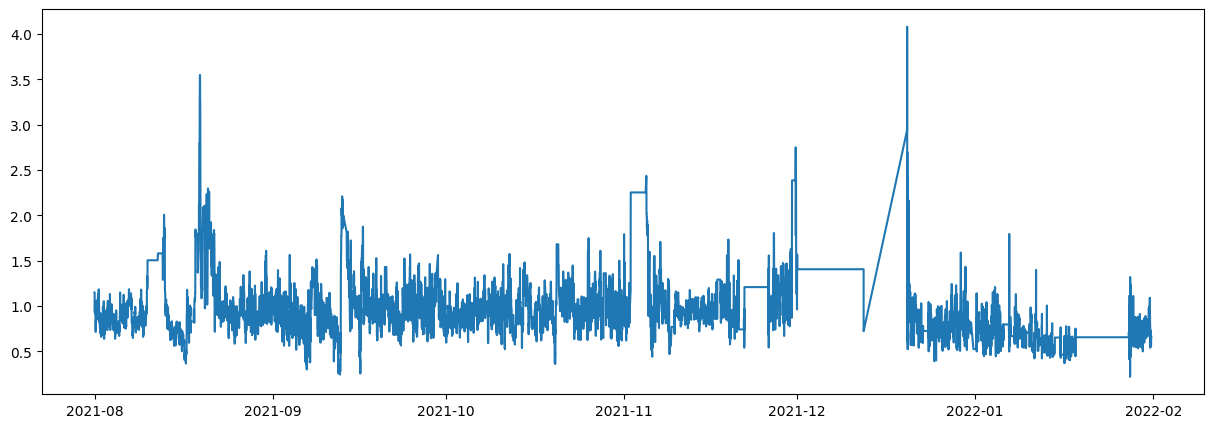

In [16]:

plt.plot(rc22, for_RNN_data_CIVS['SI_f1'])


array([<Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>], dtype=object)

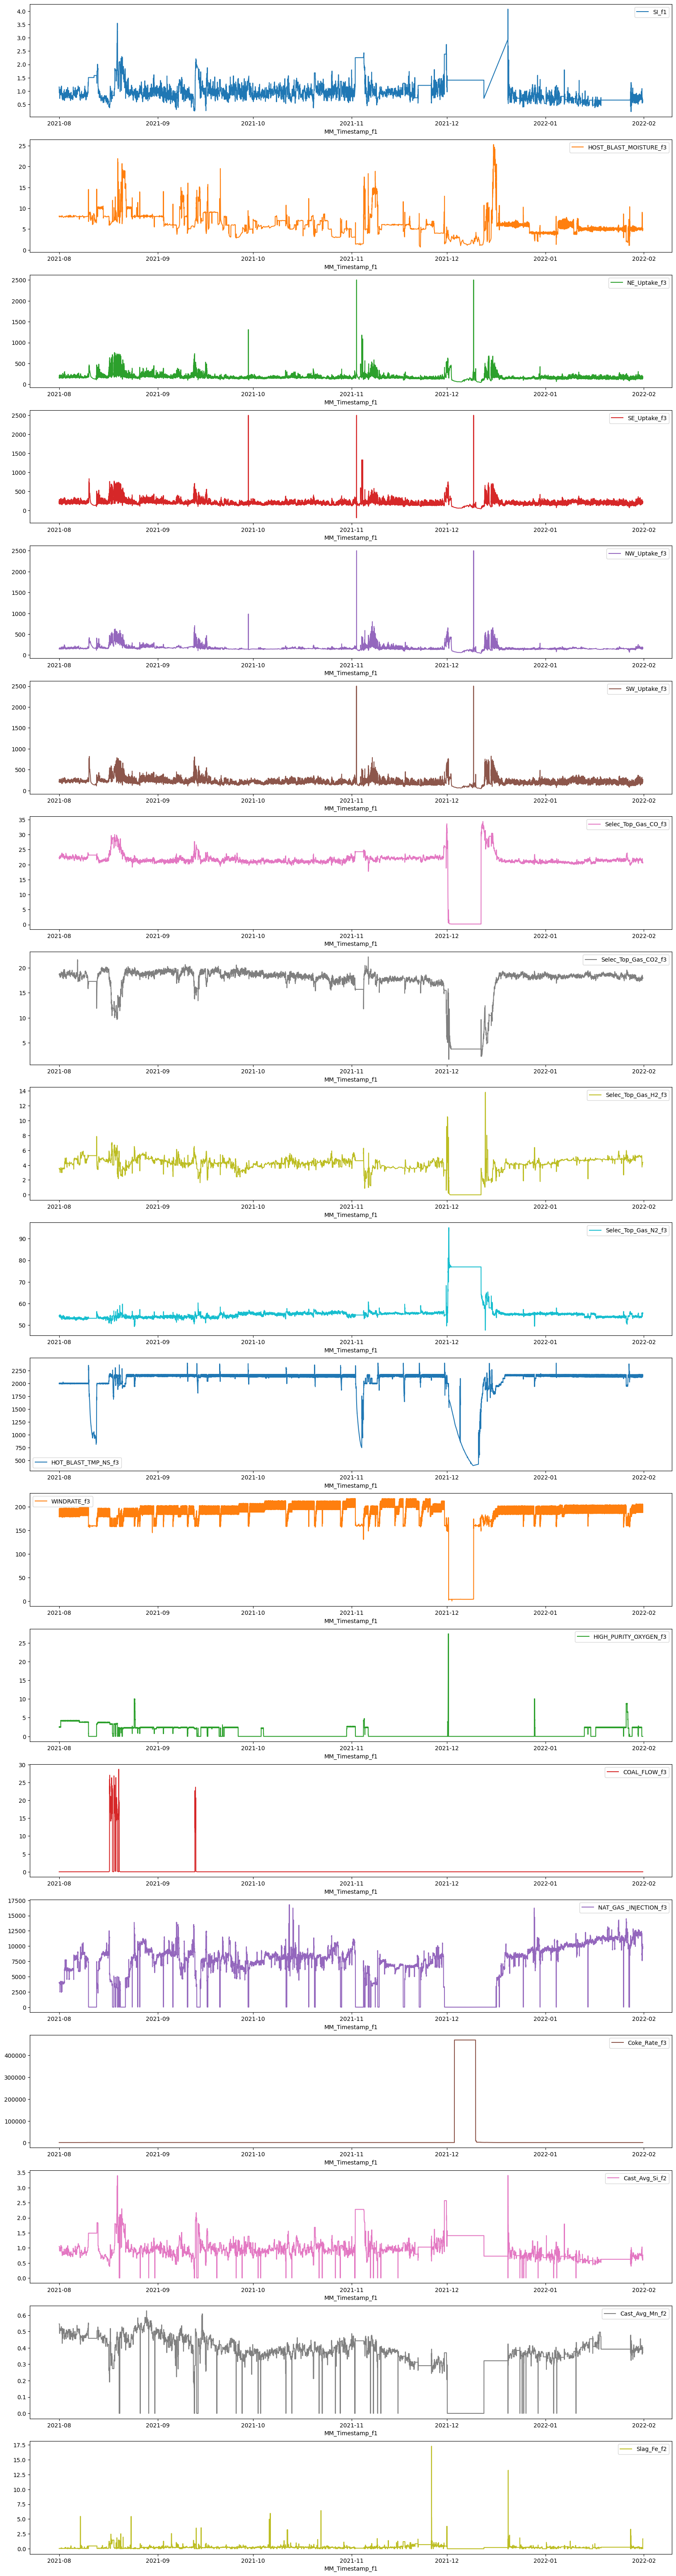

In [17]:

## layout=(4, 3), 
## style=['r', 'r', 'r', 'g', 'g', 'g', 'b', 'b', 'b', 'r', 'r', 'r'],
## xticks=np.arange(0, len(df), 16)

## for_RNN_data_CIVS.plot( xticks=rc22, figsize=(20,80),  subplots=True   )


for_RNN_data_CIVS.plot(x='MM_Timestamp_f1' , kind='line', subplots=True, figsize=(20,80),
        sharex=False, sharey=False, legend=True )


In [18]:

l_new


['SI_f1',
 'MM_Timestamp_f1',
 'HOST_BLAST_MOISTURE_f3',
 'NE_Uptake_f3',
 'SE_Uptake_f3',
 'NW_Uptake_f3',
 'SW_Uptake_f3',
 'Selec_Top_Gas_CO_f3',
 'Selec_Top_Gas_CO2_f3',
 'Selec_Top_Gas_H2_f3',
 'Selec_Top_Gas_N2_f3',
 'HOT_BLAST_TMP_NS_f3',
 'WINDRATE_f3',
 'HIGH_PURITY_OXYGEN_f3',
 'COAL_FLOW_f3',
 'NAT_GAS _INJECTION_f3',
 'Coke_Rate_f3',
 'Cast_Avg_Si_f2',
 'Cast_Avg_Mn_f2',
 'Slag_Fe_f2']

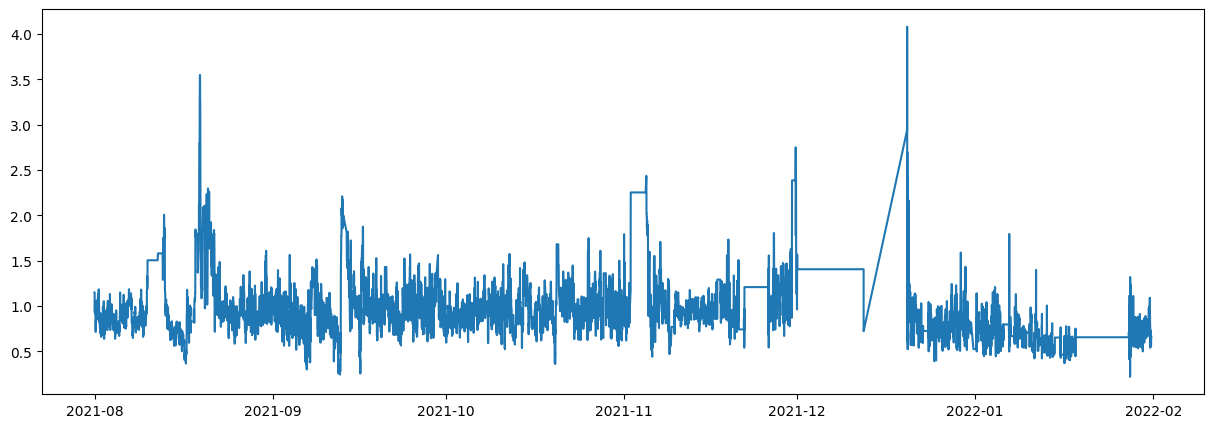

In [19]:

plt.plot(rc22, for_RNN_data_CIVS['SI_f1'])


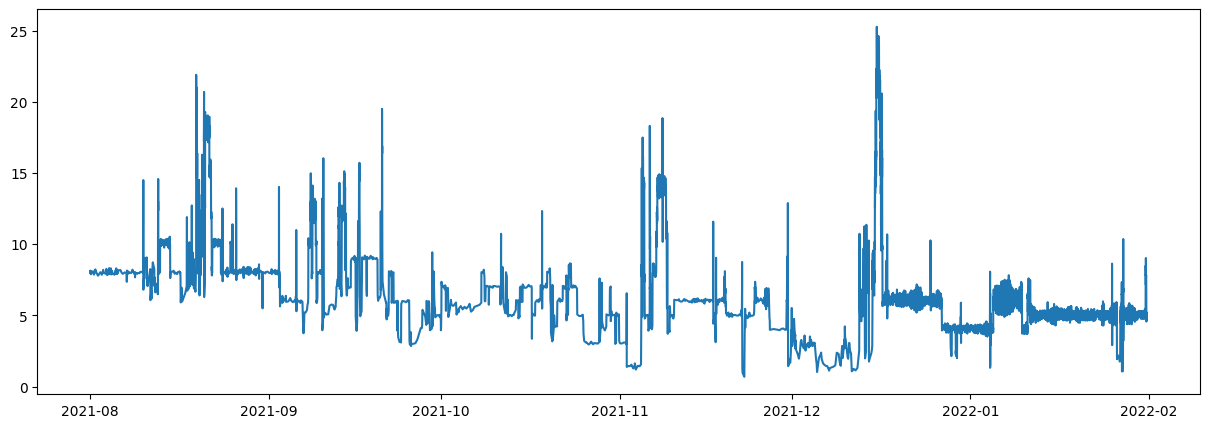

In [20]:

plt.plot(rc22, for_RNN_data_CIVS['HOST_BLAST_MOISTURE_f3'])


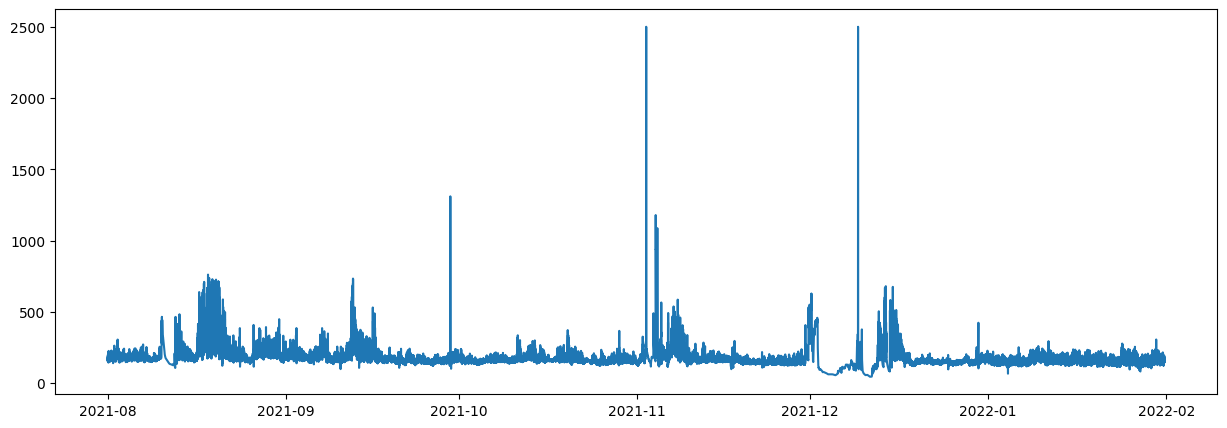

In [21]:

plt.plot(rc22, for_RNN_data_CIVS['NE_Uptake_f3'])


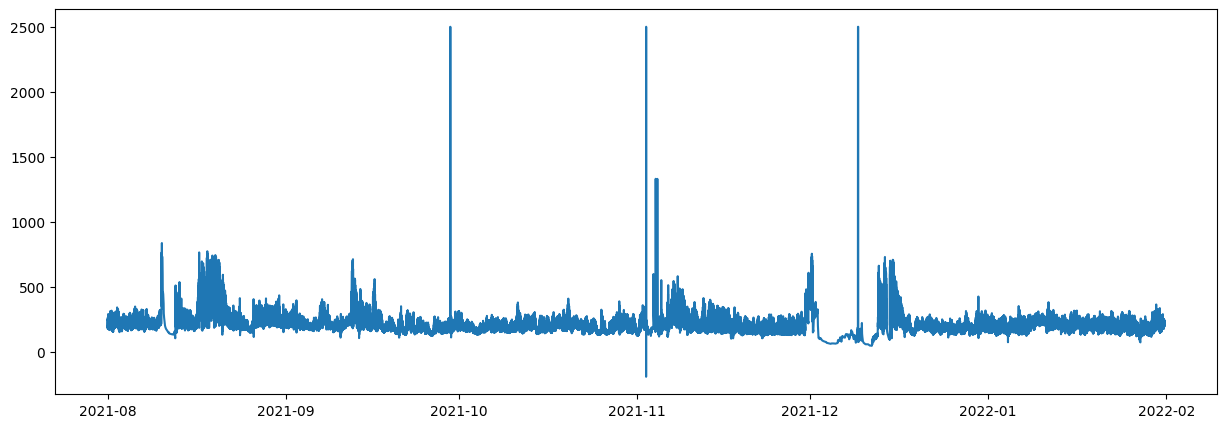

In [22]:

plt.plot(rc22, for_RNN_data_CIVS['SE_Uptake_f3'])


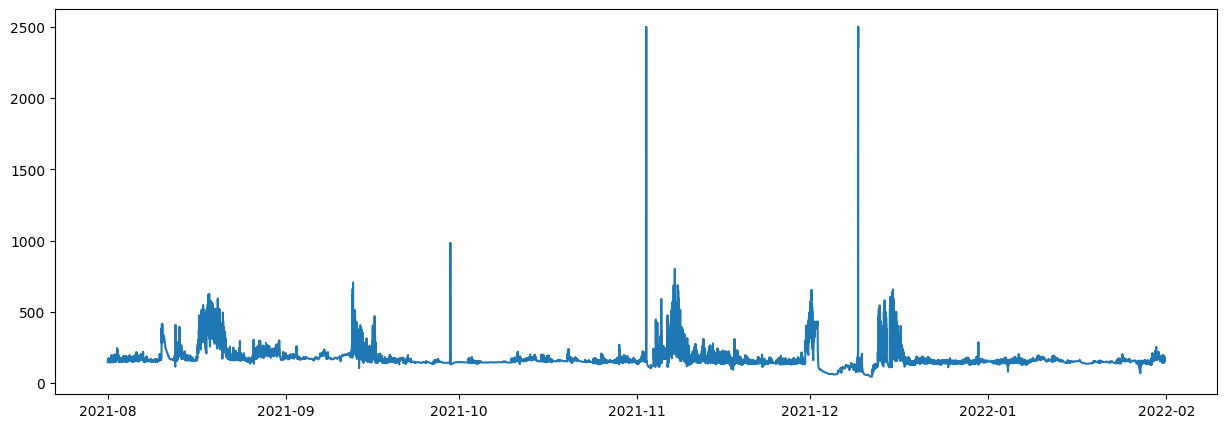

In [23]:

plt.plot(rc22, for_RNN_data_CIVS['NW_Uptake_f3'])


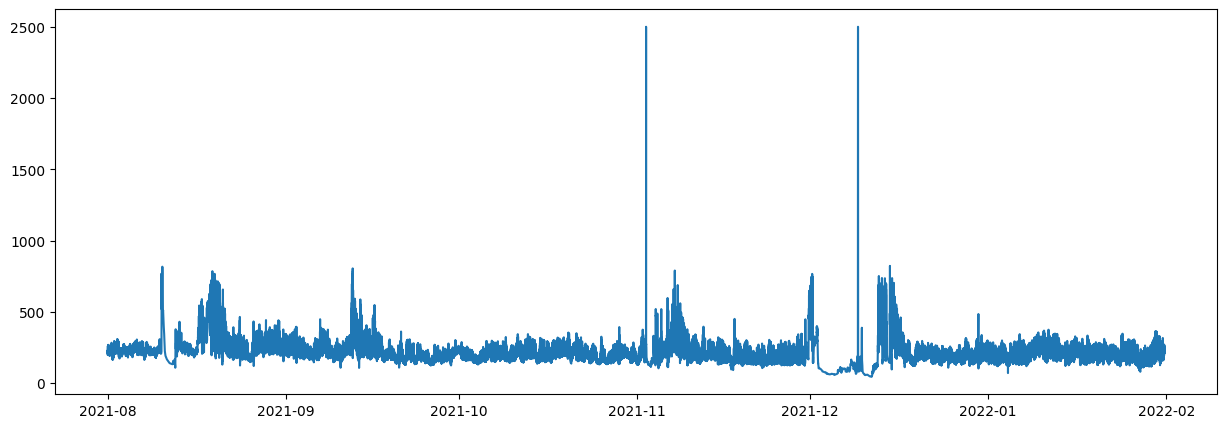

In [24]:

plt.plot(rc22, for_RNN_data_CIVS['SW_Uptake_f3'])


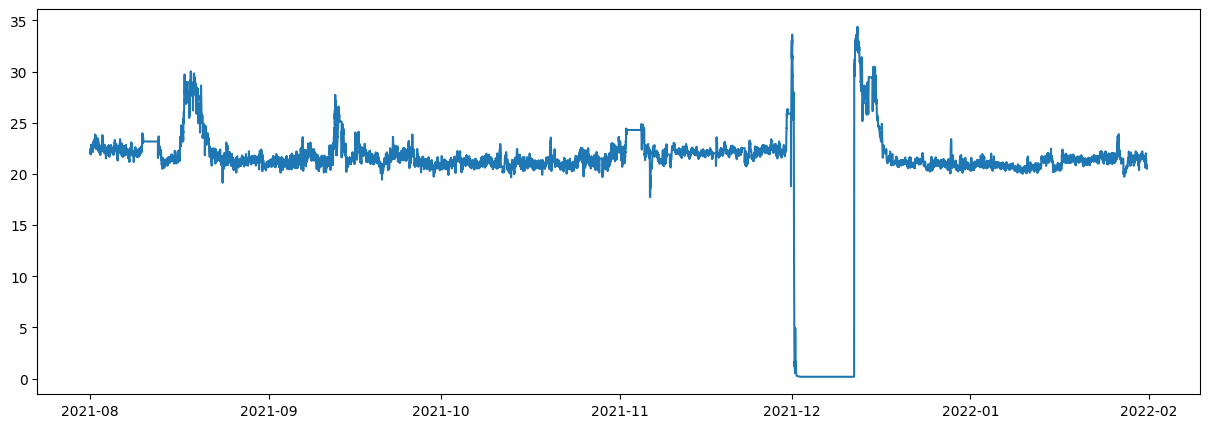

In [25]:

plt.plot(rc22, for_RNN_data_CIVS['Selec_Top_Gas_CO_f3'])


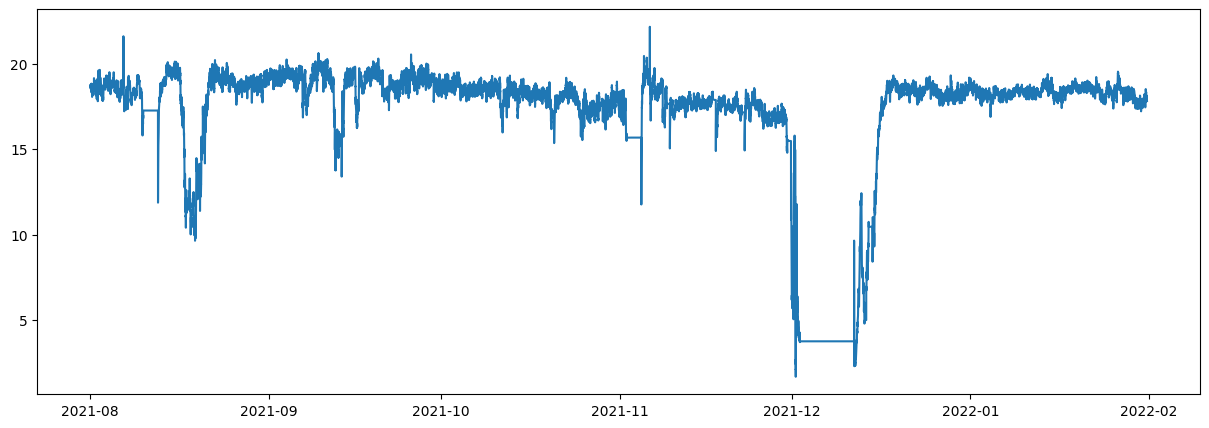

In [26]:

plt.plot(rc22, for_RNN_data_CIVS['Selec_Top_Gas_CO2_f3'])


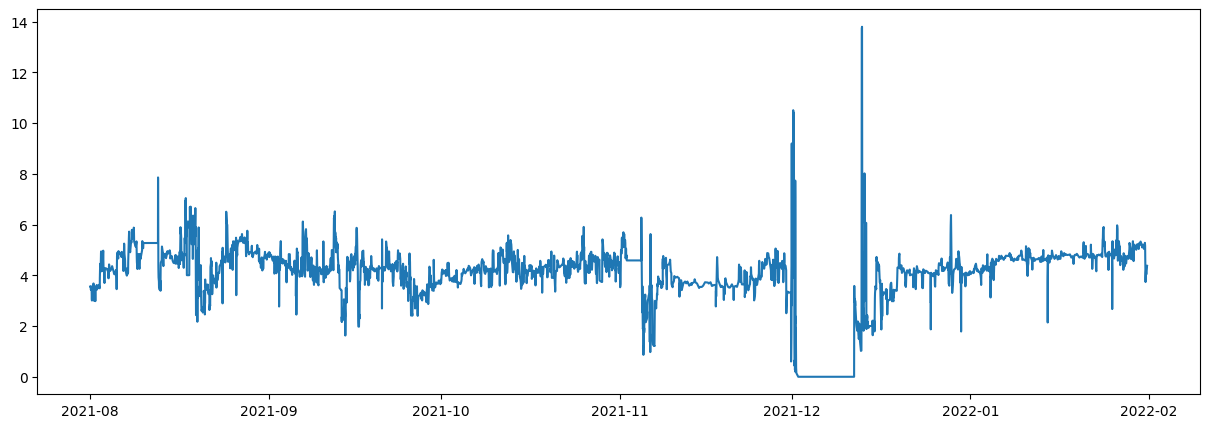

In [27]:

plt.plot(rc22, for_RNN_data_CIVS['Selec_Top_Gas_H2_f3'])


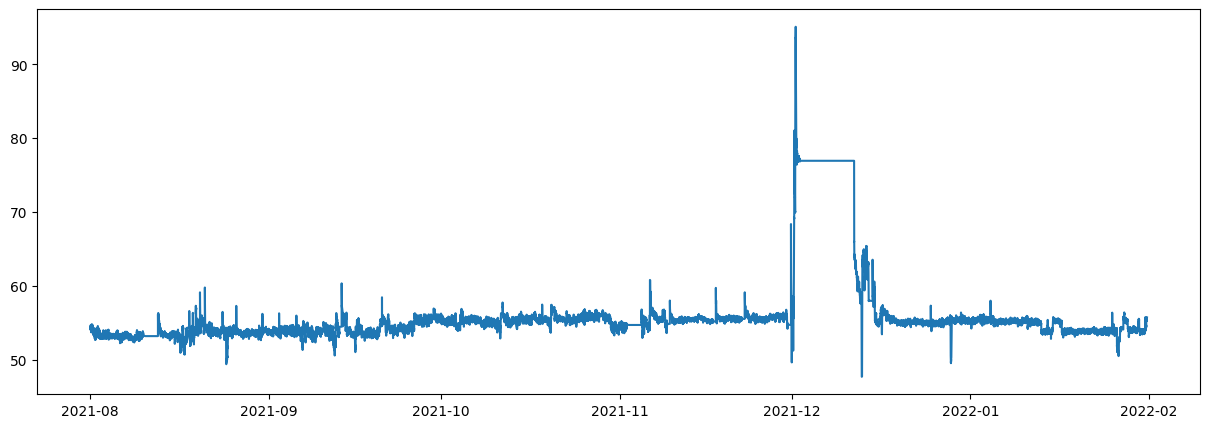

In [28]:

plt.plot(rc22, for_RNN_data_CIVS['Selec_Top_Gas_N2_f3'])


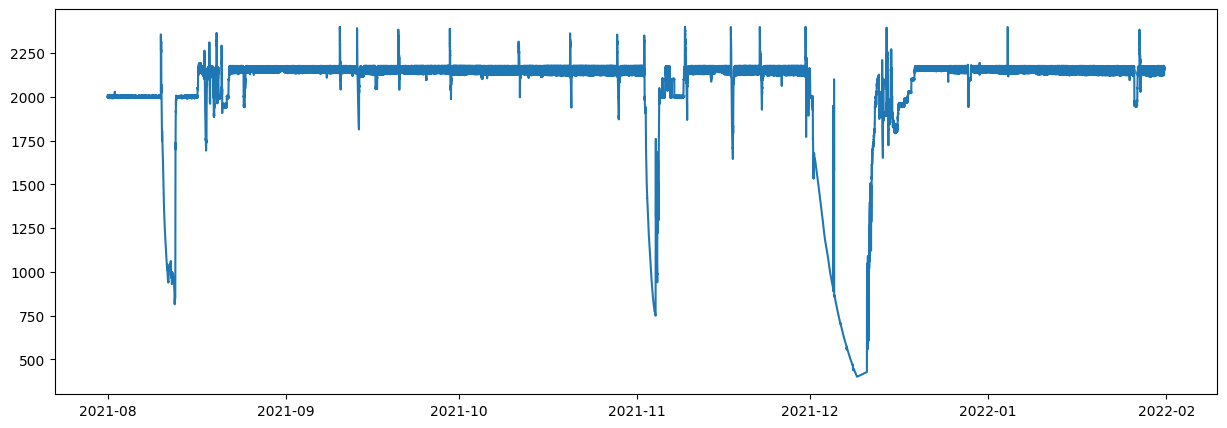

In [29]:

plt.plot(rc22, for_RNN_data_CIVS['HOT_BLAST_TMP_NS_f3'])


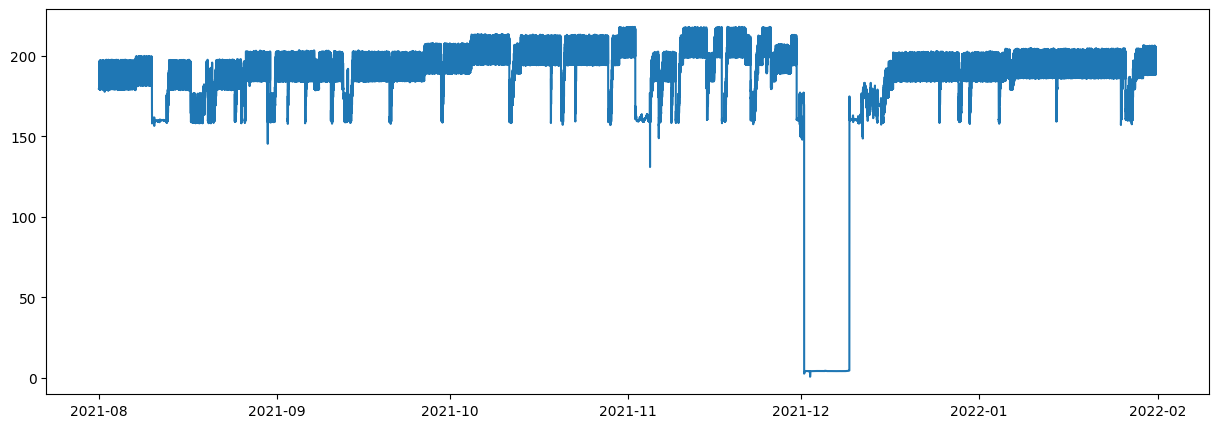

In [30]:

plt.plot(rc22, for_RNN_data_CIVS['WINDRATE_f3'])


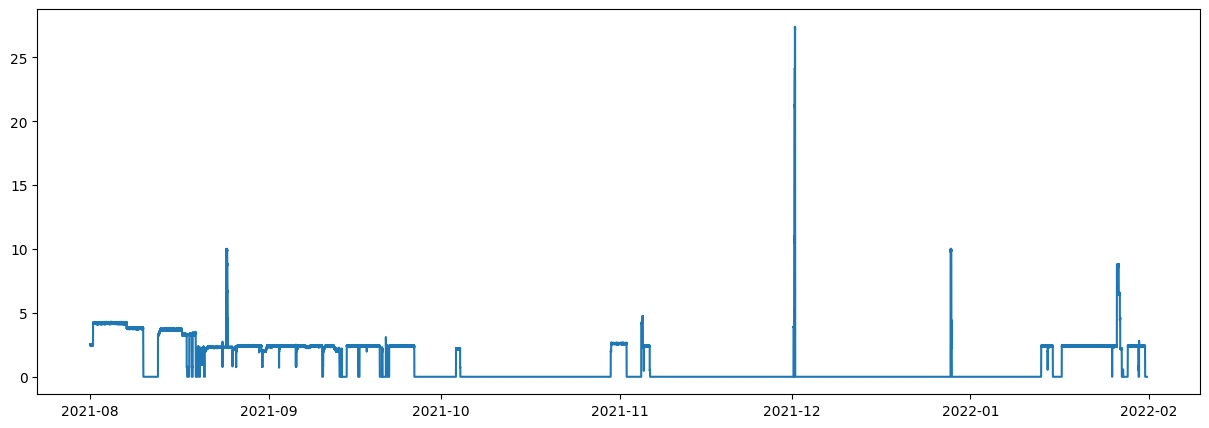

In [31]:

plt.plot(rc22, for_RNN_data_CIVS['HIGH_PURITY_OXYGEN_f3'])


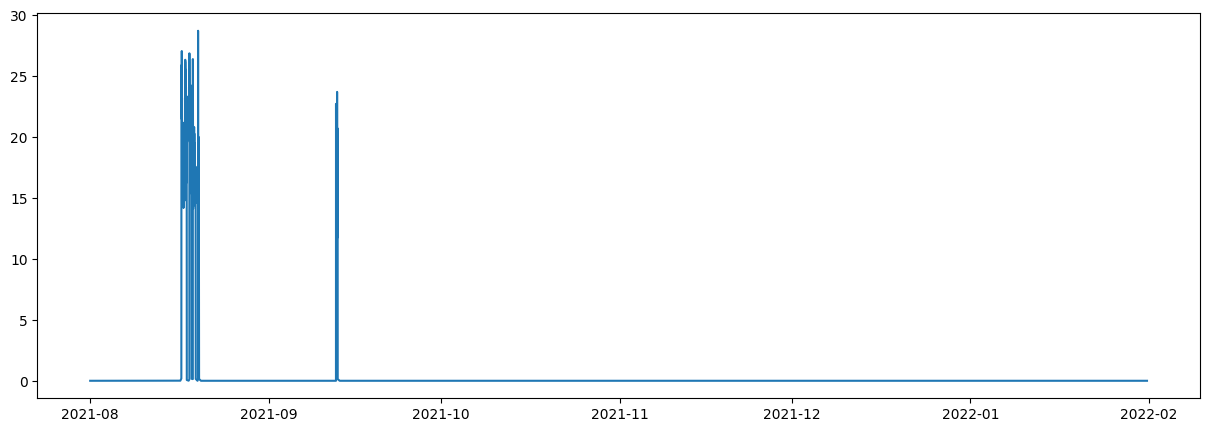

In [32]:

plt.plot(rc22, for_RNN_data_CIVS[ 'COAL_FLOW_f3'])


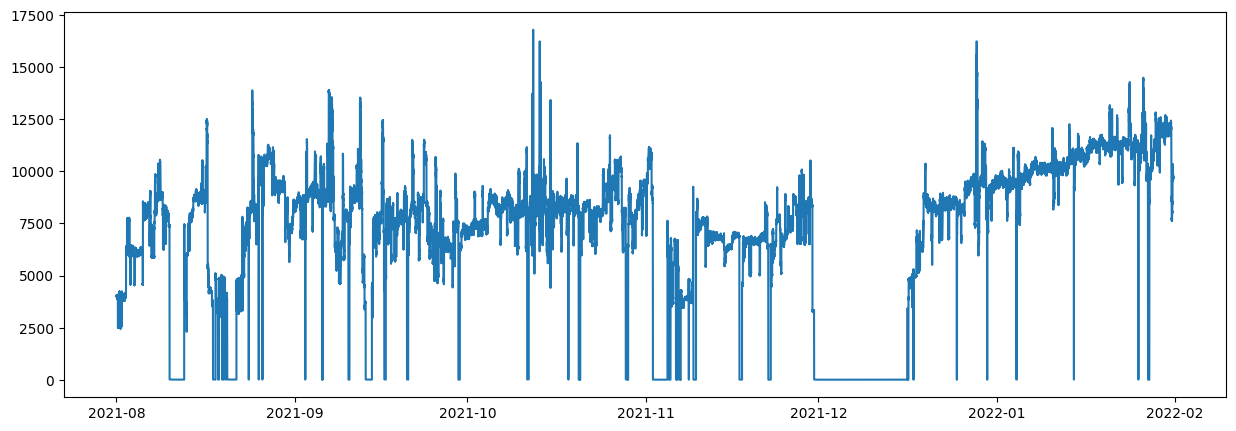

In [33]:

plt.plot(rc22, for_RNN_data_CIVS['NAT_GAS _INJECTION_f3'])


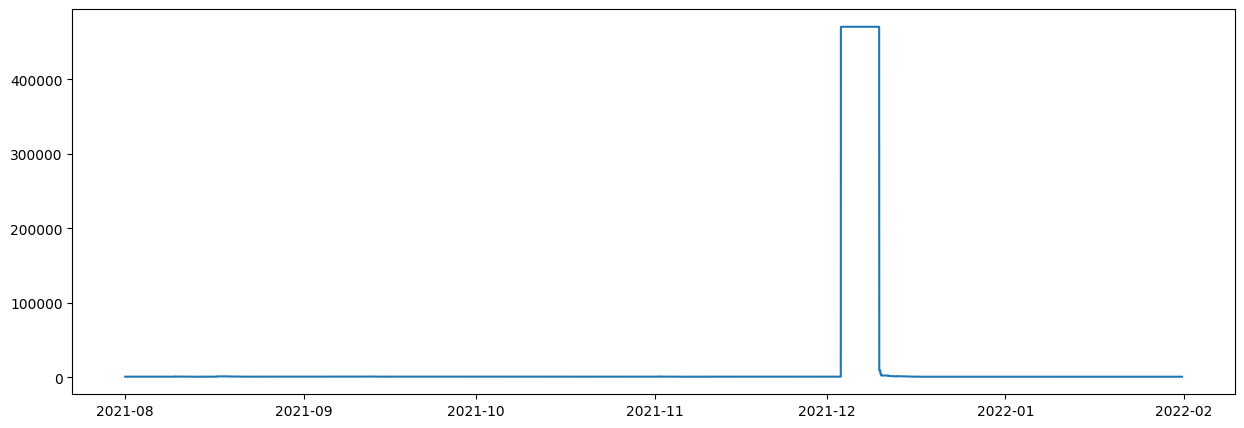

In [34]:

plt.plot(rc22, for_RNN_data_CIVS['Coke_Rate_f3'])


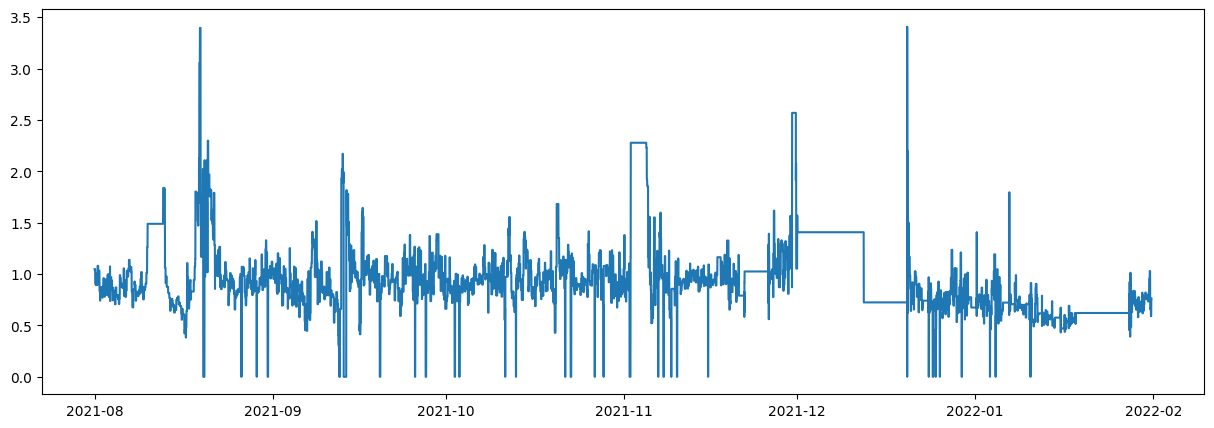

In [35]:

plt.plot(rc22, for_RNN_data_CIVS['Cast_Avg_Si_f2'])


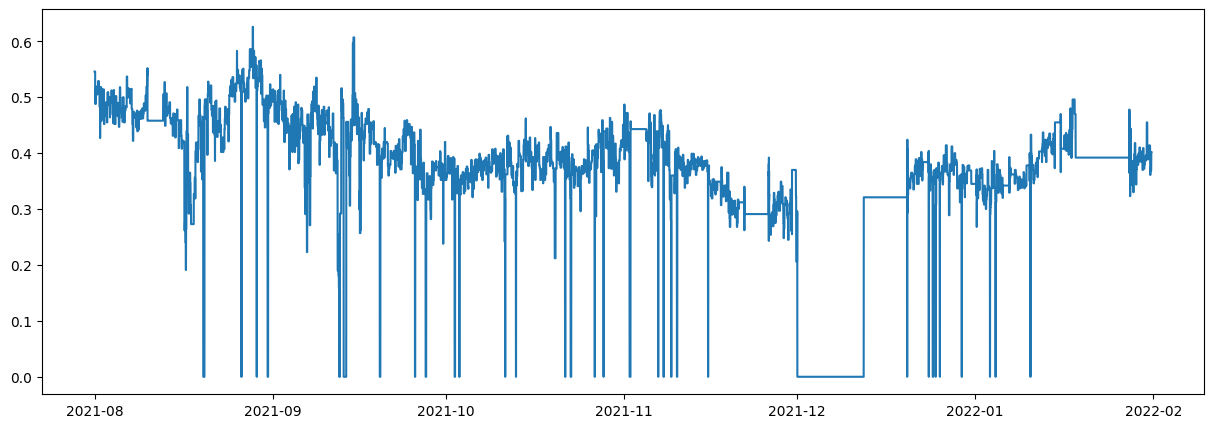

In [36]:

plt.plot(rc22, for_RNN_data_CIVS[ 'Cast_Avg_Mn_f2'])


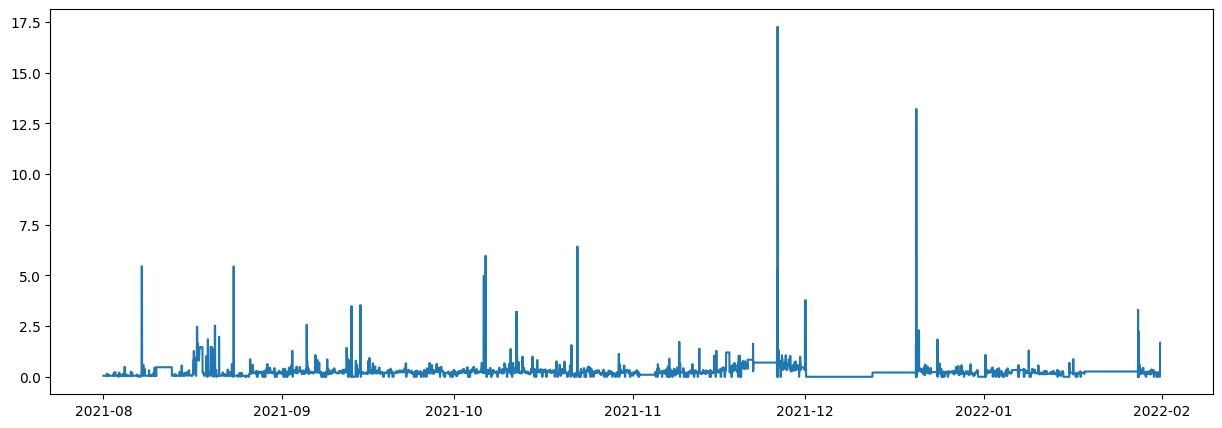

In [37]:

plt.plot(rc22, for_RNN_data_CIVS['Slag_Fe_f2'])



## Back to the Data Processing


In [38]:

l_new2 = ['SI_f1',
 'HOST_BLAST_MOISTURE_f3',
 'NE_Uptake_f3',
 'SE_Uptake_f3',
 'NW_Uptake_f3',
 'SW_Uptake_f3',
 'Selec_Top_Gas_CO_f3',
 'Selec_Top_Gas_CO2_f3',
 'Selec_Top_Gas_H2_f3',
 'Selec_Top_Gas_N2_f3',
 'HOT_BLAST_TMP_NS_f3',
 'WINDRATE_f3',
 'HIGH_PURITY_OXYGEN_f3',
 'COAL_FLOW_f3',
 'NAT_GAS _INJECTION_f3',
 'Coke_Rate_f3',
 'Cast_Avg_Si_f2',
 'Cast_Avg_Mn_f2',
 'Slag_Fe_f2']


In [39]:

## for_RNN_data_CIVS = for_RNN_data_CIVS[ l_new2 ]


In [40]:

for_RNN_data_CIVS.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265736 entries, 0 to 265735
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   SI_f1                   265736 non-null  float64       
 1   MM_Timestamp_f1         265736 non-null  datetime64[ns]
 2   HOST_BLAST_MOISTURE_f3  265736 non-null  float64       
 3   NE_Uptake_f3            265736 non-null  float64       
 4   SE_Uptake_f3            265736 non-null  float64       
 5   NW_Uptake_f3            265736 non-null  float64       
 6   SW_Uptake_f3            265736 non-null  float64       
 7   Selec_Top_Gas_CO_f3     265736 non-null  float64       
 8   Selec_Top_Gas_CO2_f3    265736 non-null  float64       
 9   Selec_Top_Gas_H2_f3     265736 non-null  float64       
 10  Selec_Top_Gas_N2_f3     265736 non-null  float64       
 11  HOT_BLAST_TMP_NS_f3     265736 non-null  float64       
 12  WINDRATE_f3             265736

In [41]:

for_RNN_data_CIVS


SI_f1     MM_Timestamp_f1  HOST_BLAST_MOISTURE_f3  NE_Uptake_f3  \
0       1.152000 2021-08-01 00:00:00                8.084517    158.478922   
1       1.152000 2021-08-01 00:01:00                8.079545    159.637733   
2       1.152000 2021-08-01 00:02:00                8.074573    160.796544   
3       1.152000 2021-08-01 00:03:00                8.069602    161.955355   
4       1.152000 2021-08-01 00:04:00                8.064630    163.102736   
...          ...                 ...                     ...           ...   
265731  0.662065 2022-01-31 16:12:00                5.155158    168.935281   
265732  0.662446 2022-01-31 16:13:00                5.161362    170.715532   
265733  0.662826 2022-01-31 16:14:00                5.167567    172.495783   
265734  0.663207 2022-01-31 16:15:00                5.173771    174.440392   
265735  0.663587 2022-01-31 16:16:00                5.179976    178.348950   

        SE_Uptake_f3  NW_Uptake_f3  SW_Uptake_f3  Selec_Top_Gas_CO_f3  \
0         245.634175    145.396538    220.717349            22.322068   
1         252.459217    145.570895    226.360600            22.335329   
2         252.645736    145.745252    230.297540            22.348590   
3         247.987563    145.919609    225.220292            22.361852   
4         226.923719    146.093966    218.827693            22.375113   
...              ...           ...           ...                  ...   
265731    202.117809    163.555824    219.714757            20.510372   
265732    202.106673    164.493156    220.911245            20.510606   
265733    205.875063    165.430489    222.902059            20.510840   
265734    212.764586    166.688229    232.269437            20.511074   
265735    219.654109    170.012230    243.436510            20.511309   

        Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                  18.729296             3.559210            54.250139   
1                  18.731320             3.559234            54.194257   
2                  18.733343             3.559259            54.138374   
3                  18.735367             3.559284            54.082797   
4                  18.737391             3.559309            54.063779   
...                      ...                  ...                  ...   
265731             17.817248             4.376637            55.682915   
265732             17.815391             4.376798            55.688159   
265733             17.813534             4.376959            55.693057   
265734             17.811677             4.377119            55.697567   
265735             17.809820             4.377280            55.698785   

        HOT_BLAST_TMP_NS_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0               1999.604384   179.749638               2.510680           0.0   
1               2000.288837   179.765945               2.489381           0.0   
2               1999.242862   179.782251               2.489037           0.0   
3               1999.884442   179.798490               2.496867           0.0   
4               1999.849729   179.784430               2.501961           0.0   
...                     ...          ...                    ...           ...   
265731          2162.689809   188.599806               0.000000           0.0   
265732          2162.438593   188.536026               0.000000           0.0   
265733          2162.032539   189.264351               0.000000           0.0   
265734          2160.858603   189.426471               0.000000           0.0   
265735          2159.580246   189.163382               0.000000           0.0   

        NAT_GAS _INJECTION_f3  Coke_Rate_f3  Cast_Avg_Si_f2  Cast_Avg_Mn_f2  \
0                 4034.234339           992           1.048           0.546   
1                 4024.947376           992           1.048           0.546   
2                 4011.601682           992           1.048           0.546   
3                 4


## Iterate and mark transitions


In [42]:

for_RNN_data_CIVS.insert(       loc = 0,
                                column = 'control1',
                                value = 0)


for_RNN_data_CIVS.insert(       loc = 0,
                                column = 'control4',
                                value = 0)


for_RNN_data_CIVS.insert(       loc = 0,
                                column = 'control2',
                                value = 0)


for_RNN_data_CIVS.insert(       loc = 0,
                                column = 'control3',
                                value = 0)



for_RNN_data_CIVS


control3  control2  control4  control1     SI_f1     MM_Timestamp_f1  \
0              0         0         0         0  1.152000 2021-08-01 00:00:00   
1              0         0         0         0  1.152000 2021-08-01 00:01:00   
2              0         0         0         0  1.152000 2021-08-01 00:02:00   
3              0         0         0         0  1.152000 2021-08-01 00:03:00   
4              0         0         0         0  1.152000 2021-08-01 00:04:00   
...          ...       ...       ...       ...       ...                 ...   
265731         0         0         0         0  0.662065 2022-01-31 16:12:00   
265732         0         0         0         0  0.662446 2022-01-31 16:13:00   
265733         0         0         0         0  0.662826 2022-01-31 16:14:00   
265734         0         0         0         0  0.663207 2022-01-31 16:15:00   
265735         0         0         0         0  0.663587 2022-01-31 16:16:00   

        HOST_BLAST_MOISTURE_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  ...  \
0                     8.084517    158.478922    245.634175    145.396538  ...   
1                     8.079545    159.637733    252.459217    145.570895  ...   
2                     8.074573    160.796544    252.645736    145.745252  ...   
3                     8.069602    161.955355    247.987563    145.919609  ...   
4                     8.064630    163.102736    226.923719    146.093966  ...   
...                        ...           ...           ...           ...  ...   
265731                5.155158    168.935281    202.117809    163.555824  ...   
265732                5.161362    170.715532    202.106673    164.493156  ...   
265733                5.167567    172.495783    205.875063    165.430489  ...   
265734                5.173771    174.440392    212.764586    166.688229  ...   
265735                5.179976    178.348950    219.654109    170.012230  ...   

        Selec_Top_Gas_N2_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                 54.250139          1999.604384   179.749638   
1                 54.194257          2000.288837   179.765945   
2                 54.138374          1999.242862   179.782251   
3                 54.082797          1999.884442   179.798490   
4                 54.063779          1999.849729   179.784430   
...                     ...                  ...          ...   
265731            55.682915          2162.689809   188.599806   
265732            55.688159          2162.438593   188.536026   
265733            55.693057          2162.032539   189.264351   
265734            55.697567          2160.858603   189.426471   
265735            55.698785          2159.580246   189.163382   

        HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  NAT_GAS _INJECTION_f3  \
0                    2.510680           0.0            4034.234339   
1                    2.489381           0.0            4024.947376   
2                    2.489037           0.0            4011.601682   
3                    2.496867           0.0            4012.024633   
4                    2.501961           0.0            4000.467204   
...                       ...           ...                    ...   
265731               0.000000           0.0            9680.930154   
265732               0.000000           0.0            9665.389423   
265733               0.000000           0.0            9652.217004   
265734               0.000000           0.0            9661.236786   
265735               0.000000           0.0            9678.098686   

        Coke_Rate_f3  Cast_Avg_Si_f2  Cast_Avg_Mn_f2  Slag_Fe_f2  
0                992           1.048           0.546        0.05  
1                992           1.048           0.546        0.05  
2                992           1.048           0.546        0.05  
3                992           1.048           0.546        0.05  
4                992           1.048           0.546        0.05  
...              ...             ...             .

In [43]:

indeces_to_2500_control2 = []

indeces_to_2500 = [] 

counter_control2 = 0

counter = 500

prev_val = 0.0
    
for index, row in for_RNN_data_CIVS.iterrows():

    ## print( row["SI_f1"]  )
    #########################################################################
    if row["SI_f1"] == prev_val:
        for_RNN_data_CIVS.at[index, 'control1'] = counter
        counter = counter + 1
        indeces_to_2500.append( index )
    else:
        if counter > 2000:
            ## print(counter)
            ## input()
            for_RNN_data_CIVS["control4"][indeces_to_2500 ] = 1
            indeces_to_2500 = []
        else:
            indeces_to_2500 = []
        counter = 0

    ##########################################################################
    if row["SI_f1"] != prev_val:
        for_RNN_data_CIVS.at[index, 'control2'] = counter_control2
        counter_control2 = counter_control2 + 1
        indeces_to_2500_control2.append(  index  )
    else:
        if counter_control2 > 2000:
            ## print(counter)
            ## input()
            for_RNN_data_CIVS["control4"][indeces_to_2500_control2 ] = 1
            indeces_to_2500_control2 = []
        else:
            indeces_to_2500_control2 = []
        counter_control2 = 0

    ##########################################################################
    if row["SI_f1"] == prev_val:
        for_RNN_data_CIVS.at[index, 'control3'] = 1.0

    ##########################################################################
    if index  % 50000 == 0:
        print(index )
    prev_val = row["SI_f1"]
        
    

    


0
50000
100000
150000
200000
250000


array([<Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>], dtype=object)

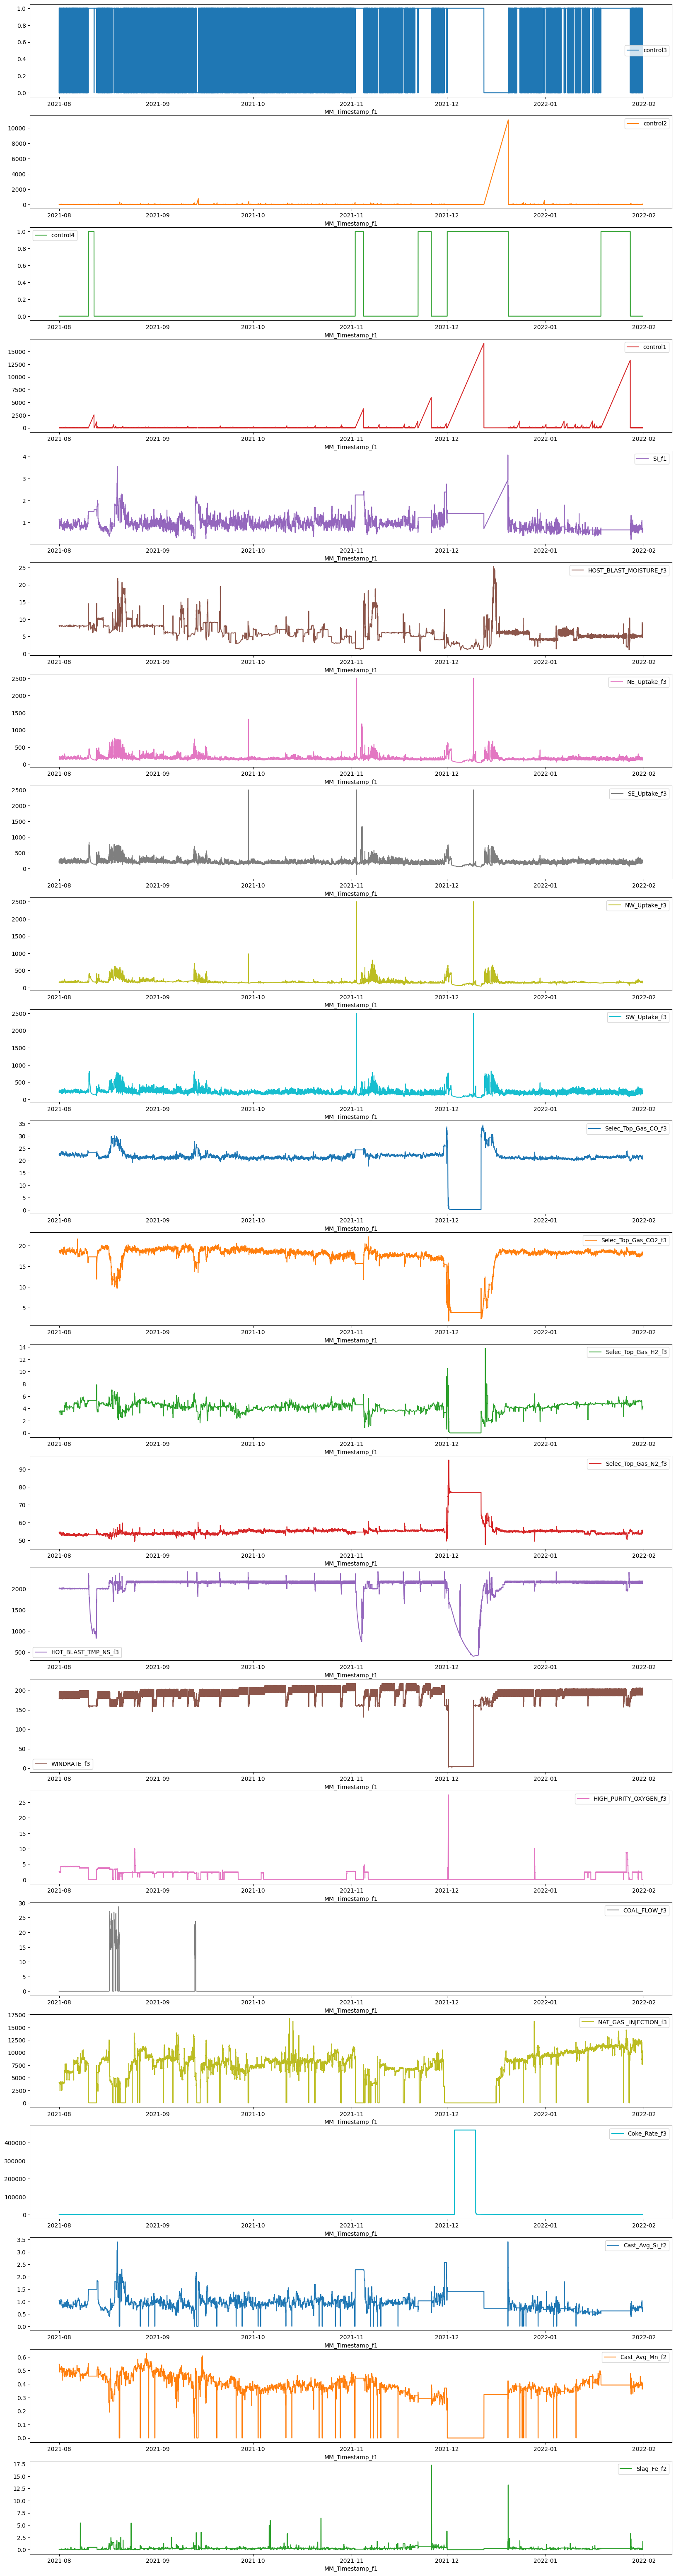

In [44]:

## for_RNN_data_CIVS.plot(  figsize=(20,80),  subplots=True   )


for_RNN_data_CIVS.plot(x='MM_Timestamp_f1' , kind='line', subplots=True, figsize=(20,80),
        sharex=False, sharey=False, legend=True )


In [45]:

for_RNN_data_CIVS


control3  control2  control4  control1     SI_f1     MM_Timestamp_f1  \
0              0         0         0         0  1.152000 2021-08-01 00:00:00   
1              1         0         0         0  1.152000 2021-08-01 00:01:00   
2              1         0         0         1  1.152000 2021-08-01 00:02:00   
3              1         0         0         2  1.152000 2021-08-01 00:03:00   
4              1         0         0         3  1.152000 2021-08-01 00:04:00   
...          ...       ...       ...       ...       ...                 ...   
265731         0        57         0         0  0.662065 2022-01-31 16:12:00   
265732         0        58         0         0  0.662446 2022-01-31 16:13:00   
265733         0        59         0         0  0.662826 2022-01-31 16:14:00   
265734         0        60         0         0  0.663207 2022-01-31 16:15:00   
265735         0        61         0         0  0.663587 2022-01-31 16:16:00   

        HOST_BLAST_MOISTURE_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  ...  \
0                     8.084517    158.478922    245.634175    145.396538  ...   
1                     8.079545    159.637733    252.459217    145.570895  ...   
2                     8.074573    160.796544    252.645736    145.745252  ...   
3                     8.069602    161.955355    247.987563    145.919609  ...   
4                     8.064630    163.102736    226.923719    146.093966  ...   
...                        ...           ...           ...           ...  ...   
265731                5.155158    168.935281    202.117809    163.555824  ...   
265732                5.161362    170.715532    202.106673    164.493156  ...   
265733                5.167567    172.495783    205.875063    165.430489  ...   
265734                5.173771    174.440392    212.764586    166.688229  ...   
265735                5.179976    178.348950    219.654109    170.012230  ...   

        Selec_Top_Gas_N2_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                 54.250139          1999.604384   179.749638   
1                 54.194257          2000.288837   179.765945   
2                 54.138374          1999.242862   179.782251   
3                 54.082797          1999.884442   179.798490   
4                 54.063779          1999.849729   179.784430   
...                     ...                  ...          ...   
265731            55.682915          2162.689809   188.599806   
265732            55.688159          2162.438593   188.536026   
265733            55.693057          2162.032539   189.264351   
265734            55.697567          2160.858603   189.426471   
265735            55.698785          2159.580246   189.163382   

        HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  NAT_GAS _INJECTION_f3  \
0                    2.510680           0.0            4034.234339   
1                    2.489381           0.0            4024.947376   
2                    2.489037           0.0            4011.601682   
3                    2.496867           0.0            4012.024633   
4                    2.501961           0.0            4000.467204   
...                       ...           ...                    ...   
265731               0.000000           0.0            9680.930154   
265732               0.000000           0.0            9665.389423   
265733               0.000000           0.0            9652.217004   
265734               0.000000           0.0            9661.236786   
265735               0.000000           0.0            9678.098686   

        Coke_Rate_f3  Cast_Avg_Si_f2  Cast_Avg_Mn_f2  Slag_Fe_f2  
0                992           1.048           0.546        0.05  
1                992           1.048           0.546        0.05  
2                992           1.048           0.546        0.05  
3                992           1.048           0.546        0.05  
4                992           1.048           0.546        0.05  
...              ...             ...             .


## Drop row with value above x


In [46]:

## for_RNN_data_CIVS = for_RNN_data_CIVS.drop( for_RNN_data_CIVS[ for_RNN_data_CIVS.control4 == 1 ].index ) ## , inplace = True)

for_RNN_data_CIVS = for_RNN_data_CIVS [ for_RNN_data_CIVS ["control4"] == 0].reset_index( drop=True )


In [47]:

for_RNN_data_CIVS


control3  control2  control4  control1     SI_f1     MM_Timestamp_f1  \
0              0         0         0         0  1.152000 2021-08-01 00:00:00   
1              1         0         0         0  1.152000 2021-08-01 00:01:00   
2              1         0         0         1  1.152000 2021-08-01 00:02:00   
3              1         0         0         2  1.152000 2021-08-01 00:03:00   
4              1         0         0         3  1.152000 2021-08-01 00:04:00   
...          ...       ...       ...       ...       ...                 ...   
212427         0        57         0         0  0.662065 2022-01-31 16:12:00   
212428         0        58         0         0  0.662446 2022-01-31 16:13:00   
212429         0        59         0         0  0.662826 2022-01-31 16:14:00   
212430         0        60         0         0  0.663207 2022-01-31 16:15:00   
212431         0        61         0         0  0.663587 2022-01-31 16:16:00   

        HOST_BLAST_MOISTURE_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  ...  \
0                     8.084517    158.478922    245.634175    145.396538  ...   
1                     8.079545    159.637733    252.459217    145.570895  ...   
2                     8.074573    160.796544    252.645736    145.745252  ...   
3                     8.069602    161.955355    247.987563    145.919609  ...   
4                     8.064630    163.102736    226.923719    146.093966  ...   
...                        ...           ...           ...           ...  ...   
212427                5.155158    168.935281    202.117809    163.555824  ...   
212428                5.161362    170.715532    202.106673    164.493156  ...   
212429                5.167567    172.495783    205.875063    165.430489  ...   
212430                5.173771    174.440392    212.764586    166.688229  ...   
212431                5.179976    178.348950    219.654109    170.012230  ...   

        Selec_Top_Gas_N2_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                 54.250139          1999.604384   179.749638   
1                 54.194257          2000.288837   179.765945   
2                 54.138374          1999.242862   179.782251   
3                 54.082797          1999.884442   179.798490   
4                 54.063779          1999.849729   179.784430   
...                     ...                  ...          ...   
212427            55.682915          2162.689809   188.599806   
212428            55.688159          2162.438593   188.536026   
212429            55.693057          2162.032539   189.264351   
212430            55.697567          2160.858603   189.426471   
212431            55.698785          2159.580246   189.163382   

        HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  NAT_GAS _INJECTION_f3  \
0                    2.510680           0.0            4034.234339   
1                    2.489381           0.0            4024.947376   
2                    2.489037           0.0            4011.601682   
3                    2.496867           0.0            4012.024633   
4                    2.501961           0.0            4000.467204   
...                       ...           ...                    ...   
212427               0.000000           0.0            9680.930154   
212428               0.000000           0.0            9665.389423   
212429               0.000000           0.0            9652.217004   
212430               0.000000           0.0            9661.236786   
212431               0.000000           0.0            9678.098686   

        Coke_Rate_f3  Cast_Avg_Si_f2  Cast_Avg_Mn_f2  Slag_Fe_f2  
0                992           1.048           0.546        0.05  
1                992           1.048           0.546        0.05  
2                992           1.048           0.546        0.05  
3                992           1.048           0.546        0.05  
4                992           1.048           0.546        0.05  
...              ...             ...             .

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

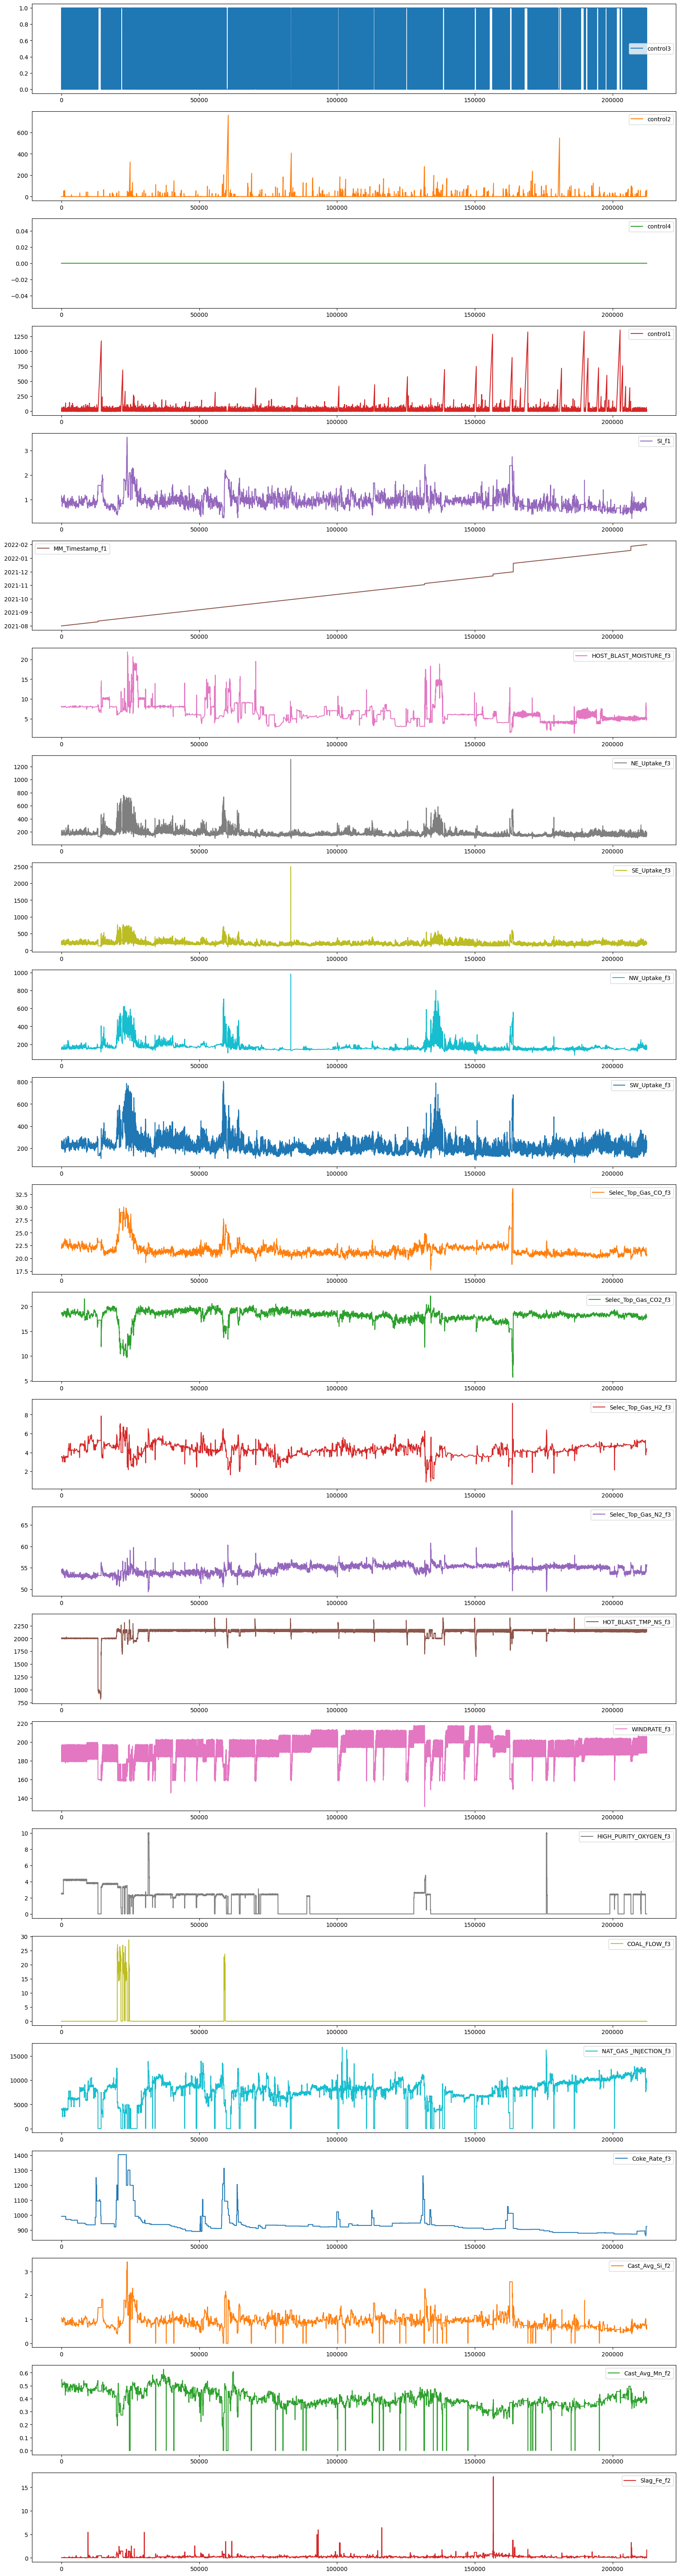

In [48]:

## for_RNN_data_CIVS.plot(  figsize=(20,80),  subplots=True   )

for_RNN_data_CIVS.plot( kind='line', subplots=True, figsize=(20,80),
        sharex=False, sharey=False, legend=True )


In [49]:

'''

ids = for_RNN_data_CIVS['SI_f1']
temp_for_RNN_data_CIVS = for_RNN_data_CIVS[ ( ids - ids.shift(1) )**2 > (0.05)**2 ]
temp_for_RNN_data_CIVS

'''


"\n\nids = for_RNN_data_CIVS['SI_f1']\ntemp_for_RNN_data_CIVS = for_RNN_data_CIVS[ ( ids - ids.shift(1) )**2 > (0.05)**2 ]\ntemp_for_RNN_data_CIVS\n\n"


## Remove date time columns 


In [50]:

l_new2 = ['SI_f1',
 'HOST_BLAST_MOISTURE_f3',
 'NE_Uptake_f3',
 'SE_Uptake_f3',
 'NW_Uptake_f3',
 'SW_Uptake_f3',
 'Selec_Top_Gas_CO_f3',
 'Selec_Top_Gas_CO2_f3',
 'Selec_Top_Gas_H2_f3',
 'Selec_Top_Gas_N2_f3',
 'HOT_BLAST_TMP_NS_f3',
 'WINDRATE_f3',
 'HIGH_PURITY_OXYGEN_f3',
 'COAL_FLOW_f3',
 'NAT_GAS _INJECTION_f3',
 'Coke_Rate_f3',
 'Cast_Avg_Si_f2',
 'Cast_Avg_Mn_f2',
 'Slag_Fe_f2']


In [51]:

for_RNN_data_CIVS = for_RNN_data_CIVS[ l_new2 ]


In [52]:

for_RNN_data_CIVS.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212432 entries, 0 to 212431
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   SI_f1                   212432 non-null  float64
 1   HOST_BLAST_MOISTURE_f3  212432 non-null  float64
 2   NE_Uptake_f3            212432 non-null  float64
 3   SE_Uptake_f3            212432 non-null  float64
 4   NW_Uptake_f3            212432 non-null  float64
 5   SW_Uptake_f3            212432 non-null  float64
 6   Selec_Top_Gas_CO_f3     212432 non-null  float64
 7   Selec_Top_Gas_CO2_f3    212432 non-null  float64
 8   Selec_Top_Gas_H2_f3     212432 non-null  float64
 9   Selec_Top_Gas_N2_f3     212432 non-null  float64
 10  HOT_BLAST_TMP_NS_f3     212432 non-null  float64
 11  WINDRATE_f3             212432 non-null  float64
 12  HIGH_PURITY_OXYGEN_f3   212432 non-null  float64
 13  COAL_FLOW_f3            212432 non-null  float64
 14  NAT_GAS _INJECTION_f

In [53]:

for_RNN_data_CIVS


SI_f1  HOST_BLAST_MOISTURE_f3  NE_Uptake_f3  SE_Uptake_f3  \
0       1.152000                8.084517    158.478922    245.634175   
1       1.152000                8.079545    159.637733    252.459217   
2       1.152000                8.074573    160.796544    252.645736   
3       1.152000                8.069602    161.955355    247.987563   
4       1.152000                8.064630    163.102736    226.923719   
...          ...                     ...           ...           ...   
212427  0.662065                5.155158    168.935281    202.117809   
212428  0.662446                5.161362    170.715532    202.106673   
212429  0.662826                5.167567    172.495783    205.875063   
212430  0.663207                5.173771    174.440392    212.764586   
212431  0.663587                5.179976    178.348950    219.654109   

        NW_Uptake_f3  SW_Uptake_f3  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
0         145.396538    220.717349            22.322068             18.729296   
1         145.570895    226.360600            22.335329             18.731320   
2         145.745252    230.297540            22.348590             18.733343   
3         145.919609    225.220292            22.361852             18.735367   
4         146.093966    218.827693            22.375113             18.737391   
...              ...           ...                  ...                   ...   
212427    163.555824    219.714757            20.510372             17.817248   
212428    164.493156    220.911245            20.510606             17.815391   
212429    165.430489    222.902059            20.510840             17.813534   
212430    166.688229    232.269437            20.511074             17.811677   
212431    170.012230    243.436510            20.511309             17.809820   

        Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  HOT_BLAST_TMP_NS_f3  \
0                  3.559210            54.250139          1999.604384   
1                  3.559234            54.194257          2000.288837   
2                  3.559259            54.138374          1999.242862   
3                  3.559284            54.082797          1999.884442   
4                  3.559309            54.063779          1999.849729   
...                     ...                  ...                  ...   
212427             4.376637            55.682915          2162.689809   
212428             4.376798            55.688159          2162.438593   
212429             4.376959            55.693057          2162.032539   
212430             4.377119            55.697567          2160.858603   
212431             4.377280            55.698785          2159.580246   

        WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0        179.749638               2.510680           0.0   
1        179.765945               2.489381           0.0   
2        179.782251               2.489037           0.0   
3        179.798490               2.496867           0.0   
4        179.784430               2.501961           0.0   
...             ...                    ...           ...   
212427   188.599806               0.000000           0.0   
212428   188.536026               0.000000           0.0   
212429   189.264351               0.000000           0.0   
212430   189.426471               0.000000           0.0   
212431   189.163382               0.000000           0.0   

        NAT_GAS _INJECTION_f3  Coke_Rate_f3  Cast_Avg_Si_f2  Cast_Avg_Mn_f2  \
0                 4034.234339           992           1.048           0.546   
1                 4024.947376           992           1.048           0.546   
2                 4011.601682           992           1.048           0.546   
3                 4012.024633           992           1.048           0.546   
4                 4000.467204           992           1.048           0.546   
...                       ...           ...             ...             ...   
212427            9680


## Average the rows to control time step


In [54]:

window                 = 30          ## seq length

silicon_feature_index  = 0

avg_the_rows_parameter = 15




## 1  ->  1 minute time step
## 15 -> 15 minute time step



## Sanity check


In [55]:



data = [
[20 , 9,   15,  47],
[2,   50,  25,  26],
[4,   11,  38,  44],
[6,   33,  16,  25],
[8 ,  37,  27,  25],
[10,  28,  48,  32],
[12,  47,  35,  45],
[14,  8,   16,  7],
[16,  12,  16,  30],
[18 , 22,  39 , 29],
[20 , 9,   15,  47],
[20 , 9,   15,  47],
[2,   50,  25,  26],
[4,   11,  38,  44],
[6,   33,  16,  25],
[8 ,  37,  27,  25],
[10,  28,  48,  32],
[12,  47,  35,  45],
[14,  8,   16,  7],
[16,  12,  16,  30],
[18 , 22,  39 , 29],
[20 , 9,   15,  47],
[2,   50,  25,  26],
[4,   11,  38,  44],
[6,   33,  16,  25],
[8 ,  37,  27,  25],
[10,  28,  48,  32],
[12,  47,  35,  45],
[14,  8,   16,  7],
[16,  12,  16,  30]
]



df_example = pd.DataFrame( data, columns=['a', 'b', 'c', 'd'] )
 

print(df_example)


     a   b   c   d
0   20   9  15  47
1    2  50  25  26
2    4  11  38  44
3    6  33  16  25
4    8  37  27  25
5   10  28  48  32
6   12  47  35  45
7   14   8  16   7
8   16  12  16  30
9   18  22  39  29
10  20   9  15  47
11  20   9  15  47
12   2  50  25  26
13   4  11  38  44
14   6  33  16  25
15   8  37  27  25
16  10  28  48  32
17  12  47  35  45
18  14   8  16   7
19  16  12  16  30
20  18  22  39  29
21  20   9  15  47
22   2  50  25  26
23   4  11  38  44
24   6  33  16  25
25   8  37  27  25
26  10  28  48  32
27  12  47  35  45
28  14   8  16   7
29  16  12  16  30


In [56]:

print(df_example.shape)


(30, 4)


In [57]:

avg_df_example = df_example.groupby(np.arange(len(df_example))//avg_the_rows_parameter).mean()
avg_df_example.shape


(2, 4)

In [58]:

avg_df_example


a          b     c          d
0  10.800000  24.600000  25.6  33.266667
1  11.333333  25.933333  27.8  29.933333


## Now Avg to change time step


In [59]:

## for_RNN_data_CIVS

print(for_RNN_data_CIVS.shape)


(212432, 19)


In [60]:

for_RNN_data_CIVS = for_RNN_data_CIVS.groupby(np.arange(len(for_RNN_data_CIVS))//avg_the_rows_parameter).mean()
for_RNN_data_CIVS.shape


(14163, 19)

In [61]:

for_RNN_data_CIVS


SI_f1  HOST_BLAST_MOISTURE_f3  NE_Uptake_f3  SE_Uptake_f3  \
0      1.152000                8.049715    160.761075    218.217108   
1      1.064000                7.999296    156.698257    206.500542   
2      0.932000                8.115181    175.620299    222.058940   
3      0.932000                8.121816    174.671767    200.397736   
4      1.016667                8.096106    183.917112    223.414711   
...         ...                     ...           ...           ...   
14158  0.643043                4.973562    165.174471    211.032081   
14159  0.648750                5.006431    162.102504    209.395386   
14160  0.654457                5.043271    166.505172    214.633501   
14161  0.660163                5.124135    167.433293    213.075913   
14162  0.663397                5.176873    176.394671    216.209347   

       NW_Uptake_f3  SW_Uptake_f3  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
0        146.617037    212.574128            22.383071             18.730392   
1        149.232390    206.045298            22.237267             18.692622   
2        152.121945    227.672633            22.145789             18.648708   
3        157.604590    223.877374            22.116489             18.605391   
4        157.177569    238.170388            22.069156             18.578481   
...             ...           ...                  ...                   ...   
14158    162.577046    228.099484            20.866706             17.920790   
14159    161.802618    221.476058            20.795672             17.878655   
14160    165.207005    230.369061            20.619612             17.847353   
14161    163.770890    226.244455            20.509950             17.830374   
14162    168.350229    237.852974            20.511192             17.810748   

       Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  HOT_BLAST_TMP_NS_f3  \
0                 3.559383            54.113751          1999.602255   
1                 3.559754            54.181407          1998.261413   
2                 3.560125            54.248577          2002.634825   
3                 3.560502            54.263899          2001.733678   
4                 3.561216            54.420489          1999.182763   
...                    ...                  ...                  ...   
14158             4.368606            55.323456          2170.272341   
14159             4.371015            55.482702          2169.153482   
14160             4.373425            55.610328          2160.946433   
14161             4.375834            55.659987          2162.794216   
14162             4.377199            55.698176          2160.219425   

       WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0       179.640197               2.496046           0.0   
1       181.837253               2.493510           0.0   
2       180.155421               2.510149           0.0   
3       179.992718               2.490400           0.0   
4       181.775303               2.511261           0.0   
...            ...                    ...           ...   
14158   189.273426               0.000000           0.0   
14159   189.452042               0.000000           0.0   
14160   191.348560               0.000000           0.0   
14161   189.009148               0.000000           0.0   
14162   189.294926               0.000000           0.0   

       NAT_GAS _INJECTION_f3  Coke_Rate_f3  Cast_Avg_Si_f2  Cast_Avg_Mn_f2  \
0                4022.760078         992.0        1.048000          0.5460   
1                4016.187495         992.0        1.048000          0.5460   
2                4009.812949         992.0        1.048000          0.5460   
3                4016.463470         992.0        1.048000          0.5460   
4                4010.887300         992.0        1.048000          0.5460   
...                      ...           ...             ...             ...   
14158            9667.964086         924.0        0.590000          0.3690  



## Remove equal silicons



In [62]:

ids = for_RNN_data_CIVS['SI_f1']
temp_for_RNN_data_CIVS = for_RNN_data_CIVS[ ( ids != ids.shift(1) ) ]
temp_for_RNN_data_CIVS



SI_f1  HOST_BLAST_MOISTURE_f3  NE_Uptake_f3  SE_Uptake_f3  \
0      1.152000                8.049715    160.761075    218.217108   
1      1.064000                7.999296    156.698257    206.500542   
2      0.932000                8.115181    175.620299    222.058940   
4      1.016667                8.096106    183.917112    223.414711   
5      1.059000                8.070396    178.778252    219.278276   
...         ...                     ...           ...           ...   
14158  0.643043                4.973562    165.174471    211.032081   
14159  0.648750                5.006431    162.102504    209.395386   
14160  0.654457                5.043271    166.505172    214.633501   
14161  0.660163                5.124135    167.433293    213.075913   
14162  0.663397                5.176873    176.394671    216.209347   

       NW_Uptake_f3  SW_Uptake_f3  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
0        146.617037    212.574128            22.383071             18.730392   
1        149.232390    206.045298            22.237267             18.692622   
2        152.121945    227.672633            22.145789             18.648708   
4        157.177569    238.170388            22.069156             18.578481   
5        156.737249    234.887652            22.068513             18.558974   
...             ...           ...                  ...                   ...   
14158    162.577046    228.099484            20.866706             17.920790   
14159    161.802618    221.476058            20.795672             17.878655   
14160    165.207005    230.369061            20.619612             17.847353   
14161    163.770890    226.244455            20.509950             17.830374   
14162    168.350229    237.852974            20.511192             17.810748   

       Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  HOT_BLAST_TMP_NS_f3  \
0                 3.559383            54.113751          1999.602255   
1                 3.559754            54.181407          1998.261413   
2                 3.560125            54.248577          2002.634825   
4                 3.561216            54.420489          1999.182763   
5                 3.562130            54.339426          1999.937082   
...                    ...                  ...                  ...   
14158             4.368606            55.323456          2170.272341   
14159             4.371015            55.482702          2169.153482   
14160             4.373425            55.610328          2160.946433   
14161             4.375834            55.659987          2162.794216   
14162             4.377199            55.698176          2160.219425   

       WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0       179.640197               2.496046           0.0   
1       181.837253               2.493510           0.0   
2       180.155421               2.510149           0.0   
4       181.775303               2.511261           0.0   
5       179.917074               2.491020           0.0   
...            ...                    ...           ...   
14158   189.273426               0.000000           0.0   
14159   189.452042               0.000000           0.0   
14160   191.348560               0.000000           0.0   
14161   189.009148               0.000000           0.0   
14162   189.294926               0.000000           0.0   

       NAT_GAS _INJECTION_f3  Coke_Rate_f3  Cast_Avg_Si_f2  Cast_Avg_Mn_f2  \
0                4022.760078         992.0        1.048000          0.5460   
1                4016.187495         992.0        1.048000          0.5460   
2                4009.812949         992.0        1.048000          0.5460   
4                4010.887300         992.0        1.048000          0.5460   
5                4010.307098         992.0        1.048000          0.5460   
...                      ...           ...             ...             ...   
14158            9667.964086         924.0        0.590000          0.3690  


## Create datasets of selected features


In [63]:

pd.options.display.max_columns = None


In [64]:

def window_seq_conversion_multi_feature(df, window, target_index):
    d = df.values
    ## print( d )
    print( d.shape )
    x = []
    n = len(df)
    n_features = df.shape[1]
    ## print(n_features)
    ## print(n)

    idx = df.index[ : -window]
    print(idx)
    print(  idx.shape  )


    for start in range(n-window):
        end = start + window
        ## print(start, "....", end)
        x.append( d[ start:end, : ] )

    ## print(x)
    cols_x = [ f'x_{i}_fx_{j}' for i in range(1, window+1) for j in range(0, n_features)]
    cols_y = [ f'y_fy_{j}' for j in range(0, n_features)]
    ## print(  cols  )

    x = np.array(x)
    print(x.shape)
    x = np.array(x).reshape(n-window, -1)
    print(x.shape)

    y = df.iloc[ window: , : ].values
    print( y.shape )
    ## print( y.reshape(-1).shape )

    df_xs = pd.DataFrame(x  , columns=cols_x,  index=idx)
    df_y  = pd.DataFrame(y  , columns=cols_y,  index=idx)
    ## print(df_y)
    return pd.concat( [df_xs, df_y], axis=1 )



## Make Data Sequential


In [65]:

 
res_multi_feature_df = window_seq_conversion_multi_feature( for_RNN_data_CIVS, window,  silicon_feature_index )


(14163, 19)
Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       14123, 14124, 14125, 14126, 14127, 14128, 14129, 14130, 14131, 14132],
      dtype='int64', length=14133)
(14133,)
(14133, 30, 19)
(14133, 570)
(14133, 19)


In [66]:

res_multi_feature_df


x_1_fx_0  x_1_fx_1    x_1_fx_2    x_1_fx_3    x_1_fx_4    x_1_fx_5  \
0      1.152000  8.049715  160.761075  218.217108  146.617037  212.574128   
1      1.064000  7.999296  156.698257  206.500542  149.232390  206.045298   
2      0.932000  8.115181  175.620299  222.058940  152.121945  227.672633   
3      0.932000  8.121816  174.671767  200.397736  157.604590  223.877374   
4      1.016667  8.096106  183.917112  223.414711  157.177569  238.170388   
...         ...       ...         ...         ...         ...         ...   
14128  0.997384  5.188978  161.141321  214.510972  162.650996  201.363527   
14129  0.988225  5.277370  167.616499  221.351383  167.070344  220.272326   
14130  0.978122  5.210101  163.708771  212.821525  161.411360  207.403905   
14131  0.968469  5.142833  160.106292  210.665323  159.339737  207.897157   
14132  0.966000  5.075565  176.793713  244.823370  168.890972  249.978560   

        x_1_fx_6   x_1_fx_7  x_1_fx_8   x_1_fx_9    x_1_fx_10   x_1_fx_11  \
0      22.383071  18.730392  3.559383  54.113751  1999.602255  179.640197   
1      22.237267  18.692622  3.559754  54.181407  1998.261413  181.837253   
2      22.145789  18.648708  3.560125  54.248577  2002.634825  180.155421   
3      22.116489  18.605391  3.560502  54.263899  2001.733678  179.992718   
4      22.069156  18.578481  3.561216  54.420489  1999.182763  181.775303   
...          ...        ...       ...        ...          ...         ...   
14128  21.132171  17.859119  5.233998  54.051393  2134.995496  191.284076   
14129  21.114311  17.813568  5.202771  54.010470  2174.204809  189.232782   
14130  21.074056  17.736285  5.158721  54.262727  2171.018529  188.908670   
14131  20.816852  17.524659  4.927638  54.886312  2166.577288  191.747901   
14132  20.719430  17.460031  4.721977  55.293296  2170.071972  189.303193   

       x_1_fx_12  x_1_fx_13     x_1_fx_14  x_1_fx_15  x_1_fx_16  x_1_fx_17  \
0       2.496046        0.0   4022.760078      992.0   1.048000   0.546000   
1       2.493510        0.0   4016.187495      992.0   1.048000   0.546000   
2       2.510149        0.0   4009.812949      992.0   1.048000   0.546000   
3       2.490400        0.0   4016.463470      992.0   1.048000   0.546000   
4       2.511261        0.0   4010.887300      992.0   1.048000   0.546000   
...          ...        ...           ...        ...        ...        ...   
14128   2.388823        0.0  12027.716305      873.0   0.950000   0.414000   
14129   1.560506        0.0  11839.242289      873.0   0.950000   0.414000   
14130   0.000000        0.0  10847.472758      873.0   0.950000   0.414000   
14131   0.000000        0.0  10093.245548      873.0   0.950000   0.414000   
14132   0.000000        0.0  10095.107647      873.0   0.971067   0.413467   

       x_1_fx_18  x_2_fx_0  x_2_fx_1    x_2_fx_2    x_2_fx_3    x_2_fx_4  \
0          0.050  1.064000  7.999296  156.698257  206.500542  149.232390   
1          0.050  0.932000  8.115181  175.620299  222.058940  152.121945   
2          0.050  0.932000  8.121816  174.671767  200.397736  157.604590   
3          0.050  1.016667  8.096106  183.917112  223.414711  157.177569   
4          0.050  1.059000  8.070396  178.778252  219.278276  156.737249   
...          ...       ...       ...         ...         ...         ...   
14128      0.180  0.988225  5.277370  167.616499  221.351383  167.070344   
14129      0.180  0.978122  5.210101  163.708771  212.821525  161.411360   
14130      0.180  0.968469  5.142833  160.106292  210.665323  159.339737   
14131      0.180  0.966000  5.075565  176.793713  244.823370  168.890972   
14132      0.164  0.966000  5.008297  177.530666  237.994787  166.670718   

         x_2_fx_5   x_2_fx_6   x_2_fx_7  x_2_fx_8   x_2_fx_9    x_2_fx_10  \
0      206.045298  22.237267  18.692622  3.559754  54.181407  1998.261413   
1      227.672633  22.145789  18.648708  3.560125  54.248577  2002.634825   
2      223.877374  22.116489  18.605391  3.560502  54.263899  2001.733678   

In [67]:

print( res_multi_feature_df.shape )


(14133, 589)



## Drop desired columns from Sequential Data Frame (such as silicon from X)


In [68]:

df = res_multi_feature_df

df.drop(  list(   df.filter(regex='_fx_0')   ), axis=1, inplace=True)

no_silicon_in_seq_X_df = df

print( df.shape )


(14133, 559)


In [69]:

print( res_multi_feature_df.shape )


(14133, 559)


In [70]:

res_multi_feature_df


x_1_fx_1    x_1_fx_2    x_1_fx_3    x_1_fx_4    x_1_fx_5   x_1_fx_6  \
0      8.049715  160.761075  218.217108  146.617037  212.574128  22.383071   
1      7.999296  156.698257  206.500542  149.232390  206.045298  22.237267   
2      8.115181  175.620299  222.058940  152.121945  227.672633  22.145789   
3      8.121816  174.671767  200.397736  157.604590  223.877374  22.116489   
4      8.096106  183.917112  223.414711  157.177569  238.170388  22.069156   
...         ...         ...         ...         ...         ...        ...   
14128  5.188978  161.141321  214.510972  162.650996  201.363527  21.132171   
14129  5.277370  167.616499  221.351383  167.070344  220.272326  21.114311   
14130  5.210101  163.708771  212.821525  161.411360  207.403905  21.074056   
14131  5.142833  160.106292  210.665323  159.339737  207.897157  20.816852   
14132  5.075565  176.793713  244.823370  168.890972  249.978560  20.719430   

        x_1_fx_7  x_1_fx_8   x_1_fx_9    x_1_fx_10   x_1_fx_11  x_1_fx_12  \
0      18.730392  3.559383  54.113751  1999.602255  179.640197   2.496046   
1      18.692622  3.559754  54.181407  1998.261413  181.837253   2.493510   
2      18.648708  3.560125  54.248577  2002.634825  180.155421   2.510149   
3      18.605391  3.560502  54.263899  2001.733678  179.992718   2.490400   
4      18.578481  3.561216  54.420489  1999.182763  181.775303   2.511261   
...          ...       ...        ...          ...         ...        ...   
14128  17.859119  5.233998  54.051393  2134.995496  191.284076   2.388823   
14129  17.813568  5.202771  54.010470  2174.204809  189.232782   1.560506   
14130  17.736285  5.158721  54.262727  2171.018529  188.908670   0.000000   
14131  17.524659  4.927638  54.886312  2166.577288  191.747901   0.000000   
14132  17.460031  4.721977  55.293296  2170.071972  189.303193   0.000000   

       x_1_fx_13     x_1_fx_14  x_1_fx_15  x_1_fx_16  x_1_fx_17  x_1_fx_18  \
0            0.0   4022.760078      992.0   1.048000   0.546000      0.050   
1            0.0   4016.187495      992.0   1.048000   0.546000      0.050   
2            0.0   4009.812949      992.0   1.048000   0.546000      0.050   
3            0.0   4016.463470      992.0   1.048000   0.546000      0.050   
4            0.0   4010.887300      992.0   1.048000   0.546000      0.050   
...          ...           ...        ...        ...        ...        ...   
14128        0.0  12027.716305      873.0   0.950000   0.414000      0.180   
14129        0.0  11839.242289      873.0   0.950000   0.414000      0.180   
14130        0.0  10847.472758      873.0   0.950000   0.414000      0.180   
14131        0.0  10093.245548      873.0   0.950000   0.414000      0.180   
14132        0.0  10095.107647      873.0   0.971067   0.413467      0.164   

       x_2_fx_1    x_2_fx_2    x_2_fx_3    x_2_fx_4    x_2_fx_5   x_2_fx_6  \
0      7.999296  156.698257  206.500542  149.232390  206.045298  22.237267   
1      8.115181  175.620299  222.058940  152.121945  227.672633  22.145789   
2      8.121816  174.671767  200.397736  157.604590  223.877374  22.116489   
3      8.096106  183.917112  223.414711  157.177569  238.170388  22.069156   
4      8.070396  178.778252  219.278276  156.737249  234.887652  22.068513   
...         ...         ...         ...         ...         ...        ...   
14128  5.277370  167.616499  221.351383  167.070344  220.272326  21.114311   
14129  5.210101  163.708771  212.821525  161.411360  207.403905  21.074056   
14130  5.142833  160.106292  210.665323  159.339737  207.897157  20.816852   
14131  5.075565  176.793713  244.823370  168.890972  249.978560  20.719430   
14132  5.008297  177.530666  237.994787  166.670718  253.689825  20.894262   

        x_2_fx_7  x_2_fx_8   x_2_fx_9    x_2_fx_10   x_2_fx_11  x_2_fx_12  \
0      18.692622  3.559754  54.181407  1998.261413  181.837253   2.493510   
1      18.648708  3.560125  54.248577  2002.634825  180.155421   2.510149   
2      18.605391  3.560502  54.263899  2


## Drop last in X input sequence

* predict the one not seen , i think




In [71]:

window_str = str(window)
window_str


'30'

In [72]:

string_match_last_seq = "x_" + window_str
string_match_last_seq 


'x_30'

In [73]:

df = res_multi_feature_df

df.drop(  list(   df.filter(regex=string_match_last_seq)   ), axis=1, inplace=True)

no_silicon_in_seq_X_df = df

print( df.shape )


(14133, 541)


In [74]:

print( res_multi_feature_df.shape )


(14133, 541)


In [75]:

res_multi_feature_df


x_1_fx_1    x_1_fx_2    x_1_fx_3    x_1_fx_4    x_1_fx_5   x_1_fx_6  \
0      8.049715  160.761075  218.217108  146.617037  212.574128  22.383071   
1      7.999296  156.698257  206.500542  149.232390  206.045298  22.237267   
2      8.115181  175.620299  222.058940  152.121945  227.672633  22.145789   
3      8.121816  174.671767  200.397736  157.604590  223.877374  22.116489   
4      8.096106  183.917112  223.414711  157.177569  238.170388  22.069156   
...         ...         ...         ...         ...         ...        ...   
14128  5.188978  161.141321  214.510972  162.650996  201.363527  21.132171   
14129  5.277370  167.616499  221.351383  167.070344  220.272326  21.114311   
14130  5.210101  163.708771  212.821525  161.411360  207.403905  21.074056   
14131  5.142833  160.106292  210.665323  159.339737  207.897157  20.816852   
14132  5.075565  176.793713  244.823370  168.890972  249.978560  20.719430   

        x_1_fx_7  x_1_fx_8   x_1_fx_9    x_1_fx_10   x_1_fx_11  x_1_fx_12  \
0      18.730392  3.559383  54.113751  1999.602255  179.640197   2.496046   
1      18.692622  3.559754  54.181407  1998.261413  181.837253   2.493510   
2      18.648708  3.560125  54.248577  2002.634825  180.155421   2.510149   
3      18.605391  3.560502  54.263899  2001.733678  179.992718   2.490400   
4      18.578481  3.561216  54.420489  1999.182763  181.775303   2.511261   
...          ...       ...        ...          ...         ...        ...   
14128  17.859119  5.233998  54.051393  2134.995496  191.284076   2.388823   
14129  17.813568  5.202771  54.010470  2174.204809  189.232782   1.560506   
14130  17.736285  5.158721  54.262727  2171.018529  188.908670   0.000000   
14131  17.524659  4.927638  54.886312  2166.577288  191.747901   0.000000   
14132  17.460031  4.721977  55.293296  2170.071972  189.303193   0.000000   

       x_1_fx_13     x_1_fx_14  x_1_fx_15  x_1_fx_16  x_1_fx_17  x_1_fx_18  \
0            0.0   4022.760078      992.0   1.048000   0.546000      0.050   
1            0.0   4016.187495      992.0   1.048000   0.546000      0.050   
2            0.0   4009.812949      992.0   1.048000   0.546000      0.050   
3            0.0   4016.463470      992.0   1.048000   0.546000      0.050   
4            0.0   4010.887300      992.0   1.048000   0.546000      0.050   
...          ...           ...        ...        ...        ...        ...   
14128        0.0  12027.716305      873.0   0.950000   0.414000      0.180   
14129        0.0  11839.242289      873.0   0.950000   0.414000      0.180   
14130        0.0  10847.472758      873.0   0.950000   0.414000      0.180   
14131        0.0  10093.245548      873.0   0.950000   0.414000      0.180   
14132        0.0  10095.107647      873.0   0.971067   0.413467      0.164   

       x_2_fx_1    x_2_fx_2    x_2_fx_3    x_2_fx_4    x_2_fx_5   x_2_fx_6  \
0      7.999296  156.698257  206.500542  149.232390  206.045298  22.237267   
1      8.115181  175.620299  222.058940  152.121945  227.672633  22.145789   
2      8.121816  174.671767  200.397736  157.604590  223.877374  22.116489   
3      8.096106  183.917112  223.414711  157.177569  238.170388  22.069156   
4      8.070396  178.778252  219.278276  156.737249  234.887652  22.068513   
...         ...         ...         ...         ...         ...        ...   
14128  5.277370  167.616499  221.351383  167.070344  220.272326  21.114311   
14129  5.210101  163.708771  212.821525  161.411360  207.403905  21.074056   
14130  5.142833  160.106292  210.665323  159.339737  207.897157  20.816852   
14131  5.075565  176.793713  244.823370  168.890972  249.978560  20.719430   
14132  5.008297  177.530666  237.994787  166.670718  253.689825  20.894262   

        x_2_fx_7  x_2_fx_8   x_2_fx_9    x_2_fx_10   x_2_fx_11  x_2_fx_12  \
0      18.692622  3.559754  54.181407  1998.261413  181.837253   2.493510   
1      18.648708  3.560125  54.248577  2002.634825  180.155421   2.510149   
2      18.605391  3.560502  54.263899  2


## Need to adjust windows based on previous step


In [76]:


window = window - 1
window


29


## Utility Functions


In [77]:

class Standardize:
    
    def __init__(self, df, split=0.10):
        self.data  = df
        self.split = split
    
    def split_data(self):
        n           = int( len( self.data ) * self.split )
        train       = self.data.iloc[   :-n ] 
        test        = self.data.iloc[ -n:   ]
        n           = int( len(   train   ) * self.split )
        train       = train.iloc[   :-n ] 
        val         = train.iloc[ -n:   ]
        assert len(test) + len(train) + len(val) == len(self.data)
        return train, test, val
    
    def _transform(self, data):
        data_s = ( data - self.mu ) / self.sigma          
        return data_s
    
    def fit_transform(self):
        train, test, val    = self.split_data()
        self.mu             = train.mean() 
        self.sigma          = train.std()
        train_s             = self._transform( train )
        test_s              = self._transform( test  )
        val_s               = self._transform( val   )
        return train_s, test_s, val_s
    
    def inverse(self,   data):
        return ( data * self.sigma     ) + self.mu          ## all data
        
    def inverse_y(self, data):
        print(self.sigma.shape)
        print(self.mu.shape)
        print(self.mu[-19:].shape)
        print(self.sigma[-19:].shape)
        print(data.shape)
        the_sigma = self.sigma[-19:]
        the_mu    = self.mu[-19:]

        the_sigma = np.expand_dims(the_sigma, axis=0)
        the_mu    = np.expand_dims(the_mu,    axis=0)

        print(the_sigma.shape)
        print(the_sigma.shape)
        
        return ( data * the_sigma ) + the_mu       


In [78]:

'''

x = np.expand_dims(x, axis=0)

'''


'\n\nx = np.expand_dims(x, axis=0)\n\n'

In [79]:

scale_civs = Standardize(  res_multi_feature_df , split=0.20 )


In [80]:

train_si, test_si, val_si = scale_civs.fit_transform()


In [81]:

train_si


x_1_fx_1  x_1_fx_2  x_1_fx_3  x_1_fx_4  x_1_fx_5  x_1_fx_6  x_1_fx_7  \
0     0.459561 -0.482785  0.019718 -0.591259 -0.217501  0.418875  0.299317   
1     0.438282 -0.556741 -0.177850 -0.542372 -0.322044  0.317023  0.273125   
2     0.487191 -0.212298  0.084500 -0.488359  0.024266  0.253122  0.242672   
3     0.489991 -0.229564 -0.280757 -0.385875 -0.036506  0.232654  0.212633   
4     0.479141 -0.061268  0.107361 -0.393857  0.192362  0.199591  0.193972   
...        ...       ...       ...       ...       ...       ...       ...   
9041  1.210396  1.426679  1.282687  1.959032  1.078021  0.239315  0.108838   
9042  1.175548  1.896370  1.567249  2.564972  1.722561  0.263260  0.084607   
9043  1.242587  1.862856  1.402968  2.358547  1.506139  0.304405  0.061248   
9044  1.429745  1.266502  0.877456  1.526097  0.849529  0.245860  0.162370   
9045  1.379955  1.865480  1.331035  2.950800  1.429770  0.172852  0.081348   

      x_1_fx_8  x_1_fx_9  x_1_fx_10  x_1_fx_11  x_1_fx_12  x_1_fx_13  \
0    -1.036150 -0.297840  -0.929041  -0.520872   0.569529  -0.156182   
1    -1.035624 -0.235436  -0.939350  -0.308991   0.567873  -0.156182   
2    -1.035098 -0.173480  -0.905723  -0.471184   0.578740  -0.156182   
3    -1.034564 -0.159348  -0.912652  -0.486875   0.565842  -0.156182   
4    -1.033553 -0.014914  -0.932266  -0.314965   0.579466  -0.156182   
...        ...       ...        ...        ...        ...        ...   
9041 -1.949502  1.038718  -0.169605   0.189714  -1.060575  -0.156182   
9042 -1.854900  0.889898  -0.157046   0.012805  -1.060575  -0.156182   
9043 -1.837934  1.004859  -0.166233   0.003532  -1.060575  -0.156182   
9044 -1.820967  0.960017  -0.166110   0.207878  -1.060575  -0.156182   
9045 -1.804001  1.012026  -0.153722  -0.013039  -1.060575  -0.156182   

      x_1_fx_14  x_1_fx_15  x_1_fx_16  x_1_fx_17  x_1_fx_18  x_2_fx_1  \
0     -1.179867   0.341966   0.260562   1.514578  -0.484798  0.438156   
1     -1.182337   0.341966   0.260562   1.514578  -0.484798  0.487062   
2     -1.184732   0.341966   0.260562   1.514578  -0.484798  0.489862   
3     -1.182233   0.341966   0.260562   1.514578  -0.484798  0.479012   
4     -1.184329   0.341966   0.260562   1.514578  -0.484798  0.468162   
...         ...        ...        ...        ...        ...       ...   
9041  -1.374696  -0.341877   1.647813   0.684277   0.459976  1.175364   
9042  -1.376373  -0.341877   1.240283   0.641383  -0.596035  1.242398   
9043  -1.375796  -0.341877   1.240283   0.641383  -0.596035  1.429541   
9044  -1.376716  -0.341877   1.240283   0.641383  -0.596035  1.379755   
9045  -1.378497  -0.341877   1.240283   0.641383  -0.596035  1.281768   

      x_2_fx_2  x_2_fx_3  x_2_fx_4  x_2_fx_5  x_2_fx_6  x_2_fx_7  x_2_fx_8  \
0    -0.556894 -0.177954 -0.542547 -0.322167  0.317056  0.273162 -1.035419   
1    -0.212480  0.084380 -0.488547  0.024122  0.253154  0.242709 -1.034893   
2    -0.229745 -0.280855 -0.386086 -0.036647  0.232686  0.212670 -1.034360   
3    -0.061463  0.107240 -0.394066  0.192208  0.199622  0.194009 -1.033348   
4    -0.154999  0.037495 -0.402295  0.139646  0.199173  0.180481 -1.032053   
...        ...       ...       ...       ...       ...       ...       ...   
9041  1.896009  1.567037  2.564078  1.722314  0.263293  0.084644 -1.854599   
9042  1.862499  1.402767  2.357701  1.505904  0.304438  0.061284 -1.837634   
9043  1.266195  0.877287  1.525443  0.849334  0.245892  0.162406 -1.820670   
9044  1.865122  1.330838  2.949816  1.429540  0.172883  0.081384 -1.803706   
9045  1.327160  1.056965  2.129237  1.072443  0.146013 -0.025399 -1.788555   

      x_2_fx_9  x_2_fx_10  x_2_fx_11  x_2_fx_12  x_2_fx_13  x_2_fx_14  \
0    -0.235572  -0.939478  -0.309052   0.568029  -0.156182  -1.182283   
1    -0.173619  -0.905849  -0.471248   0.578894  -0.156182  -1.184678   
2    -0.159488  -0.912778  -0.486939   0.565997  -0.156182  -1.182179   
3    -0.015062  -0.932393  -0.315026   0.579620  -0.156182  -1.184274   
4    -0.089827  -0.926593


## Some Sanity Checks


In [82]:

print( scale_civs.split)


0.2


In [83]:

print(f'''
SI: train: { len(train_si) } , val:{ len(val_si) }, test: { len(test_si) } 
''')



SI: train: 9046 , val:2261, test: 2826 



In [84]:

numpy_array = train_si.values
type(numpy_array)


numpy.ndarray

In [85]:

torch_tensor = torch.from_numpy(numpy_array)
type(torch_tensor)


torch.Tensor

In [86]:

from_torch_to_numpy = torch_tensor.detach().numpy()
type(from_torch_to_numpy)


numpy.ndarray


## Convert to Torch tensors Option 1


In [87]:

def Convert_to_RNN_tensors( list_data_civs ):
    
    y = [ torch.from_numpy(  col.iloc[ :,  -19: ].values.reshape(-1, 19)                         ).float()   for col in list_data_civs ]
    x = [ torch.from_numpy(  col.iloc[ :, :-19 ].values.reshape( *col.iloc[ :, :-19 ].shape )  ).float()   for col in list_data_civs ]
    
    return y, x


In [88]:

list_data_civs = [ train_si, val_si, test_si ]

y, x           = Convert_to_RNN_tensors(   list_data_civs  )


In [89]:

y_train_si = y[0]
y_val_si   = y[1]
y_test_si  = y[2]
x_train_si = x[0]
x_val_si   = x[1]
x_test_si  = x[2]


In [90]:

print( y_train_si.shape )
print(   y_val_si.shape ) 
print(  y_test_si.shape ) 
print( x_train_si.shape )
print(   x_val_si.shape )
print(  x_test_si.shape )


torch.Size([9046, 19])
torch.Size([2261, 19])
torch.Size([2826, 19])
torch.Size([9046, 522])
torch.Size([2261, 522])
torch.Size([2826, 522])



## Parameters (set these manually)


In [91]:

params_si = {
'seq_length': window,       ## this is the window
'input_size': 18,  ## 4,            ## x input size -> my_4_cols = [  'SI_f1', 'HM_Temp_f1', 'Slag_CaO_f2', 'C_perce_sat_f1' ]
'output_size':19,
'units': 40,         ## 32,                 ## neurons in hidden layers
'n_layers':1,
'epochs': 500,
'print_every': 25,
'lr': 0.01,
'train_data': (x_train_si, y_train_si),
'val_data':     (x_val_si, y_val_si),
'test_data':   (x_test_si, y_test_si),
'idx': test_si.index,                        ## needed for validation, use test set here
'scale': scale_civs
}



plt.rcParams["figure.figsize"] = [14, 5] 


In [92]:

test_si.index


Index([11307, 11308, 11309, 11310, 11311, 11312, 11313, 11314, 11315, 11316,
       ...
       14123, 14124, 14125, 14126, 14127, 14128, 14129, 14130, 14131, 14132],
      dtype='int64', length=2826)

In [93]:

265706 - 212565


53141


## Training Function



In [94]:

def train_model_pt(model_type='RNN', **kwargs):
    """
    Parameters:
        input_size: input size
        output_size: output size
        n_features: number of features (hidden dimension)
        n_layers: number of layers
        train_data: tuple ex (x_train, y_train)
        val_data: tuple ex (x_val, y_val)
        epochs: number of epochs
        print_every: output and history tracking
        lr: learning rate
    """
    if model_type=='RNN':
        model = RNN(kwargs['seq_length'],
                    kwargs['input_size'], 
                    kwargs['output_size'], 
                    kwargs['units'], 
                    kwargs['n_layers'])
    elif model_type=='LSTM':
        model = LSTM(kwargs['seq_length'],
                     kwargs['input_size'], 
                     kwargs['output_size'], 
                     kwargs['units'], 
                     kwargs['n_layers'])
    elif model_type=='GRU':
         model = LSTM(kwargs['seq_length'],
                      kwargs['input_size'], 
                      kwargs['output_size'], 
                      kwargs['units'], 
                      kwargs['n_layers'])
        
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=kwargs['lr'])
    
    x_train, y_train = kwargs['train_data']
    x_val, y_val     = kwargs['val_data']
    x_test, y_test   = kwargs['test_data']
    
    history = {'loss': [], 'val_loss': []}
    # batch_size = x_train.shape[0]
    model.train()
    epochs      = kwargs['epochs']
    print_every = kwargs['print_every']

    ## epochs = 200
    
    for batch_i, epoch in enumerate(range(epochs)):

        
        h = model.init_hidden( x_train.shape[0])
        optimizer.zero_grad()
        
        pred, h = model( x_train, h )   #model(x_train)
        #hidden = hidden.data
  
        loss    = criterion(pred, y_train)        
        loss.backward()
        optimizer.step()
        
        if batch_i % print_every == 0:
            model.eval()
            with torch.no_grad():
                val_h        = model.init_hidden( x_val.shape[0] )
                val_p, val_h = model(x_val, val_h)
                val_loss     = criterion(val_p, y_val)
                history['val_loss'].append(val_loss.item())
            model.train()
            history['loss'].append(loss.item())
            print(f'{batch_i}/{epochs} - Loss:  {loss.item()}, val_loss: {val_loss.item()}')
    
    ## Prediction
    model.eval()
    with torch.no_grad():
        h0    = model.init_hidden( x_test.shape[0] )
        y_hat = model(x_test, h0)
        
    y_hat, _ = y_hat
    mse_loss_air = criterion(y_hat, y_test)
    print(f'Test MSE Loss: {mse_loss_air.item():.4f}')
    
    ## Plotting
    fig, ax = plt.subplots(2, 1) 

    ax[0].set_title(f'{model_type}: Loss and Validation Loss per epoch')
    ax[0].plot(history['loss'], 'k--', label='loss')
    ax[0].plot(history['val_loss'], 'k', label='val_loss')
    ax[0].legend()
    ax[1].set_title(f"{model_type} TEST MSE = {mse_loss_air.item():.4f}: Forecast vs Actual (Out-of-Sample data)")
    scale = kwargs['scale']
    print("ricardo check this")
    print(y_test.shape)
    print(y_hat.shape )
    actual = scale.inverse_y(y_test.detach().numpy() ) ## .ravel() )
    pred   = scale.inverse_y( y_hat.detach().numpy() ) ## .ravel() )
    idx = kwargs['idx']
    ##pd.Series(actual, index=idx).plot(style='k--', label='actual', alpha=0.65, color='blue')
    ##pd.Series(pred,   index=idx).plot(style='k',   label='forecast' , color='red')
    print(actual.shape)
    print(pred.shape)
    actual = actual[:, 0]
    pred   =   pred[:, 0]
    pd.Series(actual, index=idx).plot( label='actual',    color='blue')
    pd.Series(pred,   index=idx).plot( label='forecast' , color='red' )
    fig.tight_layout()
    ax[1].legend(); plt.show()
    
    return model, history



## Inference Utility functions


In [95]:

def bins_inference_model_pt(model, x_test, y_test ):

    model_type='RNN'

    n_test = x_test.shape[0]

    list_real_si = []
    list_pred_si = []

    input_test_x = 0

    for i in range( n_test ):

        if i == 0:
            input_test_x = x_test[i]    ## [1, 30x18]
            input_test_x = input_test_x.unsqueeze(0)

        if i % 10000 == 0:
            print(i)
        
        model.eval()
        with torch.no_grad():
            h0       = model.init_hidden( 1 )
            
            y_pred, h0 = model( input_test_x , h0 )
           
            
            temp_x_test = input_test_x[:, 18:]
            
            concat_part = y_pred[:, 1:]
            new_x_test = torch.cat((temp_x_test , concat_part), 1)
            
            
            input_test_x = new_x_test
            
            
            y_pred_si     = y_pred[:, 0].detach().numpy() 
            y_real_si     = y_test[i, 0].detach().numpy() 


            the_sigma = scale_civs.sigma[-19]
            the_mu    = scale_civs.mu[-19]

            y_pred_si = (y_pred_si * the_sigma) + the_mu 
            y_real_si = (y_real_si * the_sigma) + the_mu 

            list_real_si.append(y_real_si )
            list_pred_si.append(y_pred_si)

    l_real = list_real_si
    l_pred = list_pred_si
 
    x = [ i for i in range(len(l_real)) ] 
    print(len(x))
  
    # plot lines 

    plt.plot(x, l_real, label = "real", color='red') 
    plt.plot(x, l_pred, label = "pred", color='blue') 
    plt.legend() 
    plt.show()

## return list_real_si, list_pred_si
            


In [96]:


def inference_model_pt_2(model, model_type='RNN', **kwargs):
    ''' 
    if model_type=='RNN':
        model = RNN(kwargs['seq_length'],
                    kwargs['input_size'], 
                    kwargs['output_size'], 
                    kwargs['units'], 
                    kwargs['n_layers'])
    elif model_type=='LSTM':
        model = LSTM(kwargs['seq_length'],
                     kwargs['input_size'], 
                     kwargs['output_size'], 
                     kwargs['units'], 
                     kwargs['n_layers'])
    elif model_type=='GRU':
         model = LSTM(kwargs['seq_length'],
                      kwargs['input_size'], 
                      kwargs['output_size'], 
                      kwargs['units'], 
                      kwargs['n_layers'])
        
    '''
    
    x_test, y_test   = kwargs['test_data']
    n_test = x_test.shape[0]

    list_real_si = []
    list_pred_si = []

    input_test_x = 0

    ## h0       = model.init_hidden( 1 )
    
    for i in range( n_test ):

        ## if i == 0:
        input_test_x = x_test[i]    ## [1, 30x18]
        input_test_x = input_test_x.unsqueeze(0)

        if i % 10000 == 0:
            print(i)
        
        model.eval()
        with torch.no_grad():
            h0       = model.init_hidden( 1 )
            ## print("h0", h0.shape)
            ## print(" input_test_x", input_test_x.shape)
            y_pred, h0 = model( input_test_x , h0 )
            ## y_pred.view((-1))
            ## print(y_pred)
            
            ## print("y_pred", y_pred.shape)
            
            ## temp_x_test = input_test_x[:, 18:]
            ## print("temp_x_test", temp_x_test.shape)
            ## concat_part = y_pred[:, 1:]
            ## print("concat_part", concat_part.shape)
            ## new_x_test = torch.cat((temp_x_test , concat_part), 1)
            ## print("new_x_test", new_x_test.shape)
            ## print(new_x_test[:, -20:])
            
            
            ## input_test_x = new_x_test
            
            
            y_pred_si     = y_pred[:, 0].detach().numpy() 

            y_real_si     = y_test[i, 0].detach().numpy() 

            ## print(y_pred_si)

            ## input()

            the_sigma = scale_civs.sigma[-19]
            the_mu    = scale_civs.mu[-19]

            y_pred_si = (y_pred_si * the_sigma) + the_mu 
            y_real_si = (y_real_si * the_sigma) + the_mu 

            list_real_si.append(y_real_si )
            list_pred_si.append(y_pred_si)

    return list_real_si, list_pred_si
            
        



In [97]:

def inference_model_pt(model, model_type='RNN', **kwargs):

    
    x_test, y_test   = kwargs['test_data']
    n_test = x_test.shape[0]

    list_real_si = []
    list_pred_si = []

    input_test_x = 0

    ## h0       = model.init_hidden( 1 )
    
    for i in range( n_test ):

        if i == 0:
            input_test_x = x_test[i]    ## [1, 30x18]
            input_test_x = input_test_x.unsqueeze(0)

        if i % 10000 == 0:
            print(i)
        
        model.eval()
        with torch.no_grad():
            h0       = model.init_hidden( 1 )
            ## print("h0", h0.shape)
            ## print(" input_test_x", input_test_x.shape)
            y_pred, h0 = model( input_test_x , h0 )
            ## y_pred.view((-1))
            ##############################
            ## print(y_pred[:, 1:])
            ## print(x_test[i, -18:])
            ## input()
            ##############################
            
            ## print("y_pred", y_pred.shape)
            
            temp_x_test = input_test_x[:, 18:]
            ## print("temp_x_test", temp_x_test.shape)
            concat_part = y_pred[:, 1:]
            ## print("concat_part", concat_part.shape)
            new_x_test = torch.cat((temp_x_test , concat_part), 1)
            ## print("new_x_test", new_x_test.shape)
            ## print(new_x_test[:, -20:])
            
            
            input_test_x = new_x_test
            
            
            y_pred_si     = y_pred[:, 0].detach().numpy() 

            y_real_si     = y_test[i, 0].detach().numpy() 

            ## print(y_pred_si)

            ## input()

            the_sigma = scale_civs.sigma[-19]
            the_mu    = scale_civs.mu[-19]

            y_pred_si = (y_pred_si * the_sigma) + the_mu 
            y_real_si = (y_real_si * the_sigma) + the_mu 

            list_real_si.append(y_real_si )
            list_pred_si.append(y_pred_si)

    return list_real_si, list_pred_si
            
        



## Normal RNN


In [98]:

## n_features: number of features (hidden dimension)

class RNN(nn.Module):
    
    def __init__(self, seq_length, input_size, output_size, n_features, n_layers):
        super(RNN, self).__init__()
        self.n_layers   = n_layers
        self.output_size= output_size
        self.hidden_dim = n_features
        self.seq_length = seq_length
        self.input_size = input_size
        ## rnn_basic_rc = nn.RNN(   vector_size, hidden_size,  n_layers  )
        self.rnn        = nn.RNN(input_size, n_features, n_layers,  batch_first=False)
        self.dropout    = nn.Dropout(0.2)
        self.fc         = nn.Linear(n_features, output_size)

        
        self.fc1        = nn.Linear(n_features, 30)
        self.relu       = nn.ReLU()
        self.fc2        = nn.Linear(30, output_size)
        
    def forward(self, x, hn):
        ## print(x.shape)
        ##                    3                4
        x = x.view(-1, self.seq_length, self.input_size)
        ## print(x.shape)
        ## print( x[0, :, :])
        ## torch.Size([2826, 12 ])
        ## torch.Size([706,  12 ])
        ## torch.Size([882,  12 ])
        ## x comes in as [ batch_n, 3, 4]
        ## first reshape to [ batch_n, 3, 4 ], then
        ## with batch_first=false, need to reshape to 
        ##    (   seq_len,  batch_size,    vector_size)
        ## -> (seq_length,  batch_size,     input_size)
        
        ## x = x.view(x.shape[1], x.shape[0], x.shape[2])

        x = x.permute(1, 0, 2)

        ## print(x.shape)
        ## input()
        
        rnn_o, hn = self.rnn(x, hn)
  
        rnn_o     = self.dropout(rnn_o)
        
        # reshape
        ## rnn_o  = rnn_o.view(-1, self.hidden_dim)

        ########################################
        ## original      
        ## output = self.fc( hn )
        ########################################
        ## remove
        output = self.fc1( hn )
        output = self.relu( output ) 
        output = self.fc2( output )
        ########################################
    
        ##                     batch_size, n_classes) 
        output  = output.view( -1,  self.output_size ) 
        
        return output, hn

    def init_hidden(self, batch_size_x_data):
        ## hidden has shape (n_layers  , batch_size, rnn_hidden_size)
        ##                  (  n_layers, batch_size, rnn_hidden_size)
        ## hidden_rc   = torch.zeros( 1,   N_batches_rc,         128)
        
        weight = next( self.parameters() ).data
        hidden = weight.new(   self.n_layers, 1, self.hidden_dim).zero_()
        N_batches_rc = batch_size_x_data    ## or is this the size of the x set ??
        hidden2 = torch.zeros( self.n_layers,   N_batches_rc,    self.hidden_dim )
        return hidden2



## Training Loop and Evaluation


In [99]:
'''
 def inverse_y(self, data):
        print(self.sigma.shape)
        print(self.mu.shape)
        print(self.mu[-19:].shape)
        print(self.sigma[-19:].shape)
        print(data.shape)
        return ( data * self.sigma[-19:] ) + self.mu[-19:]      ## last one

'''

'\n def inverse_y(self, data):\n        print(self.sigma.shape)\n        print(self.mu.shape)\n        print(self.mu[-19:].shape)\n        print(self.sigma[-19:].shape)\n        print(data.shape)\n        return ( data * self.sigma[-19:] ) + self.mu[-19:]      ## last one\n\n'

0/500 - Loss:  1.018662929534912, val_loss: 0.6338930726051331
25/500 - Loss:  0.2520682215690613, val_loss: 0.21122898161411285
50/500 - Loss:  0.15588054060935974, val_loss: 0.13495893776416779
75/500 - Loss:  0.12692682445049286, val_loss: 0.11155516654253006
100/500 - Loss:  0.11441591382026672, val_loss: 0.10303856432437897
125/500 - Loss:  0.10681557655334473, val_loss: 0.09361933171749115
150/500 - Loss:  0.10235075652599335, val_loss: 0.0901755765080452
175/500 - Loss:  0.09839580208063126, val_loss: 0.08697971701622009
200/500 - Loss:  0.09996958076953888, val_loss: 0.08818159252405167
225/500 - Loss:  0.09336679428815842, val_loss: 0.08310022950172424
250/500 - Loss:  0.09096869081258774, val_loss: 0.08195306360721588
275/500 - Loss:  0.09030092507600784, val_loss: 0.08158960193395615
300/500 - Loss:  0.08850257098674774, val_loss: 0.07917924970388412
325/500 - Loss:  0.09161253273487091, val_loss: 0.08068066090345383
350/500 - Loss:  0.08518872410058975, val_loss: 0.07658293

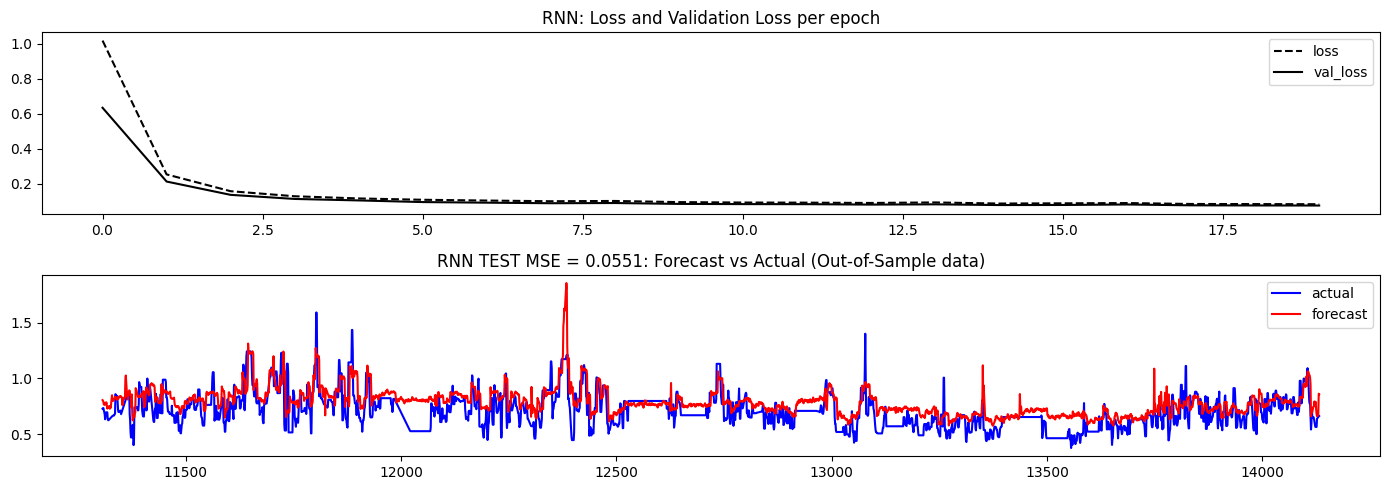

In [100]:

si_normal_rnn, history_normal_rnn = train_model_pt('RNN', **params_si)



## Inference simple RNN



## Inference sanity check first


In [101]:

model = si_normal_rnn


In [102]:


l_real, l_pred = inference_model_pt_2(model, model_type='RNN', **params_si)


0


In [103]:

l_real[:20]


[0.7290666878159715,
 0.7340000180884039,
 0.7340000180884039,
 0.7124000180013398,
 0.698000017943297,
 0.676666659877687,
 0.6340000176853292,
 0.6621333110818439,
 0.6959999717234467,
 0.6959999717234467,
 0.6959999717234467,
 0.6959999717234467,
 0.6439333341143787,
 0.6249999945431581,
 0.6260226799143174,
 0.6300204063104308,
 0.6342040889447298,
 0.6383877715790289,
 0.642571417243897,
 0.646755099878196]

In [104]:

l_pred[:20]


[array([0.80555665], dtype=float32),
 array([0.7995307], dtype=float32),
 array([0.78905505], dtype=float32),
 array([0.766891], dtype=float32),
 array([0.7676613], dtype=float32),
 array([0.7628069], dtype=float32),
 array([0.7795513], dtype=float32),
 array([0.7833854], dtype=float32),
 array([0.7700447], dtype=float32),
 array([0.78474164], dtype=float32),
 array([0.75287133], dtype=float32),
 array([0.72970563], dtype=float32),
 array([0.7505337], dtype=float32),
 array([0.74110126], dtype=float32),
 array([0.7378255], dtype=float32),
 array([0.74878657], dtype=float32),
 array([0.7476581], dtype=float32),
 array([0.72820675], dtype=float32),
 array([0.754748], dtype=float32),
 array([0.736887], dtype=float32)]

In [105]:

## plt.rcParams["figure.figsize"] = [14, 5] 


2826


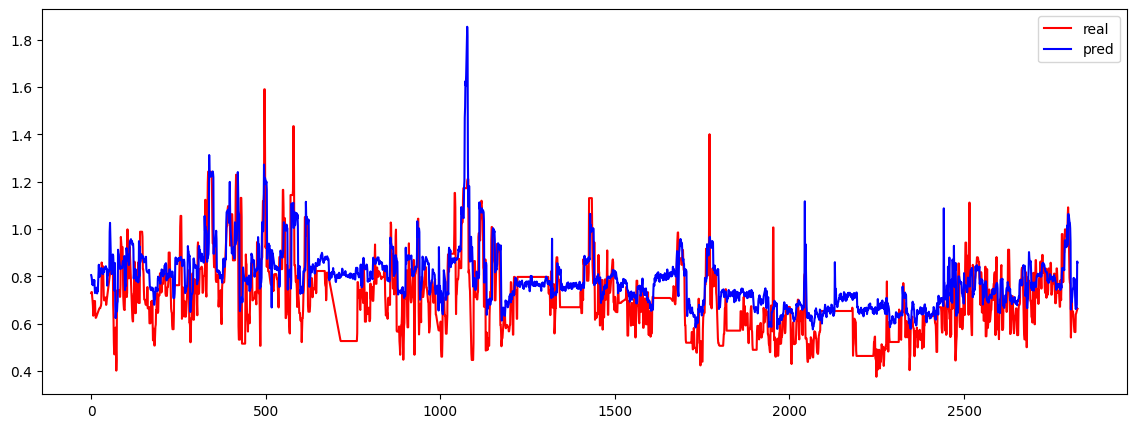

In [106]:


  
# create data 
x = [ i for i in range(len(l_real)) ] 
print(len(x))
  
# plot lines 

plt.plot(x, l_real, label = "real", color='red') 
plt.plot(x, l_pred, label = "pred", color='blue') 
plt.legend() 
plt.show()



## Now run actual INFERENCE to predict x vector and silicon together


In [107]:

model = si_normal_rnn


In [108]:

l_real, l_pred = inference_model_pt(model, model_type='RNN', **params_si)


0


In [109]:

l_real[:20]


[0.7290666878159715,
 0.7340000180884039,
 0.7340000180884039,
 0.7124000180013398,
 0.698000017943297,
 0.676666659877687,
 0.6340000176853292,
 0.6621333110818439,
 0.6959999717234467,
 0.6959999717234467,
 0.6959999717234467,
 0.6959999717234467,
 0.6439333341143787,
 0.6249999945431581,
 0.6260226799143174,
 0.6300204063104308,
 0.6342040889447298,
 0.6383877715790289,
 0.642571417243897,
 0.646755099878196]

In [110]:

l_pred[:20]


[array([0.80555665], dtype=float32),
 array([0.806921], dtype=float32),
 array([0.81423205], dtype=float32),
 array([0.8236463], dtype=float32),
 array([0.832937], dtype=float32),
 array([0.8444592], dtype=float32),
 array([0.85432696], dtype=float32),
 array([0.861056], dtype=float32),
 array([0.86450195], dtype=float32),
 array([0.8626989], dtype=float32),
 array([0.8513408], dtype=float32),
 array([0.825994], dtype=float32),
 array([0.78543615], dtype=float32),
 array([0.77275467], dtype=float32),
 array([0.7549095], dtype=float32),
 array([0.7339095], dtype=float32),
 array([0.7071496], dtype=float32),
 array([0.7282187], dtype=float32),
 array([0.73829865], dtype=float32),
 array([0.7644783], dtype=float32)]

2826


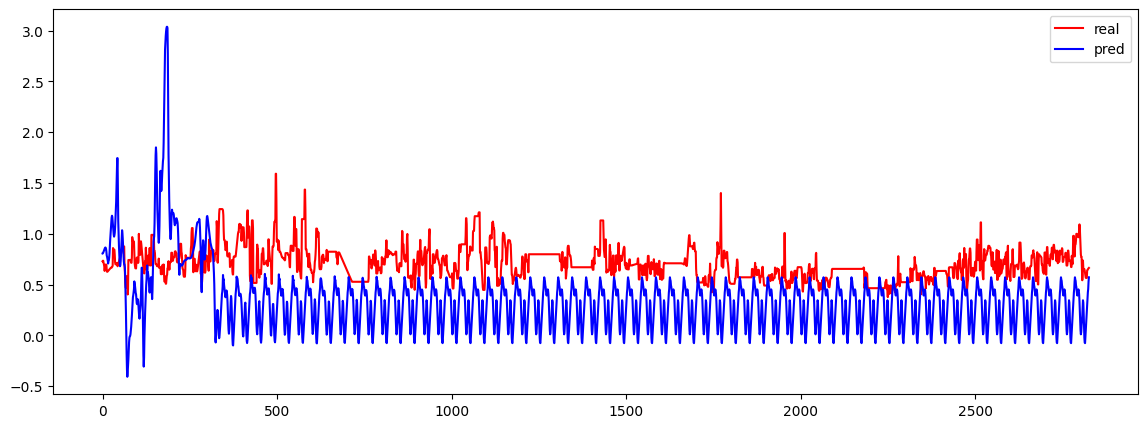

In [111]:

# create data 
x = [ i for i in range(len(l_real)) ] 
print(len(x))
  
# plot lines 

plt.plot(x, l_real, label = "real", color='red') 
plt.plot(x, l_pred, label = "pred", color='blue') 
plt.legend() 
plt.show()



## Break up test set into test bins of lenght == 1 week

* input is 30 (about 7.5 hours)
* predicts rest of week


In [112]:

model = si_normal_rnn


In [113]:

x_test, y_test   = params_si['test_data']

## l_real, l_pred = bins_inference_model_pt(model, x_test, y_test)




In [114]:

2826 / 220


12.845454545454546

torch.Size([220, 522])
torch.Size([220, 19])
0
220


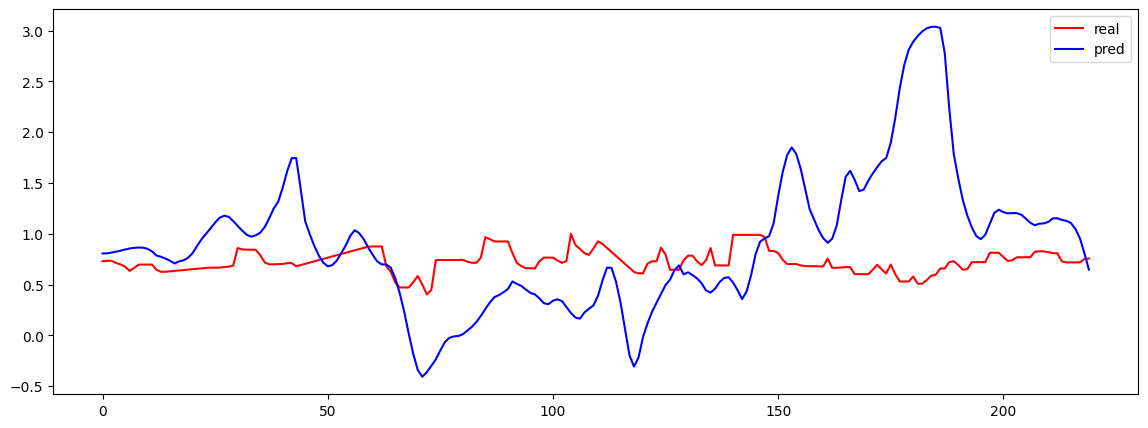

torch.Size([220, 522])
torch.Size([220, 19])
0
220


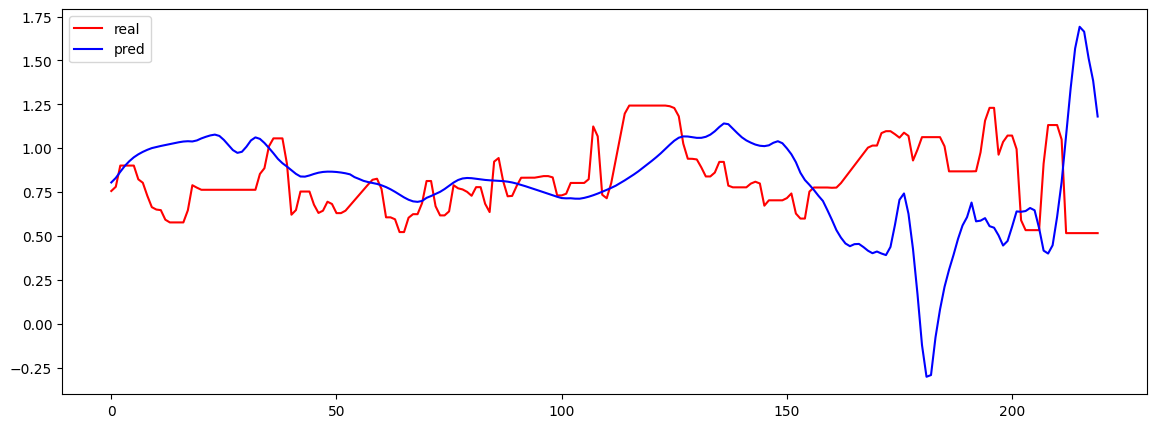

torch.Size([220, 522])
torch.Size([220, 19])
0
220


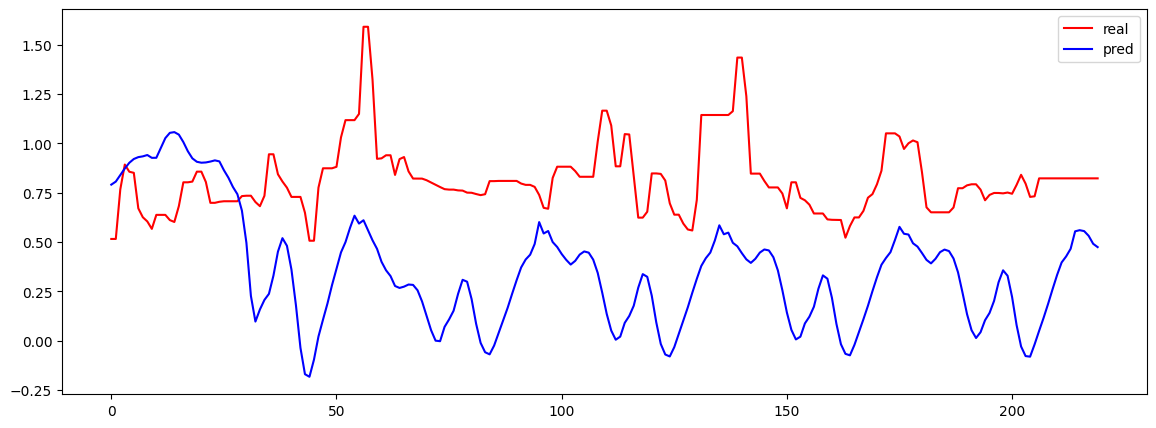

torch.Size([220, 522])
torch.Size([220, 19])
0
220


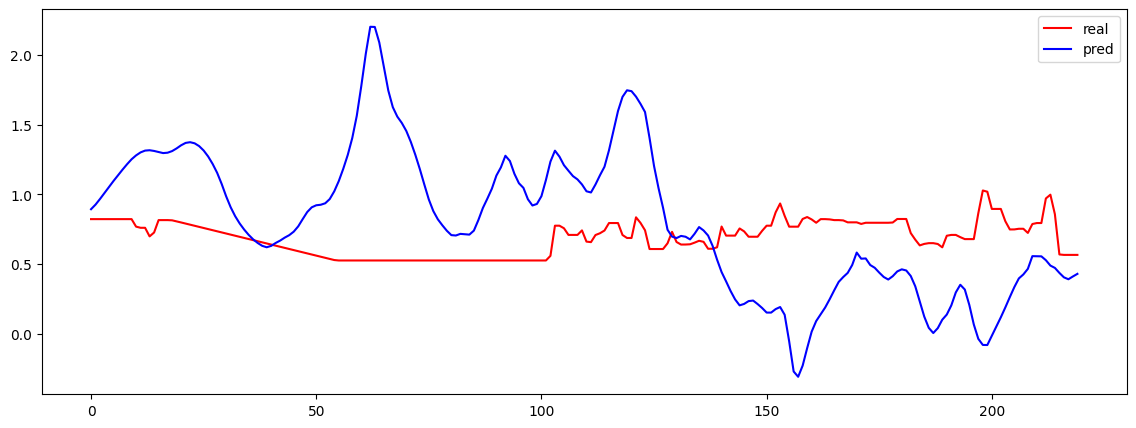

torch.Size([220, 522])
torch.Size([220, 19])
0
220


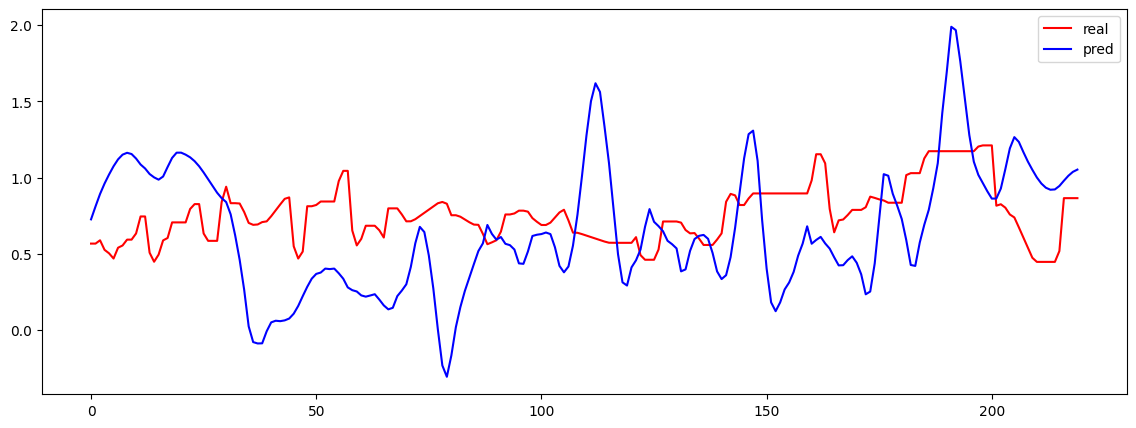

torch.Size([220, 522])
torch.Size([220, 19])
0
220


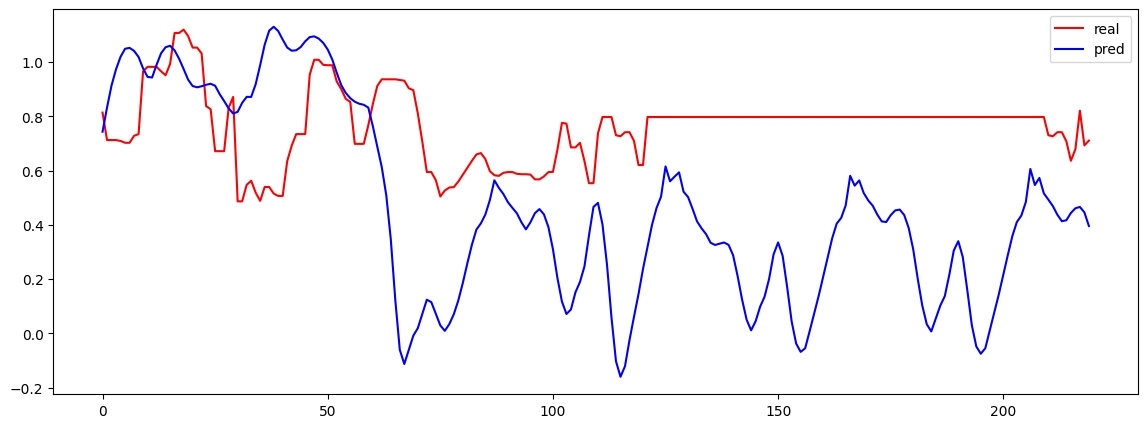

torch.Size([220, 522])
torch.Size([220, 19])
0
220


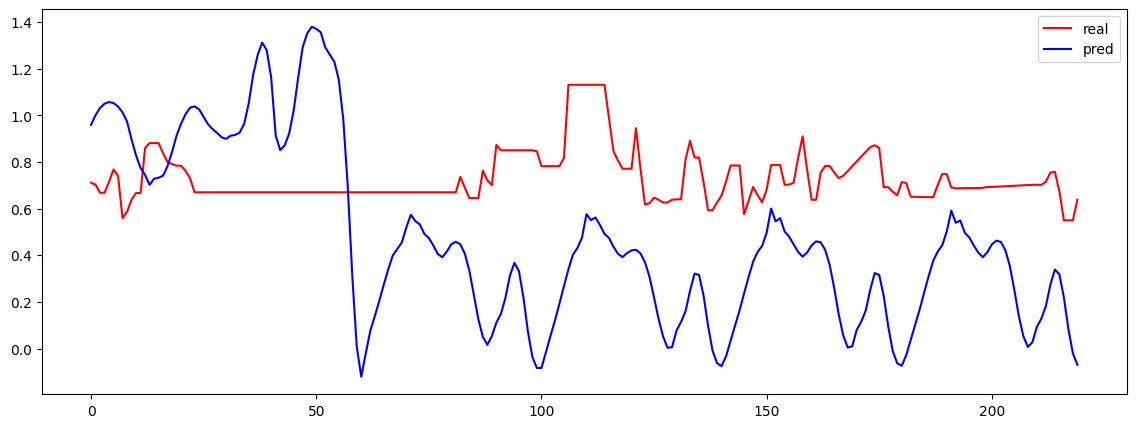

torch.Size([220, 522])
torch.Size([220, 19])
0
220


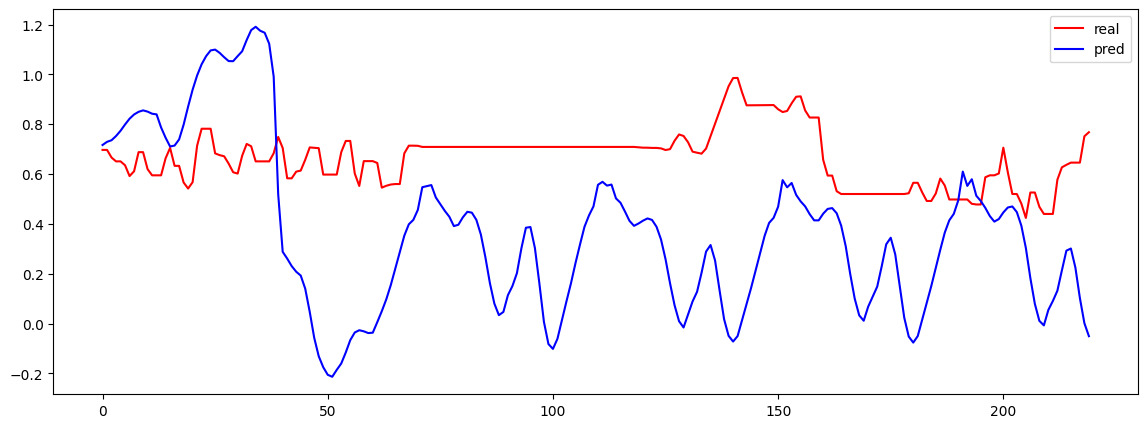

torch.Size([220, 522])
torch.Size([220, 19])
0
220


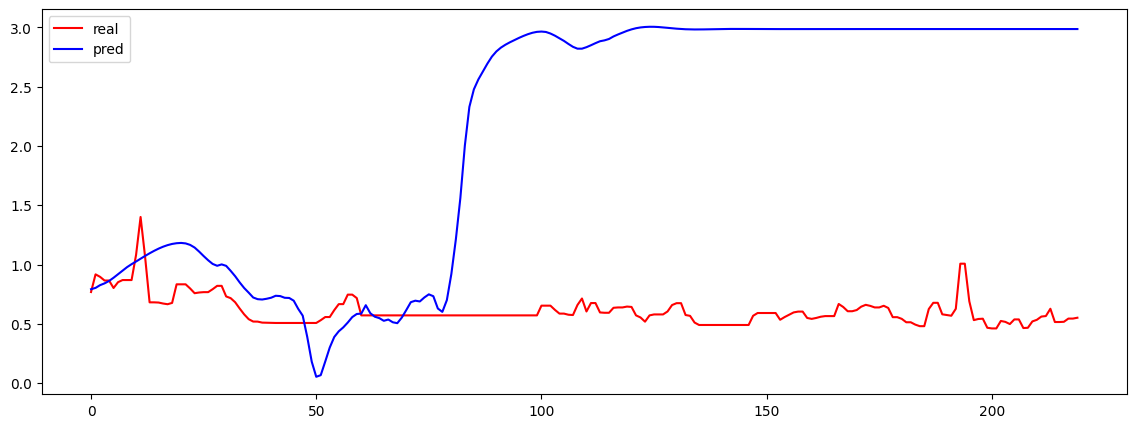

torch.Size([220, 522])
torch.Size([220, 19])
0
220


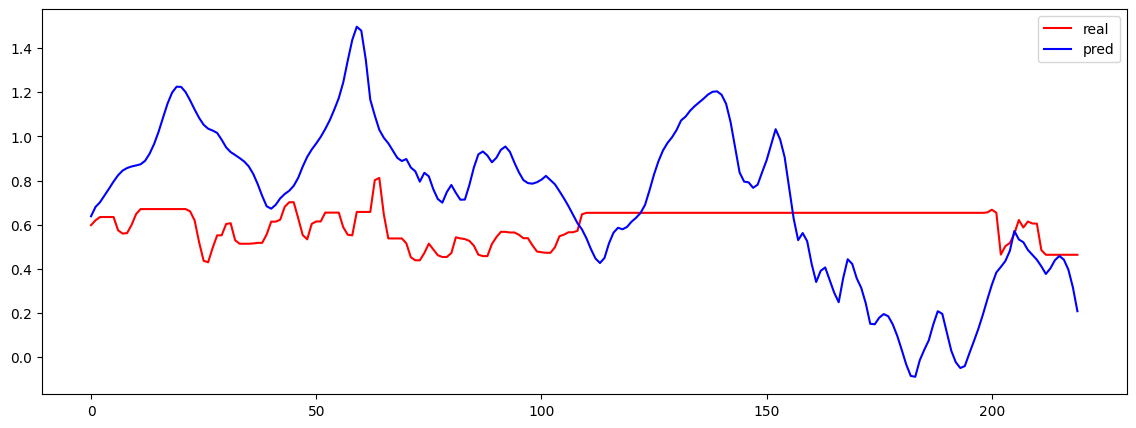

torch.Size([220, 522])
torch.Size([220, 19])
0
220


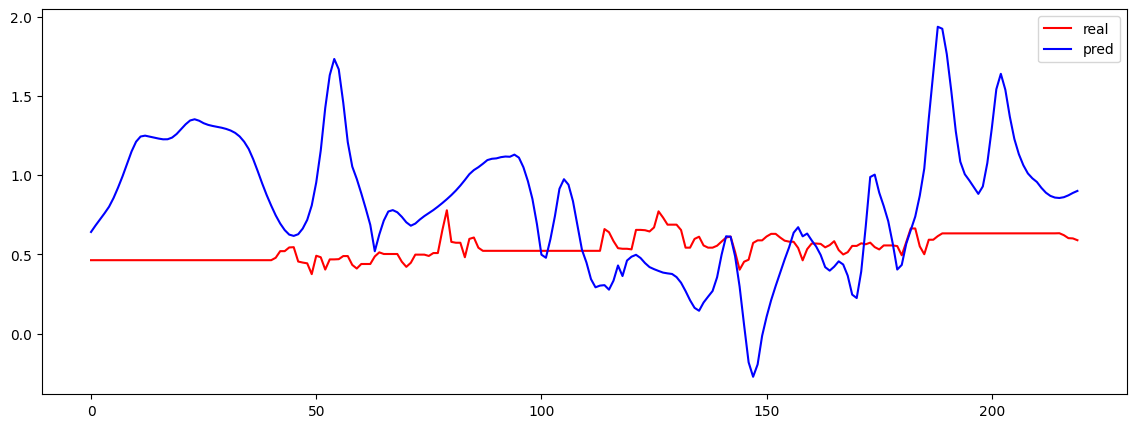

torch.Size([220, 522])
torch.Size([220, 19])
0
220


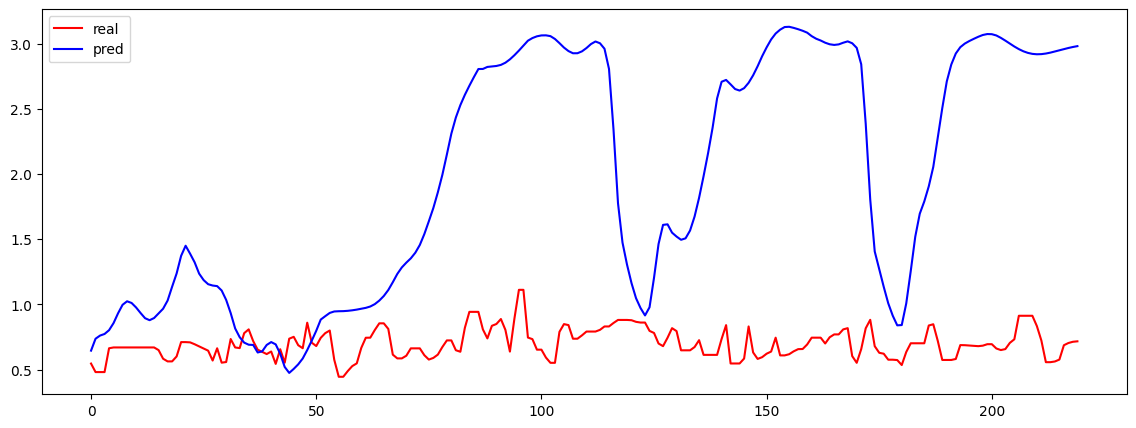

In [115]:

for i in range(0, y_test.shape[0]-220, 220):
    batch_x_test = x_test[i:i+220, :]
    print( batch_x_test.shape )

    batch_y_test = y_test[i:i+220, :]
    print( batch_y_test.shape )

    bins_inference_model_pt(model, batch_x_test, batch_y_test)




## LSTM


In [116]:

class LSTM(nn.Module):
    def __init__(self, seq_length, input_size, output_size, n_features, n_layers):
        super(LSTM, self).__init__()
        self.n_layers   = n_layers
        self.hidden_dim = n_features
        self.output_size= output_size
        self.seq_length = seq_length
        self.input_size = input_size

        self.lstm    = nn.LSTM(input_size, n_features, n_layers, batch_first=False)
        self.dropout = nn.Dropout(0.2)
        self.fc      = nn.Linear(n_features, output_size)
        
    def forward(self, x, hn):
        x = x.view(-1, self.seq_length, self.input_size)
        x = x.permute(1, 0, 2)

        ## hn is a tuple here of (h0, c0)
        lstm_o, (hn, cn) = self.lstm(x, hn)
    
        lstm_o = self.dropout(lstm_o)

        # reshape
        ## lstm_o = lstm_o.view( -1, self.hidden_dim)
        
        output = self.fc( hn )
    
        ##                     batch_size, n_classes) 
        output  = output.view( -1,  self.output_size ) 
        
        return output, hn


    def init_hidden(self, batch_size_x_data):
        weight = next(self.parameters()).data
        hidden = ( weight.new(self.n_layers, 1, self.hidden_dim).zero_(),
                   weight.new(self.n_layers, 1, self.hidden_dim).zero_()   )
        N_batches_rc = batch_size_x_data    ## or is this the size of the x set ??
        hidden2 = ( torch.zeros( self.n_layers,   N_batches_rc,    self.hidden_dim ),
                    torch.zeros( self.n_layers,   N_batches_rc,    self.hidden_dim )    )
        return hidden2


0/500 - Loss:  1.0006661415100098, val_loss: 0.6255720257759094
25/500 - Loss:  0.22166286408901215, val_loss: 0.1803957223892212
50/500 - Loss:  0.137950137257576, val_loss: 0.11878082901239395
75/500 - Loss:  0.11270365864038467, val_loss: 0.10038694739341736
100/500 - Loss:  0.1005541980266571, val_loss: 0.08943813294172287
125/500 - Loss:  0.09437838196754456, val_loss: 0.08339126408100128
150/500 - Loss:  0.08855227380990982, val_loss: 0.07989370077848434
175/500 - Loss:  0.08367626368999481, val_loss: 0.07643413543701172
200/500 - Loss:  0.08071538805961609, val_loss: 0.07410667091608047
225/500 - Loss:  0.07821996510028839, val_loss: 0.07202646881341934
250/500 - Loss:  0.07827785611152649, val_loss: 0.07159798592329025
275/500 - Loss:  0.0750657394528389, val_loss: 0.06937535107135773
300/500 - Loss:  0.07239075750112534, val_loss: 0.06744950264692307
325/500 - Loss:  0.07142894715070724, val_loss: 0.0675111934542656
350/500 - Loss:  0.0698293000459671, val_loss: 0.065424911677

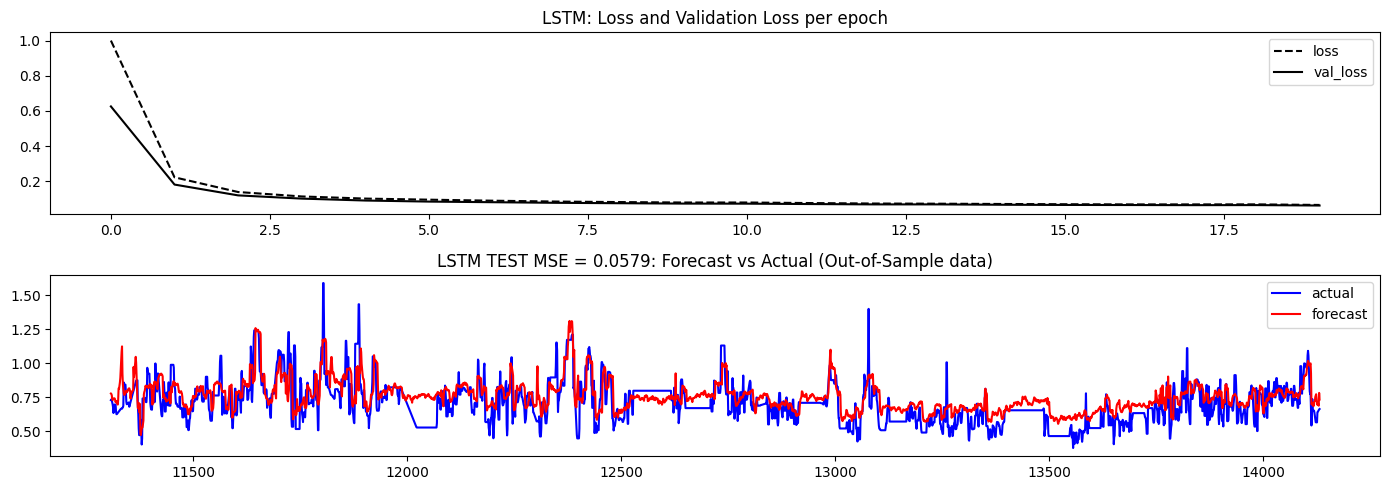

In [117]:

si_lstm, history_a_lstm = train_model_pt('LSTM', **params_si)



## LSTM Inference



## Inference sanity check first


In [118]:

model = si_lstm


In [119]:

l_real, l_pred = inference_model_pt_2(model, model_type='LSTM', **params_si)


0


In [120]:

l_real[:20]


[0.7290666878159715,
 0.7340000180884039,
 0.7340000180884039,
 0.7124000180013398,
 0.698000017943297,
 0.676666659877687,
 0.6340000176853292,
 0.6621333110818439,
 0.6959999717234467,
 0.6959999717234467,
 0.6959999717234467,
 0.6959999717234467,
 0.6439333341143787,
 0.6249999945431581,
 0.6260226799143174,
 0.6300204063104308,
 0.6342040889447298,
 0.6383877715790289,
 0.642571417243897,
 0.646755099878196]

In [121]:

l_pred[:20]


[array([0.7774411], dtype=float32),
 array([0.7743201], dtype=float32),
 array([0.76531065], dtype=float32),
 array([0.7392013], dtype=float32),
 array([0.72901213], dtype=float32),
 array([0.73347694], dtype=float32),
 array([0.73630977], dtype=float32),
 array([0.7420112], dtype=float32),
 array([0.7421484], dtype=float32),
 array([0.7406086], dtype=float32),
 array([0.7290276], dtype=float32),
 array([0.7135323], dtype=float32),
 array([0.72226965], dtype=float32),
 array([0.7208873], dtype=float32),
 array([0.7108856], dtype=float32),
 array([0.702049], dtype=float32),
 array([0.69600916], dtype=float32),
 array([0.7329631], dtype=float32),
 array([0.815752], dtype=float32),
 array([0.812184], dtype=float32)]

2826


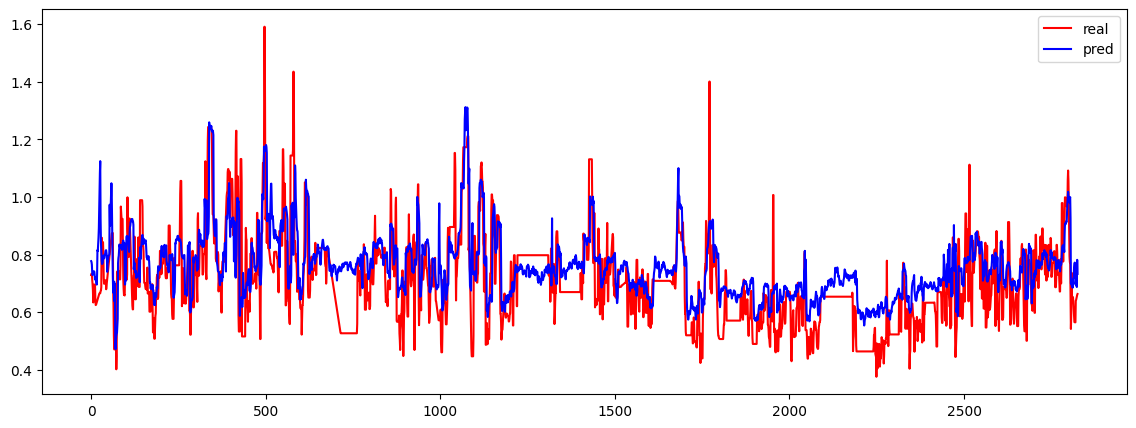

In [122]:

# create data 
x = [ i for i in range(len(l_real)) ] 
print(len(x))
  
# plot lines 

plt.plot(x, l_real, label = "real", color='red') 
plt.plot(x, l_pred, label = "pred", color='blue') 
plt.legend() 
plt.show()



## Now run actual INFERENCE to predict x vector and silicon together


In [123]:

model = si_lstm


In [124]:

l_real, l_pred = inference_model_pt(model, model_type='LSTM', **params_si)


0


In [125]:

l_real[:50]


[0.7290666878159715,
 0.7340000180884039,
 0.7340000180884039,
 0.7124000180013398,
 0.698000017943297,
 0.676666659877687,
 0.6340000176853292,
 0.6621333110818439,
 0.6959999717234467,
 0.6959999717234467,
 0.6959999717234467,
 0.6959999717234467,
 0.6439333341143787,
 0.6249999945431581,
 0.6260226799143174,
 0.6300204063104308,
 0.6342040889447298,
 0.6383877715790289,
 0.642571417243897,
 0.646755099878196,
 0.650938782512495,
 0.6551224651467942,
 0.6593061477810932,
 0.6634897934459613,
 0.6659814221904945,
 0.6660000178143131,
 0.6660000178143131,
 0.673199999358619,
 0.6750000039870532,
 0.6872666830263074,
 0.8590000232134262,
 0.8462000046771171,
 0.842999995421861,
 0.842999995421861,
 0.842999995421861,
 0.7902000229361108,
 0.7182000041611815,
 0.6990000040837911,
 0.6990000040837911,
 0.7006000040902403,
 0.70200001795942,
 0.7110000226168756,
 0.7110000226168756,
 0.6798560496638739,
 0.6918739798863025,
 0.7039748140578626,
 0.7160756482294227,
 0.7281765008856984,
 0.

In [126]:

l_pred[:500]


[array([0.7774411], dtype=float32),
 array([0.7750075], dtype=float32),
 array([0.76732755], dtype=float32),
 array([0.7682681], dtype=float32),
 array([0.77433455], dtype=float32),
 array([0.7852124], dtype=float32),
 array([0.8020357], dtype=float32),
 array([0.8239126], dtype=float32),
 array([0.8481029], dtype=float32),
 array([0.8722219], dtype=float32),
 array([0.8950167], dtype=float32),
 array([0.91567886], dtype=float32),
 array([0.93341935], dtype=float32),
 array([0.94770503], dtype=float32),
 array([0.95849675], dtype=float32),
 array([0.9661515], dtype=float32),
 array([0.9712071], dtype=float32),
 array([0.9742552], dtype=float32),
 array([0.9758967], dtype=float32),
 array([0.976699], dtype=float32),
 array([0.9771317], dtype=float32),
 array([0.97751236], dtype=float32),
 array([0.97798043], dtype=float32),
 array([0.978497], dtype=float32),
 array([0.9788531], dtype=float32),
 array([0.9786866], dtype=float32),
 array([0.97750753], dtype=float32),
 array([0.97474027], 

2826


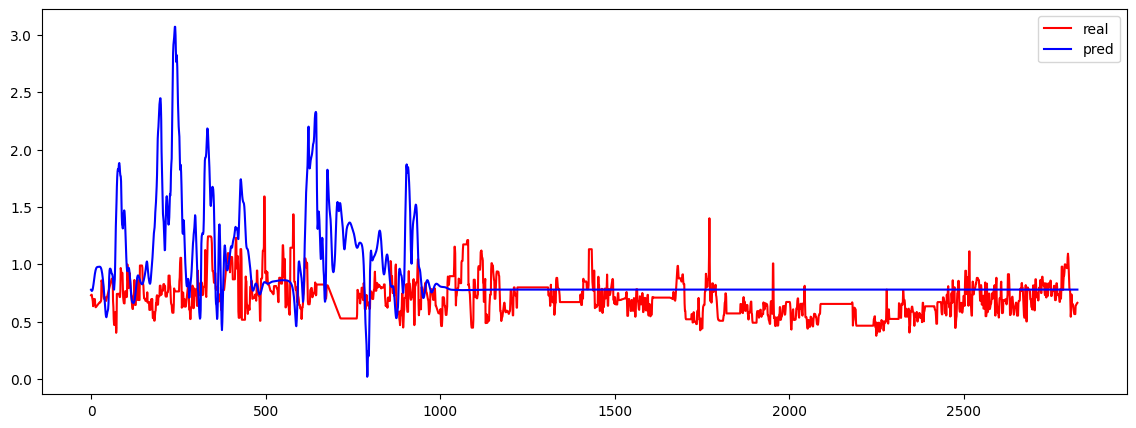

In [127]:

# create data 
x = [ i for i in range(len(l_real)) ] 
print(len(x))
  
# plot lines 

plt.plot(x, l_real, label = "real", color='red') 
plt.plot(x, l_pred, label = "pred", color='blue') 
plt.legend() 
plt.show()



## Break up test set into test bins of lenght == 1 week

* input is 30 (about 7.5 hours)
* predicts rest of week


In [128]:

model = si_lstm


In [129]:


x_test, y_test   = params_si['test_data']

## l_real, l_pred = bins_inference_model_pt(model, x_test, y_test)



In [130]:

2826 / 220


12.845454545454546

torch.Size([220, 522])
torch.Size([220, 19])
0
220


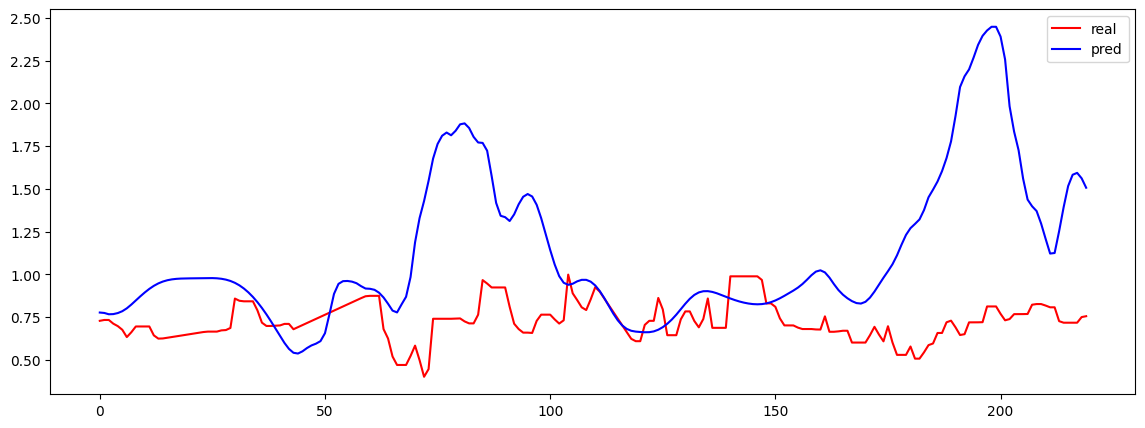

torch.Size([220, 522])
torch.Size([220, 19])
0
220


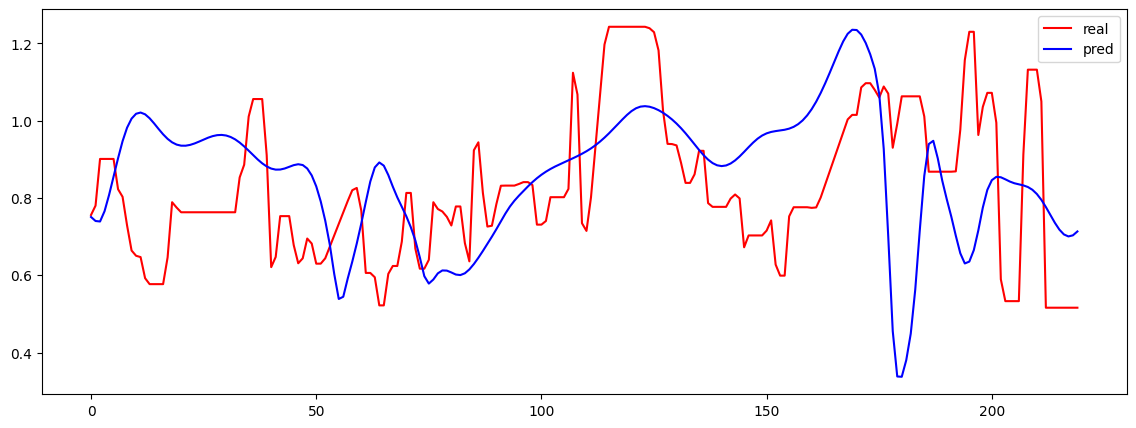

torch.Size([220, 522])
torch.Size([220, 19])
0
220


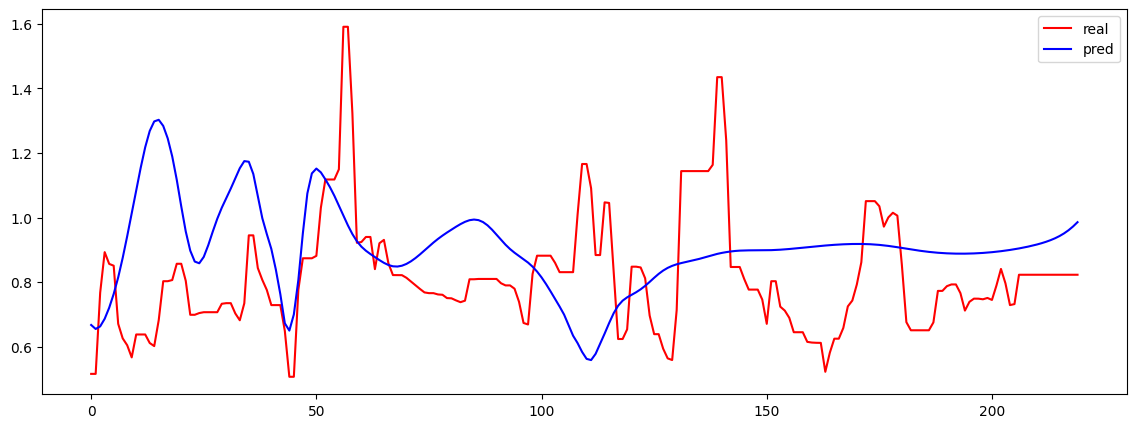

torch.Size([220, 522])
torch.Size([220, 19])
0
220


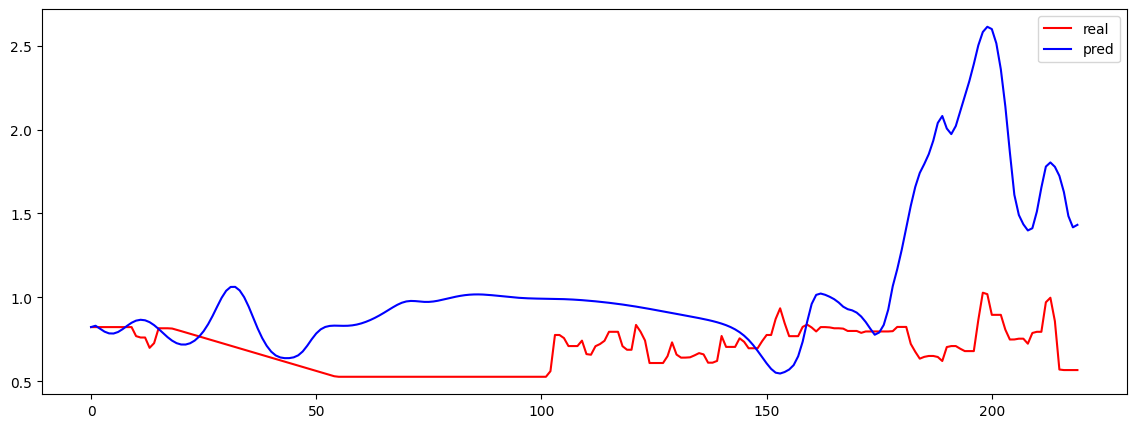

torch.Size([220, 522])
torch.Size([220, 19])
0
220


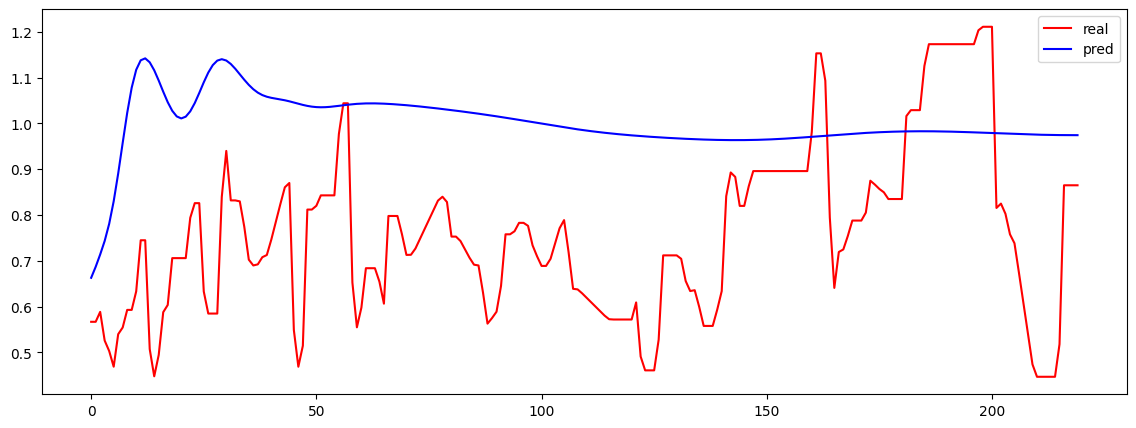

torch.Size([220, 522])
torch.Size([220, 19])
0
220


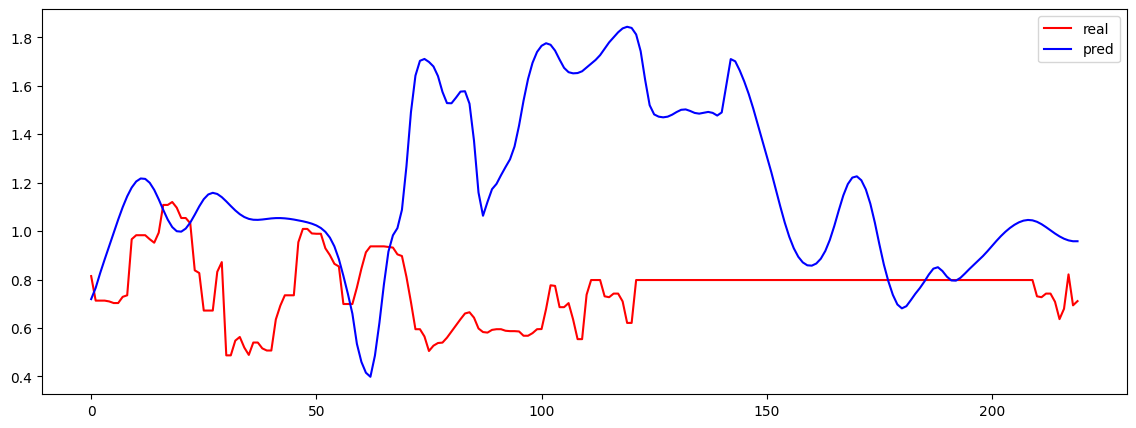

torch.Size([220, 522])
torch.Size([220, 19])
0
220


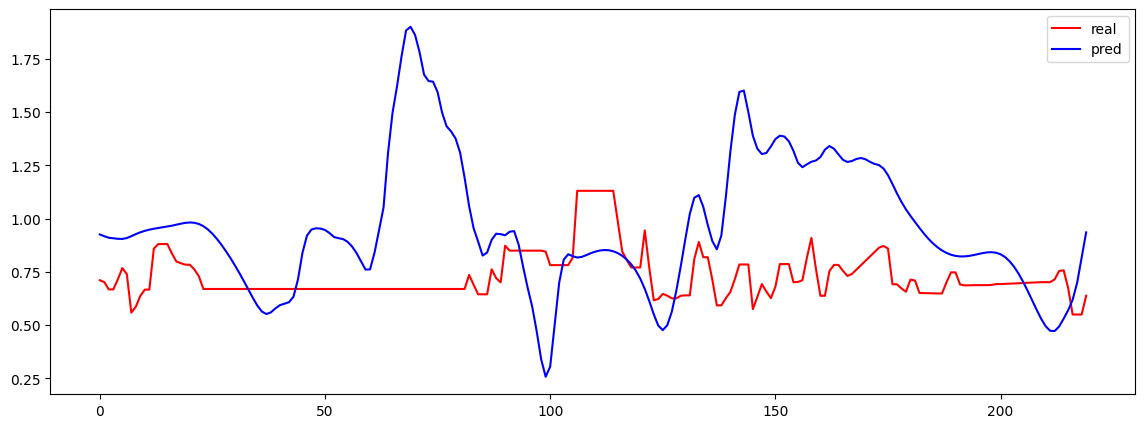

torch.Size([220, 522])
torch.Size([220, 19])
0
220


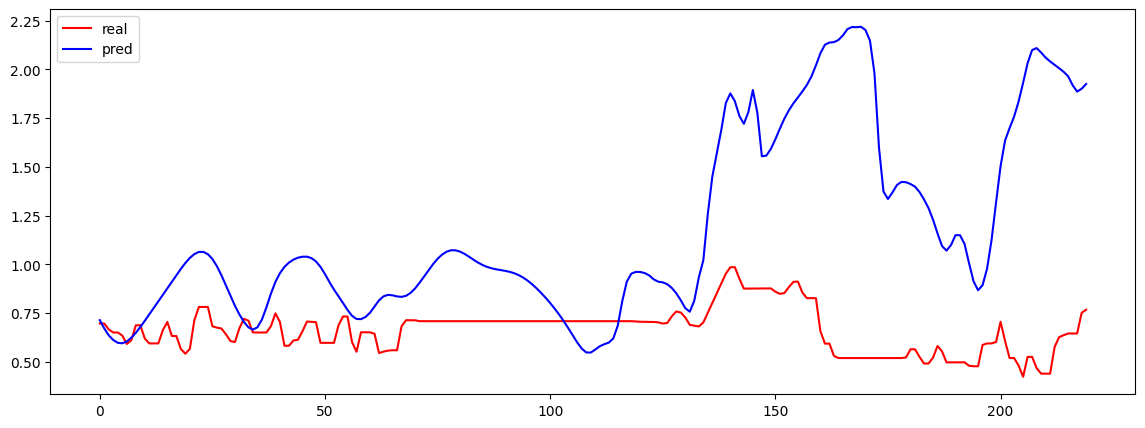

torch.Size([220, 522])
torch.Size([220, 19])
0
220


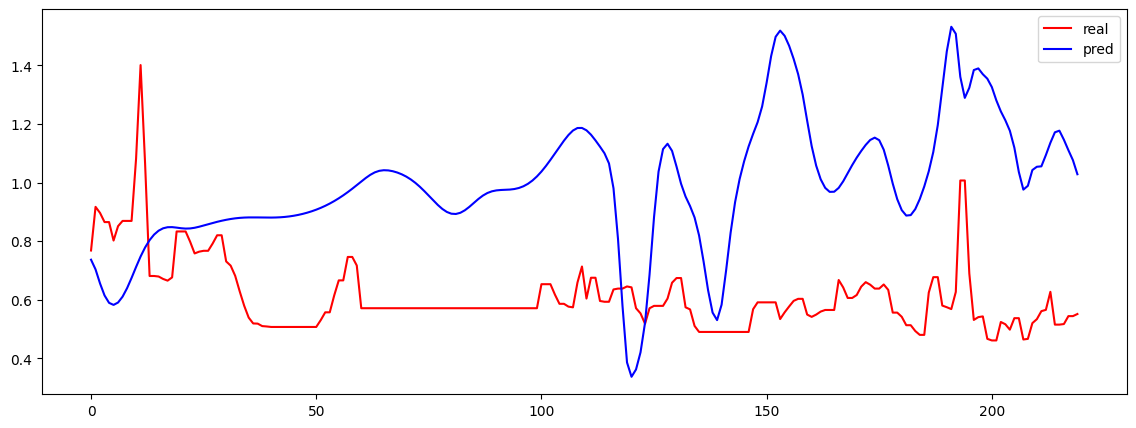

torch.Size([220, 522])
torch.Size([220, 19])
0
220


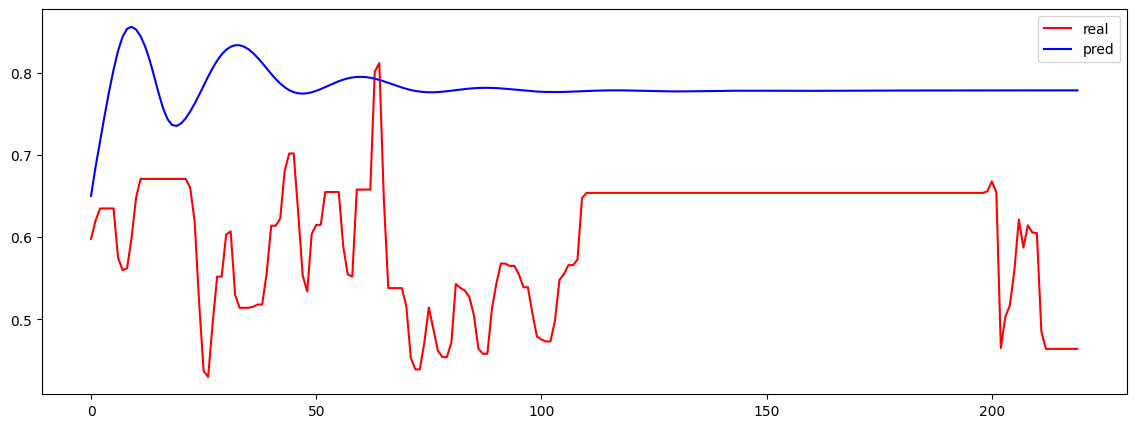

torch.Size([220, 522])
torch.Size([220, 19])
0
220


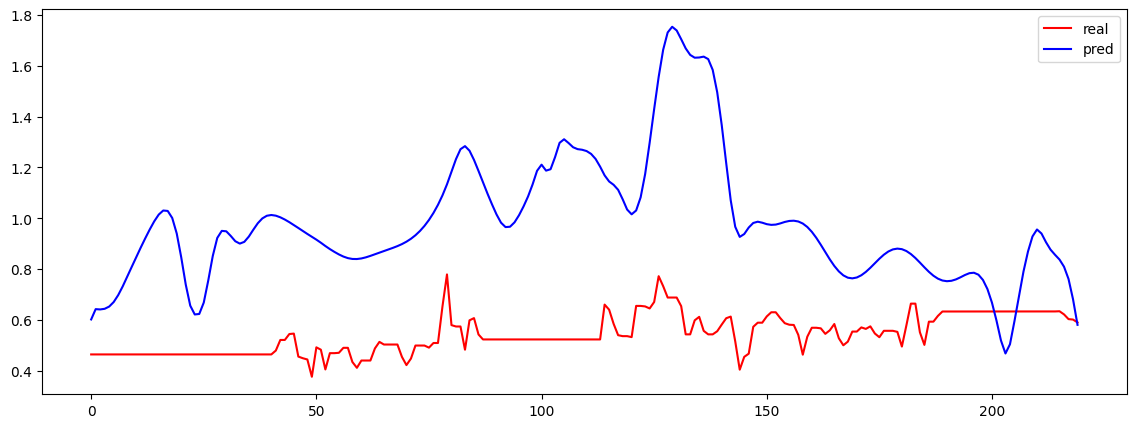

torch.Size([220, 522])
torch.Size([220, 19])
0
220


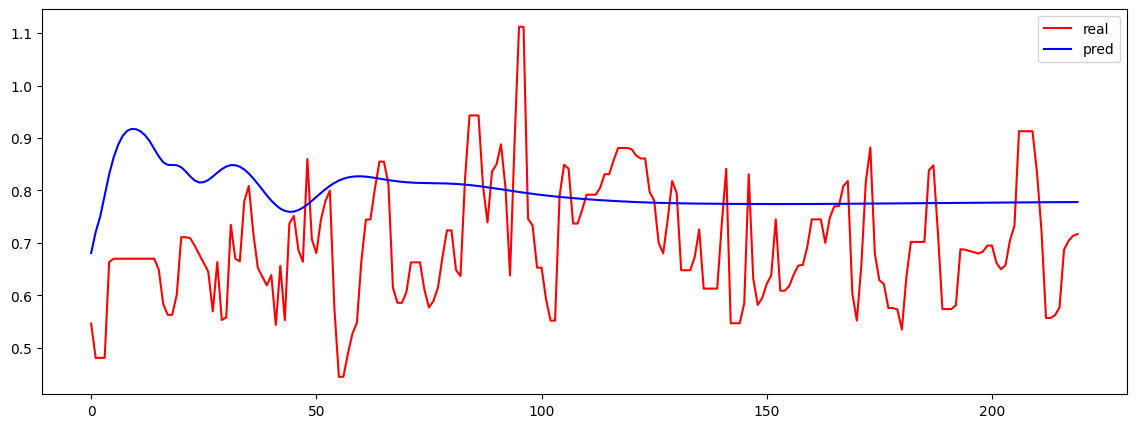

In [131]:

for i in range(0, y_test.shape[0]-220, 220):
    batch_x_test = x_test[i:i+220, :]
    print( batch_x_test.shape )

    batch_y_test = y_test[i:i+220, :]
    print( batch_y_test.shape )

    bins_inference_model_pt(model, batch_x_test, batch_y_test)



## View all predicted Xs


In [132]:


            
            
def View_all_predicted_Xs(x_index, model, model_type='RNN', **kwargs):
 
    x_test, y_test   = kwargs['test_data']
 
    ## Prediction
    model.eval()
    with torch.no_grad():
        h0    = model.init_hidden( x_test.shape[0] )
        y_hat = model(x_test, h0)
        
    y_hat, _ = y_hat
 
    ## Plotting
    fig, ax = plt.subplots(2, 1) 
    
    ax[0].set_title(f"{model_type} TEST MSE = {0:.4f}: Forecast vs Actual (Out-of-Sample data)")
    scale = kwargs['scale']
    print("ricardo check this")
    print(y_test.shape)
    print(y_hat.shape )
    actual = scale.inverse_y(y_test.detach().numpy() ) ## .ravel() )
    pred   = scale.inverse_y( y_hat.detach().numpy() ) ## .ravel() )
    idx = kwargs['idx']
    ##pd.Series(actual, index=idx).plot(style='k--', label='actual', alpha=0.65, color='blue')
    ##pd.Series(pred,   index=idx).plot(style='k',   label='forecast' , color='red')
    print(actual.shape)
    print(pred.shape)
    actual = actual[:, x_index]
    pred   =   pred[:, x_index]
    
    pd.Series(pred,   index=idx).plot( label='forecast' , color='red' )
    pd.Series(actual, index=idx).plot( label='actual',    color='blue')
    
    fig.tight_layout()
    ax[1].legend(); plt.show()
    
    return 0, 0
    
           

            



ricardo check this
torch.Size([2826, 19])
torch.Size([2826, 19])
(541,)
(541,)
(19,)
(19,)
(2826, 19)
(1, 19)
(1, 19)
(541,)
(541,)
(19,)
(19,)
(2826, 19)
(1, 19)
(1, 19)
(2826, 19)
(2826, 19)


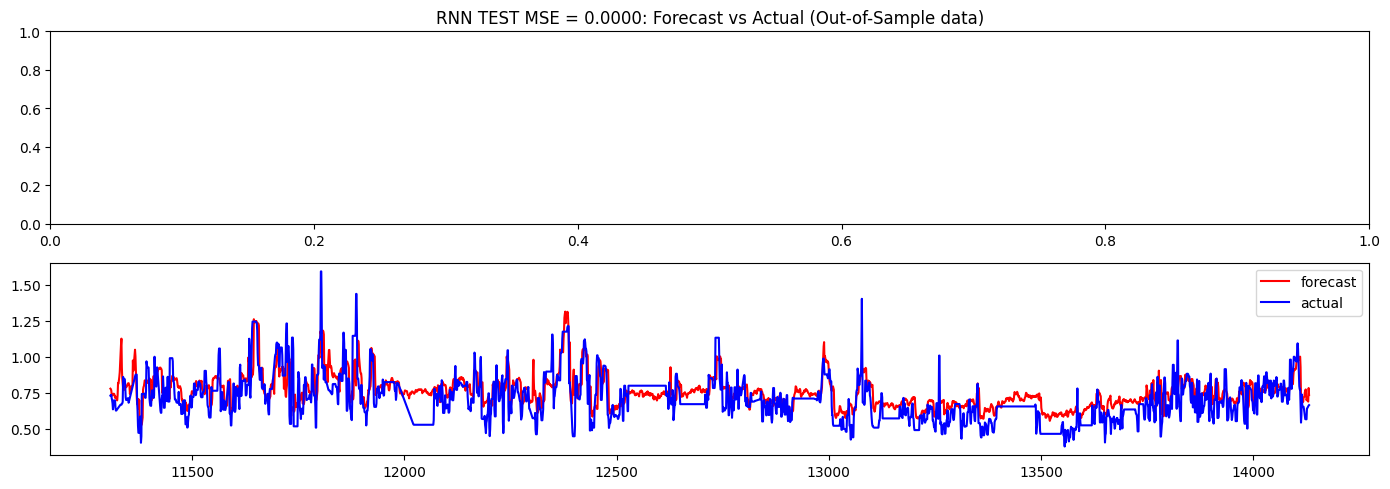

ricardo check this
torch.Size([2826, 19])
torch.Size([2826, 19])
(541,)
(541,)
(19,)
(19,)
(2826, 19)
(1, 19)
(1, 19)
(541,)
(541,)
(19,)
(19,)
(2826, 19)
(1, 19)
(1, 19)
(2826, 19)
(2826, 19)


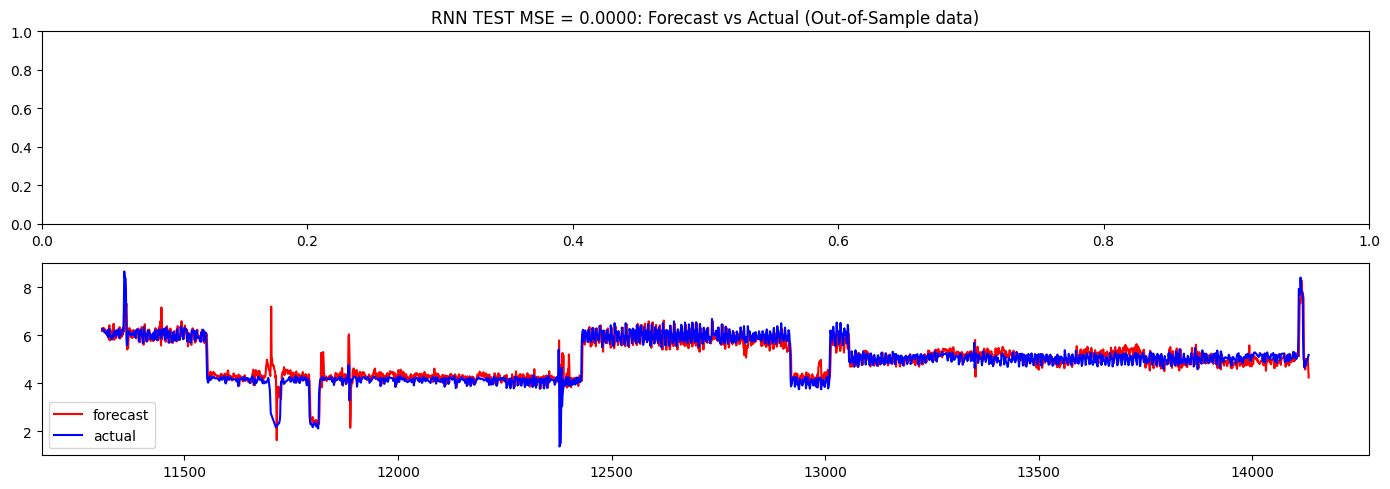

ricardo check this
torch.Size([2826, 19])
torch.Size([2826, 19])
(541,)
(541,)
(19,)
(19,)
(2826, 19)
(1, 19)
(1, 19)
(541,)
(541,)
(19,)
(19,)
(2826, 19)
(1, 19)
(1, 19)
(2826, 19)
(2826, 19)


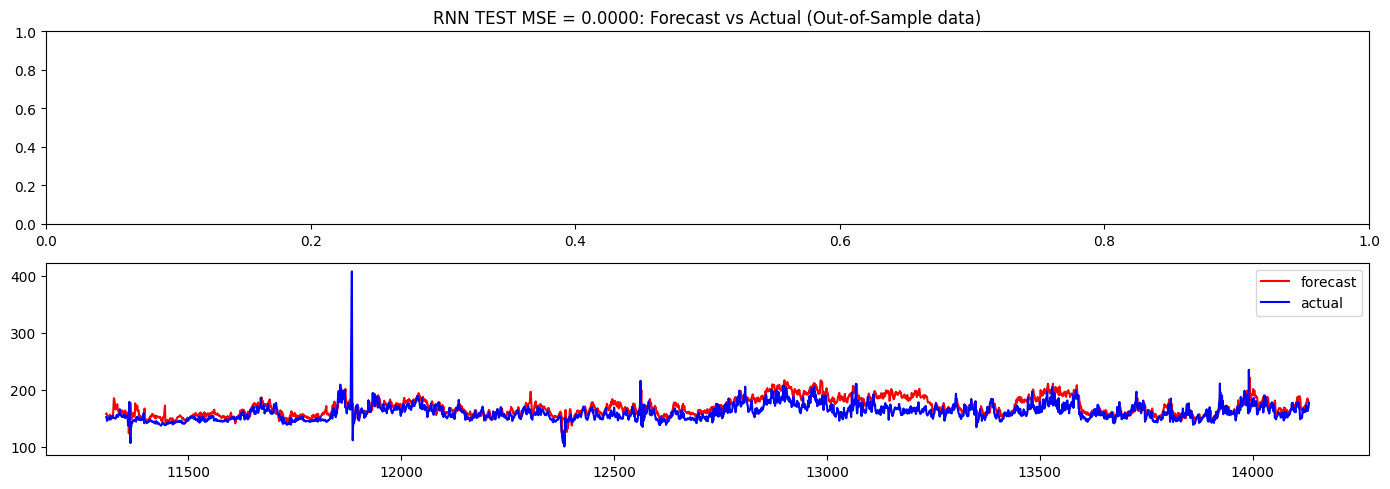

ricardo check this
torch.Size([2826, 19])
torch.Size([2826, 19])
(541,)
(541,)
(19,)
(19,)
(2826, 19)
(1, 19)
(1, 19)
(541,)
(541,)
(19,)
(19,)
(2826, 19)
(1, 19)
(1, 19)
(2826, 19)
(2826, 19)


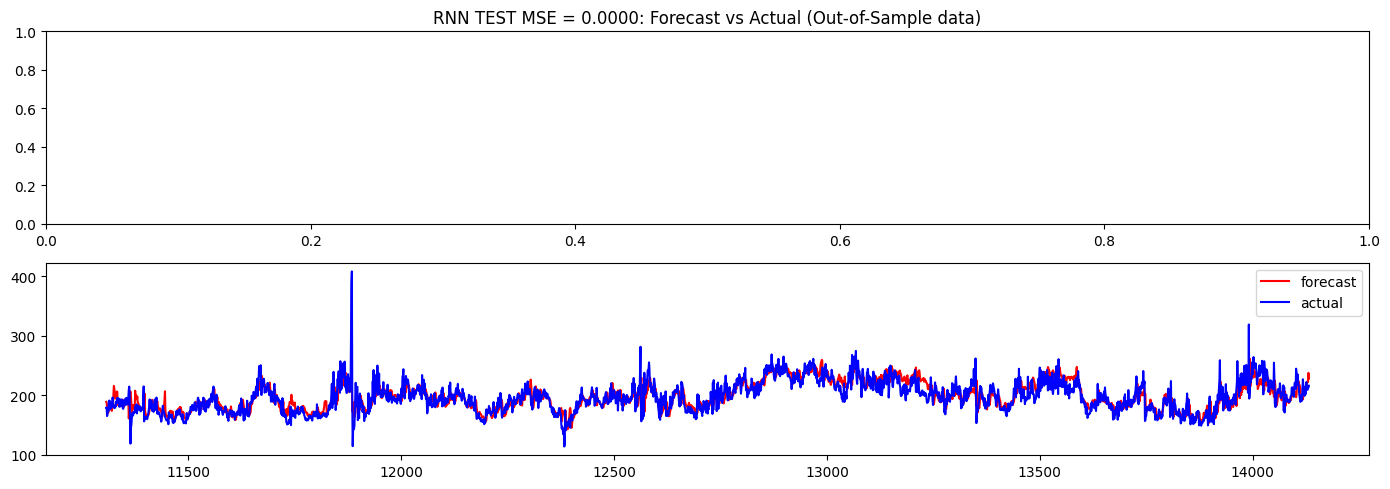

ricardo check this
torch.Size([2826, 19])
torch.Size([2826, 19])
(541,)
(541,)
(19,)
(19,)
(2826, 19)
(1, 19)
(1, 19)
(541,)
(541,)
(19,)
(19,)
(2826, 19)
(1, 19)
(1, 19)
(2826, 19)
(2826, 19)


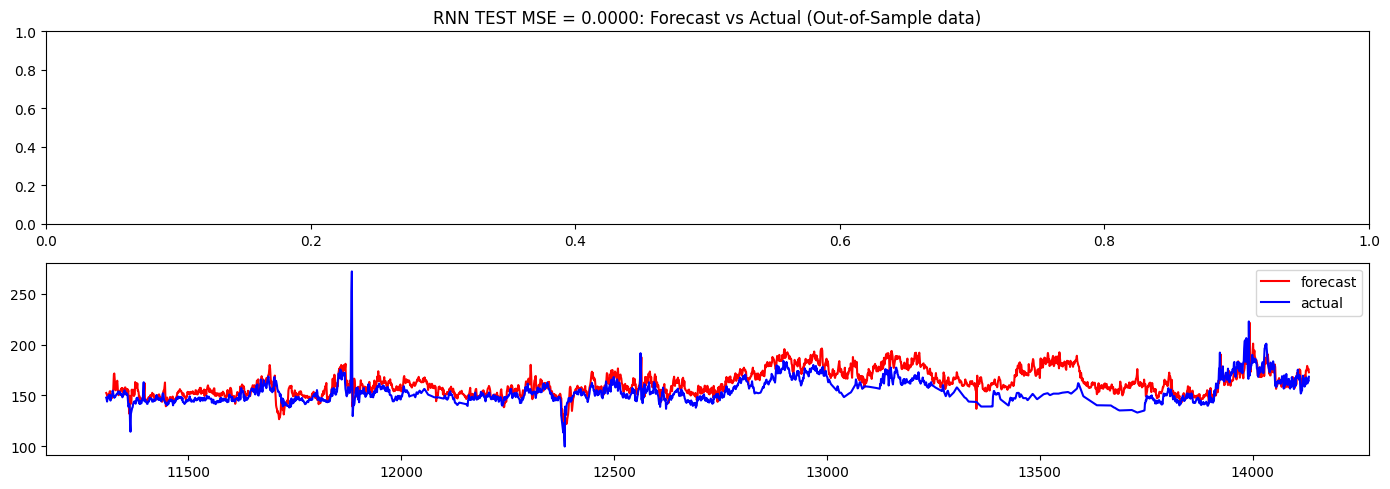

ricardo check this
torch.Size([2826, 19])
torch.Size([2826, 19])
(541,)
(541,)
(19,)
(19,)
(2826, 19)
(1, 19)
(1, 19)
(541,)
(541,)
(19,)
(19,)
(2826, 19)
(1, 19)
(1, 19)
(2826, 19)
(2826, 19)


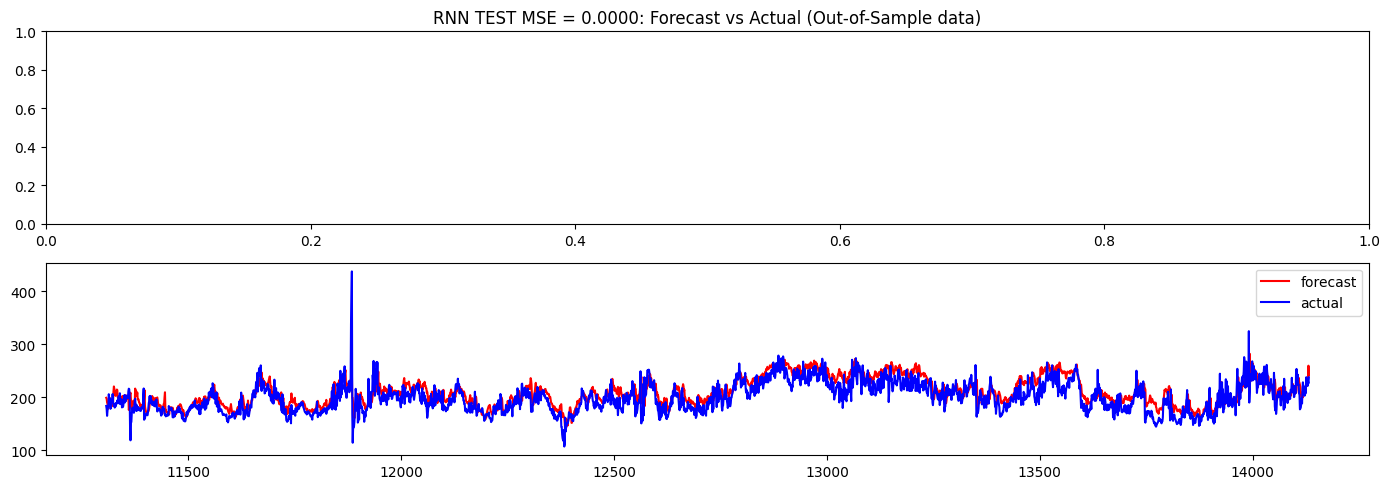

ricardo check this
torch.Size([2826, 19])
torch.Size([2826, 19])
(541,)
(541,)
(19,)
(19,)
(2826, 19)
(1, 19)
(1, 19)
(541,)
(541,)
(19,)
(19,)
(2826, 19)
(1, 19)
(1, 19)
(2826, 19)
(2826, 19)


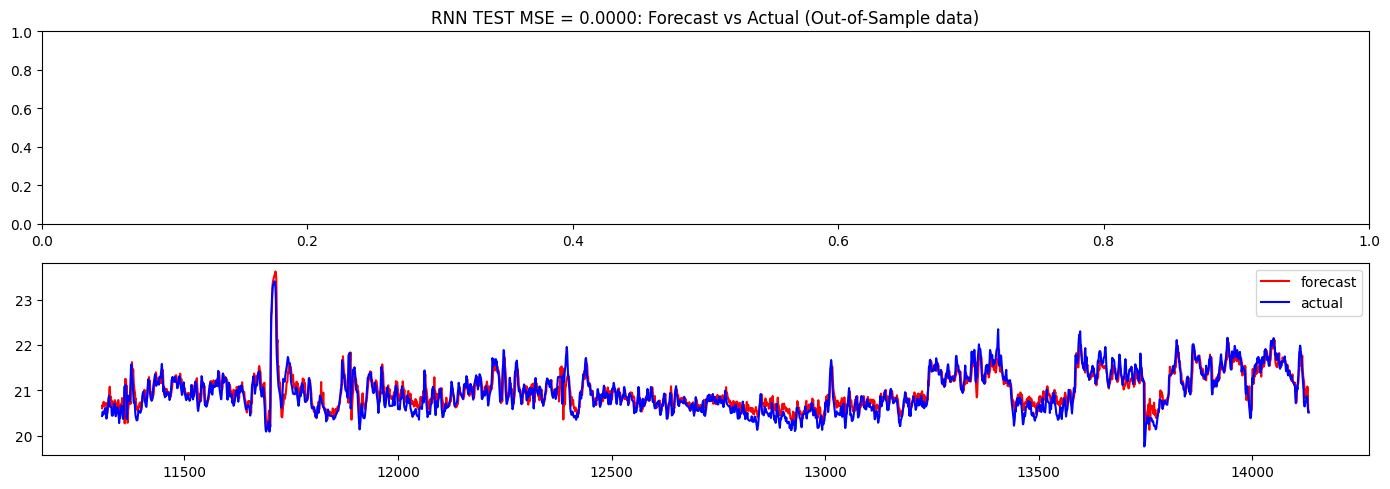

ricardo check this
torch.Size([2826, 19])
torch.Size([2826, 19])
(541,)
(541,)
(19,)
(19,)
(2826, 19)
(1, 19)
(1, 19)
(541,)
(541,)
(19,)
(19,)
(2826, 19)
(1, 19)
(1, 19)
(2826, 19)
(2826, 19)


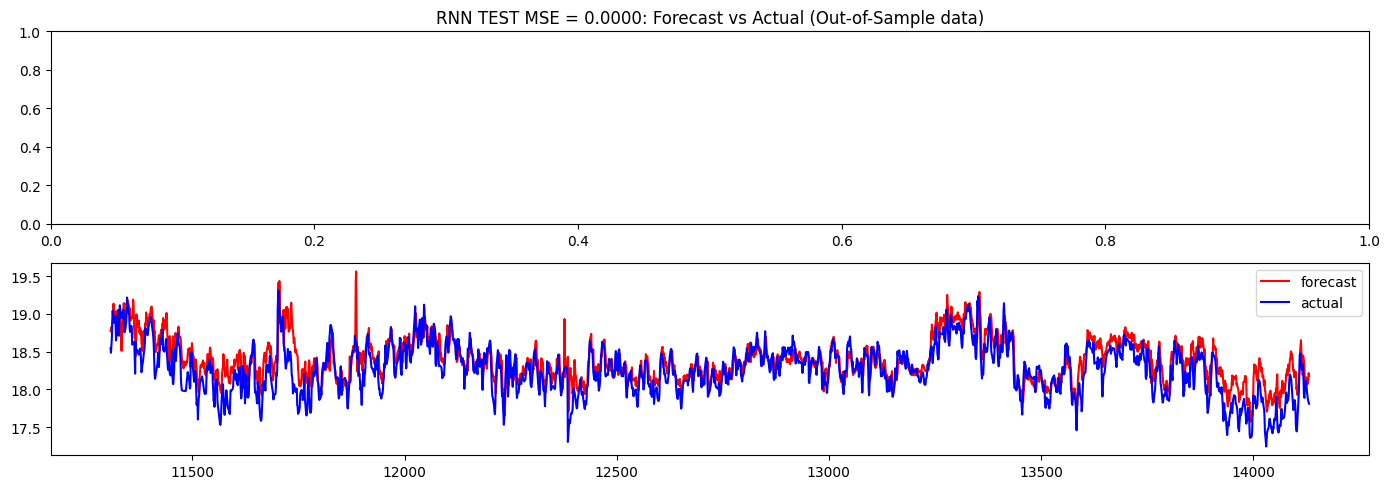

ricardo check this
torch.Size([2826, 19])
torch.Size([2826, 19])
(541,)
(541,)
(19,)
(19,)
(2826, 19)
(1, 19)
(1, 19)
(541,)
(541,)
(19,)
(19,)
(2826, 19)
(1, 19)
(1, 19)
(2826, 19)
(2826, 19)


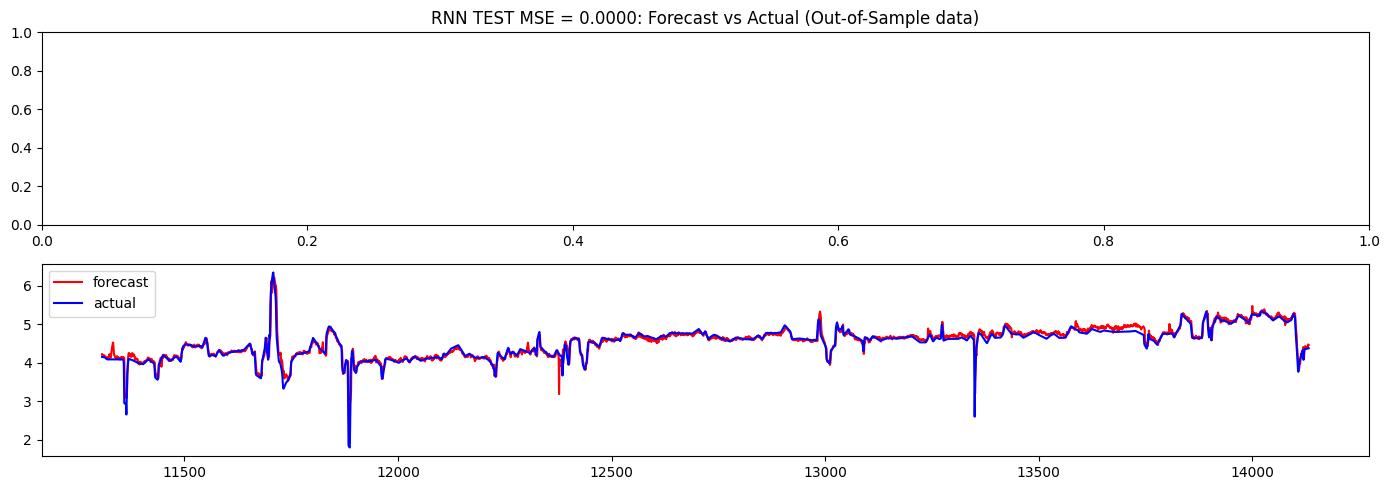

ricardo check this
torch.Size([2826, 19])
torch.Size([2826, 19])
(541,)
(541,)
(19,)
(19,)
(2826, 19)
(1, 19)
(1, 19)
(541,)
(541,)
(19,)
(19,)
(2826, 19)
(1, 19)
(1, 19)
(2826, 19)
(2826, 19)


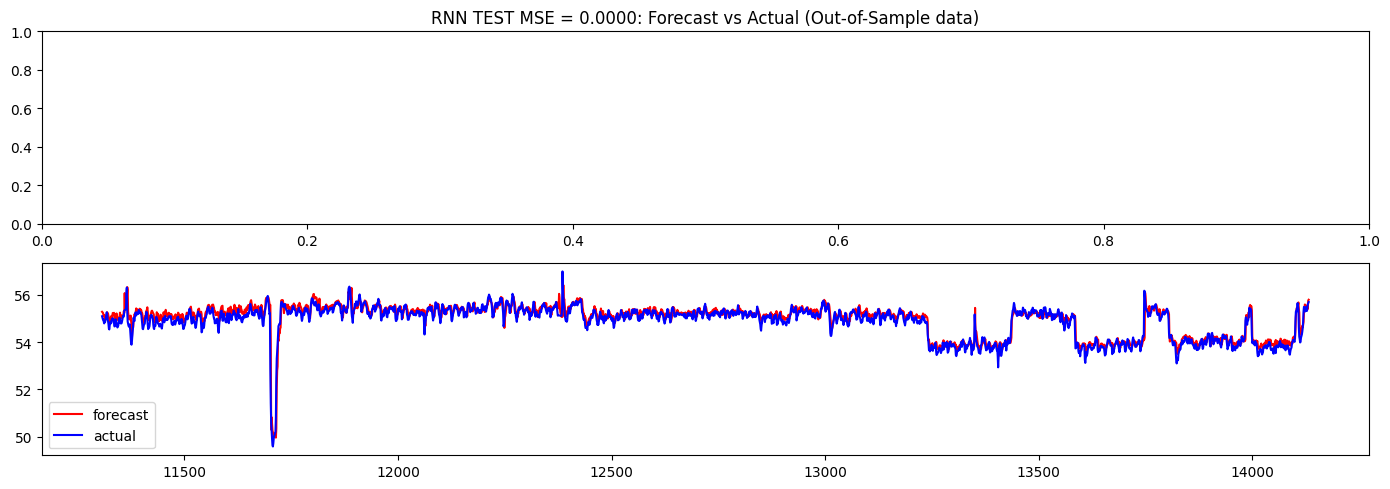

ricardo check this
torch.Size([2826, 19])
torch.Size([2826, 19])
(541,)
(541,)
(19,)
(19,)
(2826, 19)
(1, 19)
(1, 19)
(541,)
(541,)
(19,)
(19,)
(2826, 19)
(1, 19)
(1, 19)
(2826, 19)
(2826, 19)


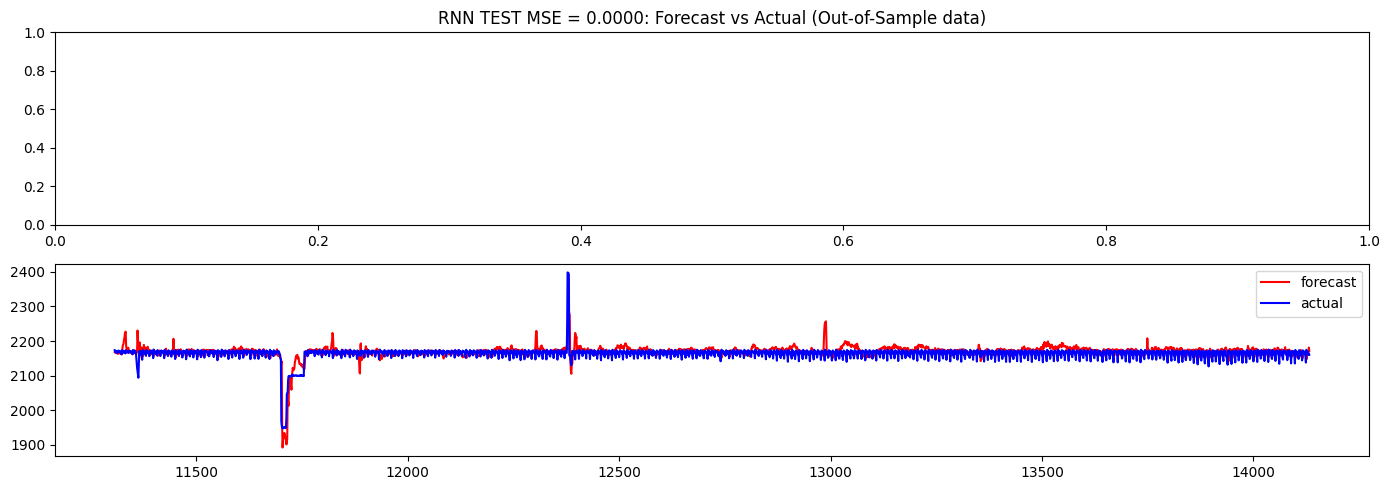

ricardo check this
torch.Size([2826, 19])
torch.Size([2826, 19])
(541,)
(541,)
(19,)
(19,)
(2826, 19)
(1, 19)
(1, 19)
(541,)
(541,)
(19,)
(19,)
(2826, 19)
(1, 19)
(1, 19)
(2826, 19)
(2826, 19)


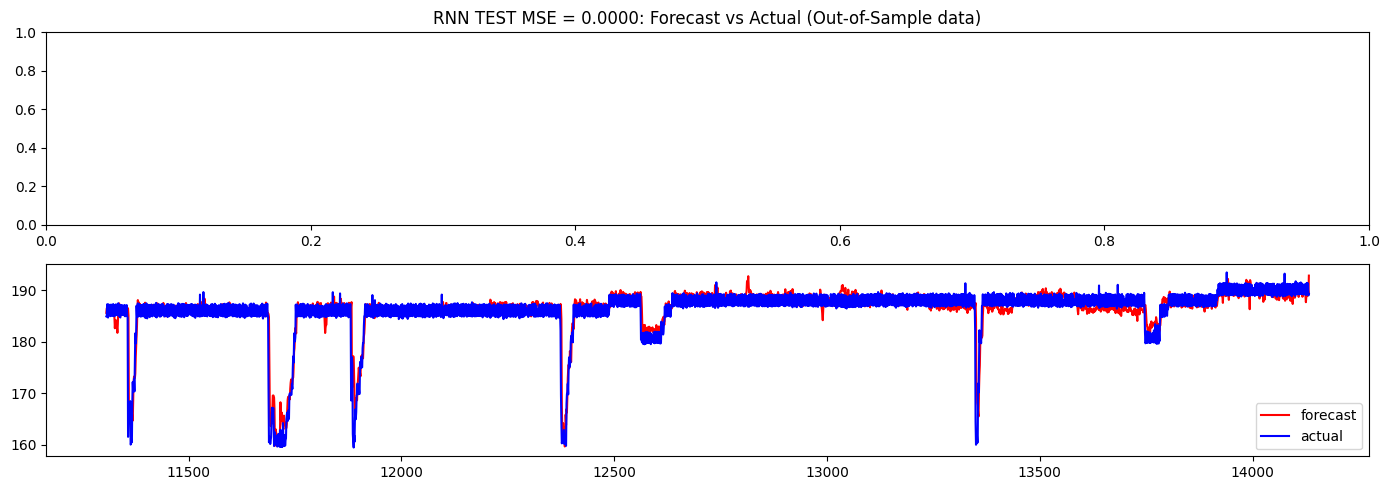

ricardo check this
torch.Size([2826, 19])
torch.Size([2826, 19])
(541,)
(541,)
(19,)
(19,)
(2826, 19)
(1, 19)
(1, 19)
(541,)
(541,)
(19,)
(19,)
(2826, 19)
(1, 19)
(1, 19)
(2826, 19)
(2826, 19)


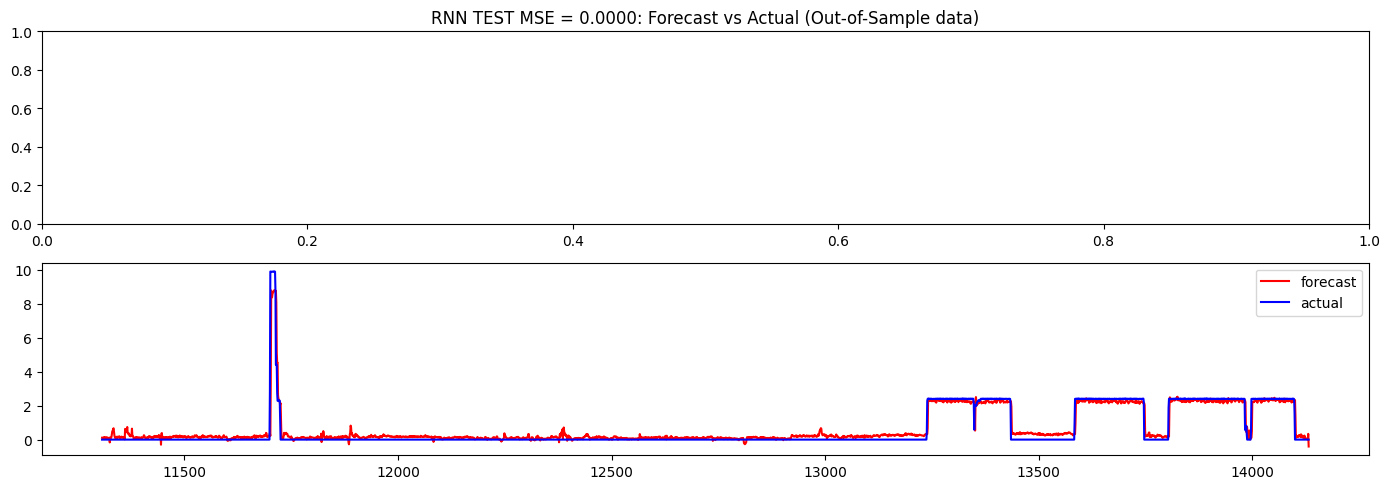

ricardo check this
torch.Size([2826, 19])
torch.Size([2826, 19])
(541,)
(541,)
(19,)
(19,)
(2826, 19)
(1, 19)
(1, 19)
(541,)
(541,)
(19,)
(19,)
(2826, 19)
(1, 19)
(1, 19)
(2826, 19)
(2826, 19)


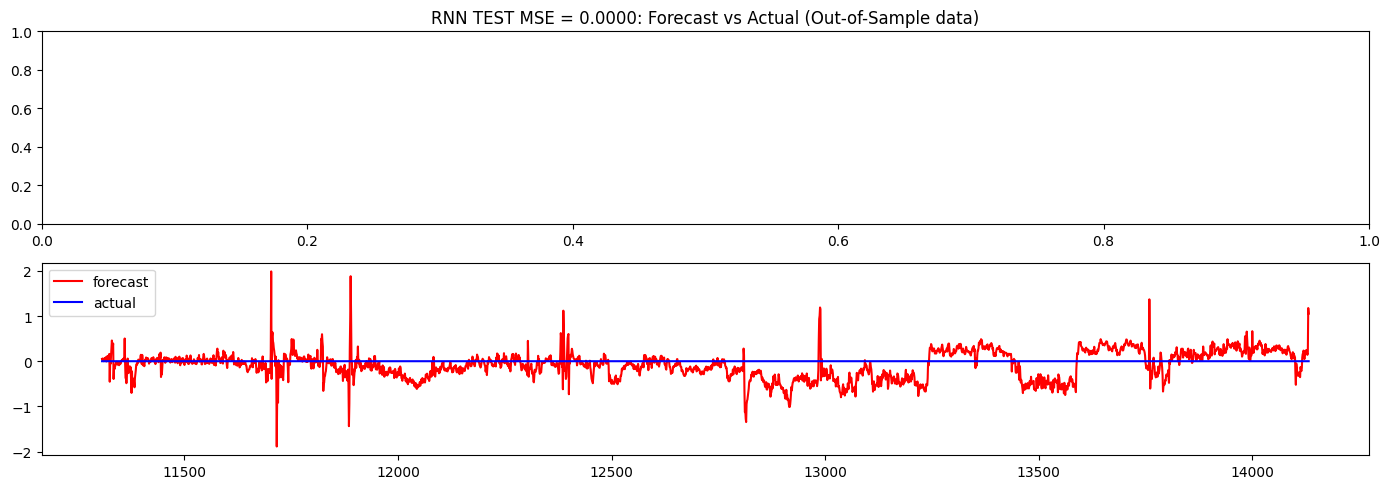

ricardo check this
torch.Size([2826, 19])
torch.Size([2826, 19])
(541,)
(541,)
(19,)
(19,)
(2826, 19)
(1, 19)
(1, 19)
(541,)
(541,)
(19,)
(19,)
(2826, 19)
(1, 19)
(1, 19)
(2826, 19)
(2826, 19)


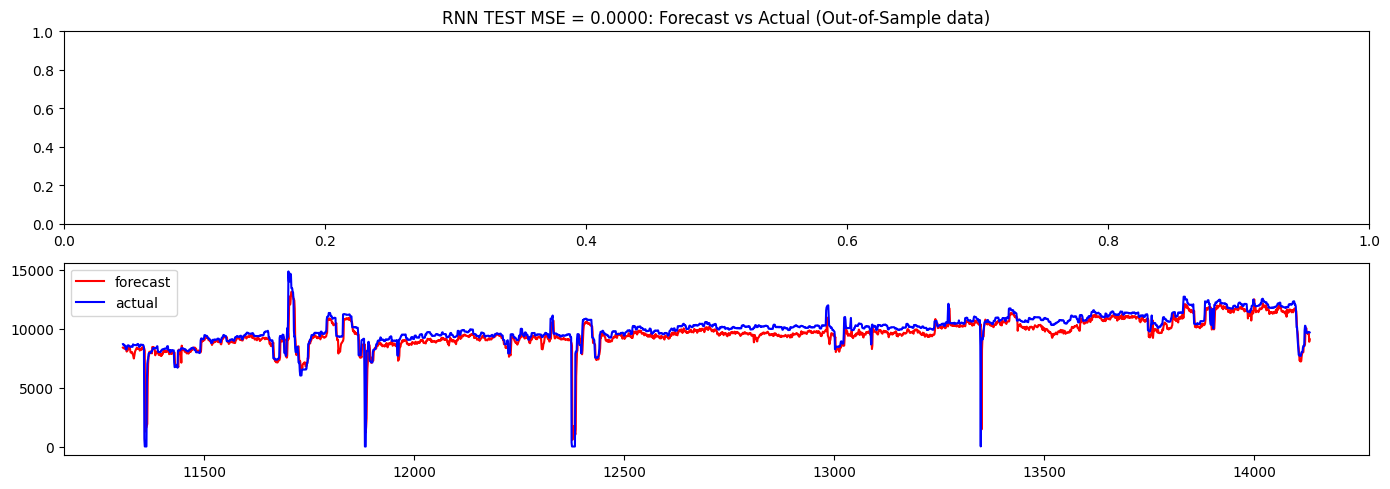

ricardo check this
torch.Size([2826, 19])
torch.Size([2826, 19])
(541,)
(541,)
(19,)
(19,)
(2826, 19)
(1, 19)
(1, 19)
(541,)
(541,)
(19,)
(19,)
(2826, 19)
(1, 19)
(1, 19)
(2826, 19)
(2826, 19)


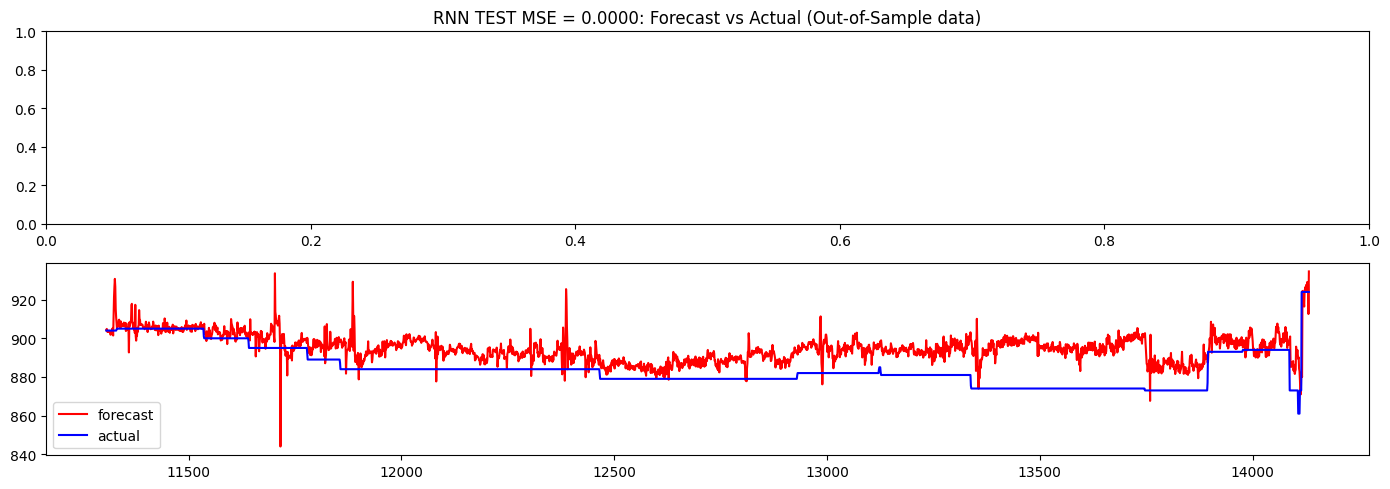

ricardo check this
torch.Size([2826, 19])
torch.Size([2826, 19])
(541,)
(541,)
(19,)
(19,)
(2826, 19)
(1, 19)
(1, 19)
(541,)
(541,)
(19,)
(19,)
(2826, 19)
(1, 19)
(1, 19)
(2826, 19)
(2826, 19)


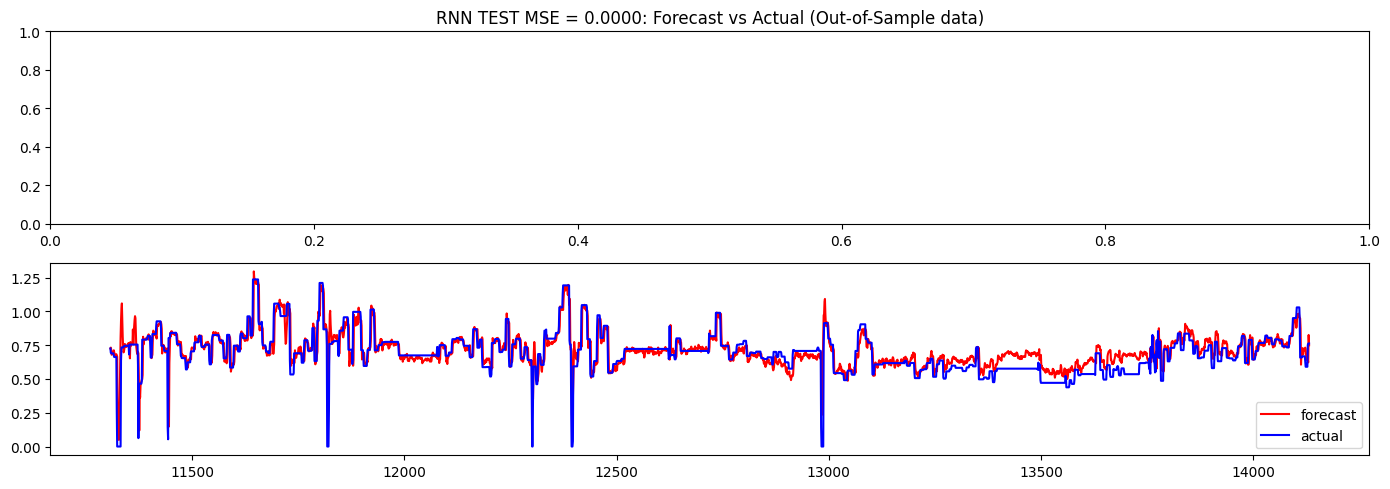

ricardo check this
torch.Size([2826, 19])
torch.Size([2826, 19])
(541,)
(541,)
(19,)
(19,)
(2826, 19)
(1, 19)
(1, 19)
(541,)
(541,)
(19,)
(19,)
(2826, 19)
(1, 19)
(1, 19)
(2826, 19)
(2826, 19)


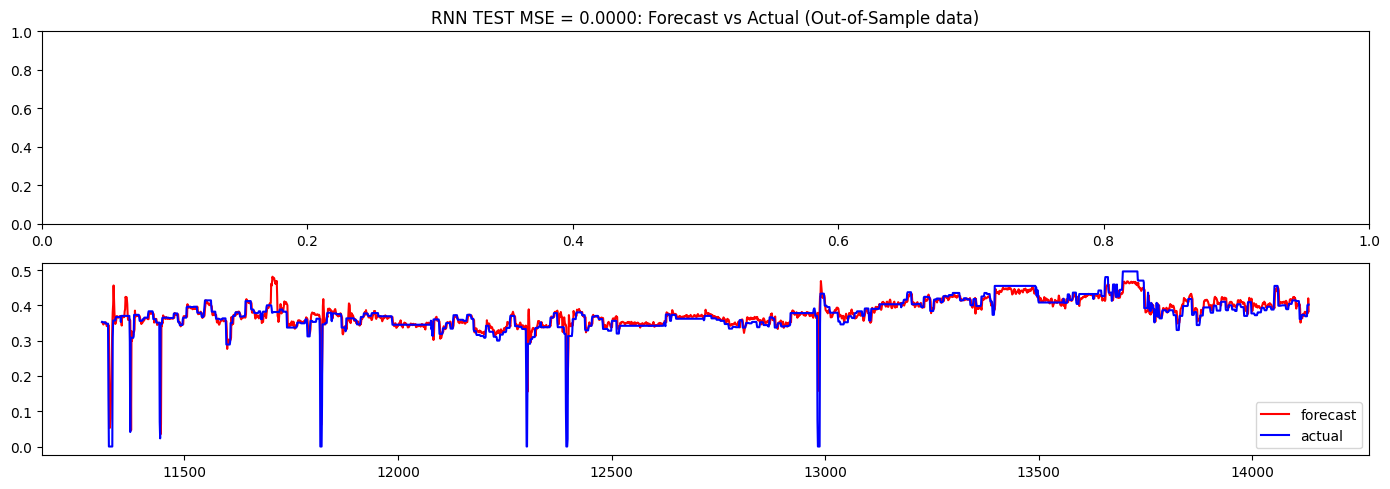

ricardo check this
torch.Size([2826, 19])
torch.Size([2826, 19])
(541,)
(541,)
(19,)
(19,)
(2826, 19)
(1, 19)
(1, 19)
(541,)
(541,)
(19,)
(19,)
(2826, 19)
(1, 19)
(1, 19)
(2826, 19)
(2826, 19)


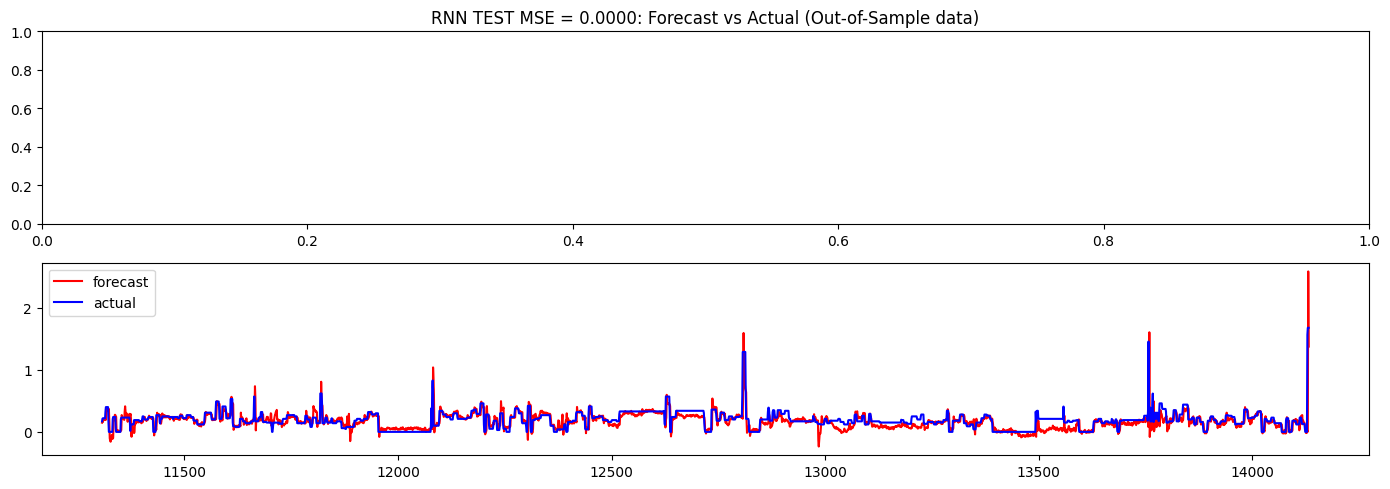

In [133]:

for i in range(19):

    x_index = i

    l1, l2 = View_all_predicted_Xs(x_index, model, model_type='RNN', **params_si )            
